Name: Belton Manhica

Note: I included all the steps I took during this assignment, so you can see my thought process.

# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [2]:
# mount file from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/Great Learning/Customer_Personality_Segmentation.csv", sep="\t")

## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [4]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#data summary
data.head(10).T

0           1           2           3  \
ID                         5524        2174        4141        6182   
Year_Birth                 1957        1954        1965        1984   
Education            Graduation  Graduation  Graduation  Graduation   
Marital_Status           Single      Single    Together    Together   
Income                  58138.0     46344.0     71613.0     26646.0   
Kidhome                       0           1           0           1   
Teenhome                      0           1           0           0   
Dt_Customer          04-09-2012  08-03-2014  21-08-2013  10-02-2014   
Recency                      58          38          26          26   
MntWines                    635          11         426          11   
MntFruits                    88           1          49           4   
MntMeatProducts             546           6         127          20   
MntFishProducts             172           2         111          10   
MntSweetProducts             88           1          21           3   
MntGoldProds                 88           6          42           5   
NumDealsPurchases             3           2           1           2   
NumWebPurchases               8           1           8           2   
NumCatalogPurchases          10           1           2           0   
NumStorePurchases             4           2          10           4   
NumWebVisitsMonth             7           5           4           6   
AcceptedCmp3                  0           0           0           0   
AcceptedCmp4                  0           0           0           0   
AcceptedCmp5                  0           0           0           0   
AcceptedCmp1                  0           0           0           0   
AcceptedCmp2                  0           0           0           0   
Complain                      0           0           0           0   
Z_CostContact                 3           3           3           3   
Z_Revenue                    11          11          11          11   
Response                      1           0           0           0   

                              4           5           6           7  \
ID                         5324        7446         965        6177   
Year_Birth                 1981        1967        1971        1985   
Education                   PhD      Master  Graduation         PhD   
Marital_Status          Married    Together    Divorced     Married   
Income                  58293.0     62513.0     55635.0     33454.0   
Kidhome                       1           0           0           1   
Teenhome                      0           1           1           0   
Dt_Customer          19-01-2014  09-09-2013  13-11-2012  08-05-2013   
Recency                      94          16          34          32   
MntWines                    173         520         235          76   
MntFruits                    43          42          65          10   
MntMeatProducts             118          98         164          56   
MntFishProducts              46           0          50           3   
MntSweetProducts             27          42          49           1   
MntGoldProds                 15          14          27          23   
NumDealsPurchases             5           2           4           2   
NumWebPurchases               5           6           7           4   
NumCatalogPurchases           3           4           3           0   
NumStorePurchases             6          10           7           4   
NumWebVisitsMonth             5           6           6           8   
AcceptedCmp3                  0           0           0           0   
AcceptedCmp4                  0           0           0           0   
AcceptedCmp5                  0           0           0           0   
AcceptedCmp1                  0           0           0           0   
AcceptedCmp2                  0           0           0           0   
Complain                      0           0          

##### **Observations:**
we have a total of 2240 rows and 29 columns, from which three contain object values and 26 numerical values.
We might have to transform those object datapoint into numeric values.


#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [4]:
#make a copy of the original dataset before making any changes
data_raw = data.copy()

In [5]:
#convert Dt_customer into Date and time format
data_raw['Dt_Customer'] = pd.to_datetime(data_raw['Dt_Customer'], dayfirst= True)


In [6]:
'''extract the year and create a column called year_customer
for the year the customer joined the company '''

data_raw['Year_Customer'] = data_raw['Dt_Customer'].dt.year
data_raw['Year_Customer']

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Year_Customer, Length: 2240, dtype: int32

In [7]:
#create a column for lifetime of the customer's relationship with the company

data_raw['Cust_lifetime'] = 2025- data_raw['Year_Customer']
data_raw['Cust_lifetime']

0       13
1       11
2       12
3       11
4       11
        ..
2235    12
2236    11
2237    11
2238    11
2239    13
Name: Cust_lifetime, Length: 2240, dtype: int32

In [8]:
#change the format of Dt_customer to day,month, year

data_raw['Dt_Customer'] = data_raw['Dt_Customer'].dt.strftime('%d/%m/%Y')


In [9]:
#Add a column for the age of the customers base on year_birth

data_raw ['Age'] = 2025- data_raw['Year_Birth']
data_raw ['Age']

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2240, dtype: int64

In [10]:
#add a column for total amount spent on five categories of products

#select all columns for total amount spent
total_Mnt = [
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

#create the column
data_raw['Total_spent'] = 0

for col in total_Mnt:
  data_raw['Total_spent'] += data_raw[col]

data_raw['Total_spent']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_spent, Length: 2240, dtype: int64

In [11]:
#create a column for the total number of purchases

#select the necessary features
total_purch = [
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases']

 #create the column
data_raw['Tot_purchases'] = 0

for col in total_purch:
  data_raw['Tot_purchases'] += data_raw[col]

data_raw['Tot_purchases']

0       22
1        4
2       20
3        6
4       14
        ..
2235    16
2236    15
2237    18
2238    21
2239     8
Name: Tot_purchases, Length: 2240, dtype: int64

In [12]:
#create a column to see how many campaigns each customer responded to

#select the columns for campaign response
total_camp =['AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response']

data_raw['Total_response'] = 0

for col in total_camp:
  data_raw['Total_response'] +=data_raw[col]

data_raw['Total_response']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: Total_response, Length: 2240, dtype: int64

In [ ]:
# descriptive statistics
data_raw.describe().round(2).T

count      mean       std     min       25%      50%  \
ID                   2240.0   5592.16   3246.66     0.0   2828.25   5458.5   
Year_Birth           2240.0   1968.81     11.98  1893.0   1959.00   1970.0   
Income               2216.0  52247.25  25173.08  1730.0  35303.00  51381.5   
Kidhome              2240.0      0.44      0.54     0.0      0.00      0.0   
Teenhome             2240.0      0.51      0.54     0.0      0.00      0.0   
Recency              2240.0     49.11     28.96     0.0     24.00     49.0   
MntWines             2240.0    303.94    336.60     0.0     23.75    173.5   
MntFruits            2240.0     26.30     39.77     0.0      1.00      8.0   
MntMeatProducts      2240.0    166.95    225.72     0.0     16.00     67.0   
MntFishProducts      2240.0     37.53     54.63     0.0      3.00     12.0   
MntSweetProducts     2240.0     27.06     41.28     0.0      1.00      8.0   
MntGoldProds         2240.0     44.02     52.17     0.0      9.00     24.0   
NumDealsPurchases    2240.0      2.33      1.93     0.0      1.00      2.0   
NumWebPurchases      2240.0      4.08      2.78     0.0      2.00      4.0   
NumCatalogPurchases  2240.0      2.66      2.92     0.0      0.00      2.0   
NumStorePurchases    2240.0      5.79      3.25     0.0      3.00      5.0   
NumWebVisitsMonth    2240.0      5.32      2.43     0.0      3.00      6.0   
AcceptedCmp3         2240.0      0.07      0.26     0.0      0.00      0.0   
AcceptedCmp4         2240.0      0.07      0.26     0.0      0.00      0.0   
AcceptedCmp5         2240.0      0.07      0.26     0.0      0.00      0.0   
AcceptedCmp1         2240.0      0.06      0.25     0.0      0.00      0.0   
AcceptedCmp2         2240.0      0.01      0.11     0.0      0.00      0.0   
Complain             2240.0      0.01      0.10     0.0      0.00      0.0   
Z_CostContact        2240.0      3.00      0.00     3.0      3.00      3.0   
Z_Revenue            2240.0     11.00      0.00    11.0     11.00     11.0   
Response             2240.0      0.15      0.36     0.0      0.00      0.0   
Year_Customer        2240.0   2013.03      0.68  2012.0   2013.00   2013.0   
Cust_lifetime        2240.0     11.97      0.68    11.0     12.00     12.0   
Age                  2240.0     56.19     11.98    29.0     48.00     55.0   
Total_spent          2240.0    605.80    602.25     5.0     68.75    396.0   
Tot_purchases        2240.0     12.54      7.21     0.0      6.00     12.0   
Total_response       2240.0      0.45      0.89     0.0      0.00      0.0   

                          75%       max  
ID                    8427.75   11191.0  
Year_Birth            1977.00    1996.0  
Income               68522.00  666666.0  
Kidhome                  1.00       2.0  
Teenhome                 1.00       2.0  
Recency                 74.00      99.0  
MntWines               504.25    1493.0  
MntFruits               33.00     199.0  
MntMeatProducts        232.00    1725.0  
MntFishProducts         50.00     259.0  
MntSweetProducts        33.00     263.0  
MntGoldProds            56.00     362.0  
NumDealsPurchases        3.00      15.0  
NumWebPurchases          6.00      27.0  
NumCatalogPurchases      4.00      28.0  
NumStorePurchases        8.00      13.0  
NumWebVisitsMonth        7.00      20.0  
AcceptedCmp3             0.00       1.0  
AcceptedCmp4             0.00       1.0  
AcceptedCmp5             0.00       1.0  
AcceptedCmp1             0.00       1.0  
AcceptedCmp2             0.00       1.0  
Complain                 0.00       1.0  
Z_CostContact            3.00       3.0  
Z_Revenue               11.00      11.0  
Response                 0.00       1.0  
Year_Customer         2013.00    2014.0  
Cust_lifetime           12.00      13.0  
Age                     66.00     132.0  
Total_spent           1045.50    2525.0  
Tot_purchases           18.00      32.0  
Total_response           1.00       5.0

In [ ]:
#descriptive statistics for categorical values
data_raw.describe(include='object').T

count unique         top  freq
Education       2240      5  Graduation  1127
Marital_Status  2240      8     Married   864

In [ ]:
#check all education levels
data_raw['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
#check how many customers are married with children
len(data_raw[(data_raw['Marital_Status']== 'Married') & (data_raw['Kidhome'] >0 )])

373

In [ ]:
#check the number of customers who have children
len(data_raw[data_raw['Kidhome'] == 0])

1293

##### **Observations:**
* The average household income is 52247.25 dollars per year;
* Most of our customers are maried (864 out of 2240), and 373 of them have children.
* A total of 1293 customers have children
* Our customers do not have more than two children in their household
* Most of our customers (1127 in total) are graduated (graduation) .
* A total of 12 customers enrolled with the company on 31-08-2012
* the median age of our customers is 48.0 year old, and the average age is 56 years old.
* Customers spend 605.80 dollars on average on five categories of products
*  25% of our customers spend 1045.5 dollars or more and made 18 or more purchases
* Customers joined the company in 2013 on average, and the average lifetime of customer's relationship with our company id 11.97 years





In [ ]:
# Check missing values
missing = (
    data_raw.isnull().sum() #count of null vlaues
    .sort_values(ascending=False)  #sort them in descending order

)

missing

Income                 24
ID                      0
Education               0
Year_Birth              0
Marital_Status          0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Year_Customer           0
Age                     0
Total_spent             0
Tot_purchases           0
Total_response          0
Income_imp              0
Income_KNN              0
dtype: int64

In [ ]:
#show the percentage of missing values in the Income column
missing[missing>0]/data_raw.shape[0]*100

Income    1.071429
dtype: float64

In [ ]:
#get the index of all empty  rows in Income
data_raw[data_raw['Income'].isnull() == True].index

Index([  10,   27,   43,   48,   58,   71,   90,   91,   92,  128,  133,  312,
        319, 1379, 1382, 1383, 1386, 2059, 2061, 2078, 2079, 2081, 2084, 2228],
      dtype='int64')

##### **Observations:**
Only the income column has empty values. The number of empty values in that variable is 24 which makes up ~ 1% of the data in the column. Next we are going to replace the mising values with the median because it is more robust to outlisers unlike the mean (since according to the descriptive statistics table the mean is greater than the median).

However, we will use the KKN as well, to compary which method did a better job in replacing empty values at the end.

In [13]:
#replace empty values with the mean
#import the simple inputer function from Sklearn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy ='median')
#create a new column for the income replaced with the median
data_raw['Income_imp'] = imputer.fit_transform(data_raw[['Income']])

In [14]:
#replace empty values using the KKN
from sklearn.impute import KNNImputer

#define the KKN function and choose the number of neighbors
imp_KNN = KNNImputer(n_neighbors = 5)
data_raw['Income_KNN'] = imp_KNN.fit_transform(data_raw[['Income']])


In [15]:
#check imputed values

#select rows for missing values
misssing_rows = [10,   27,   43,   48,   58,   71,   90,   91,   92,  128,  133,  312,
        319, 1379, 1382, 1383, 138]

#select columns for missing and imputed values
missing_columns = ['Income', 'Income_imp' ,'Income_KNN']

data_raw.loc[misssing_rows, missing_columns]

Income  Income_imp    Income_KNN
10        NaN     51381.5  52247.251354
27        NaN     51381.5  52247.251354
43        NaN     51381.5  52247.251354
48        NaN     51381.5  52247.251354
58        NaN     51381.5  52247.251354
71        NaN     51381.5  52247.251354
90        NaN     51381.5  52247.251354
91        NaN     51381.5  52247.251354
92        NaN     51381.5  52247.251354
128       NaN     51381.5  52247.251354
133       NaN     51381.5  52247.251354
312       NaN     51381.5  52247.251354
319       NaN     51381.5  52247.251354
1379      NaN     51381.5  52247.251354
1382      NaN     51381.5  52247.251354
1383      NaN     51381.5  52247.251354
138   35860.0     35860.0  35860.000000

#### **Question 4**: Are there any duplicates in the data?

In [ ]:
#Check for duplicates
data_raw.duplicated().sum()

np.int64(0)

##### **Observations:**
There are no duplicates in our data


In [ ]:
#check for garbage values
data_raw.select_dtypes(include='object').apply(lambda x: x=='..').sum()

Education         0
Marital_Status    0
Dt_Customer       0
dtype: int64

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)



Skew: 0.04


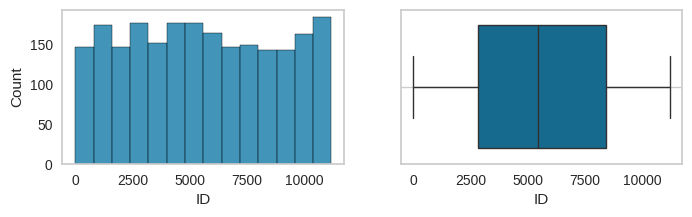



Skew: -0.35


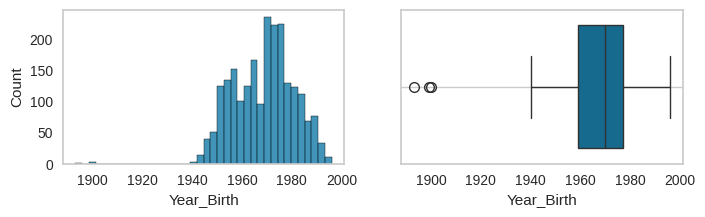



Skew: 6.76


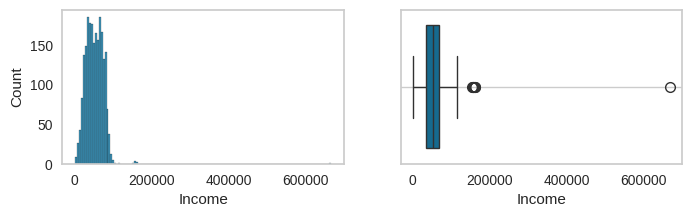



Skew: 0.64


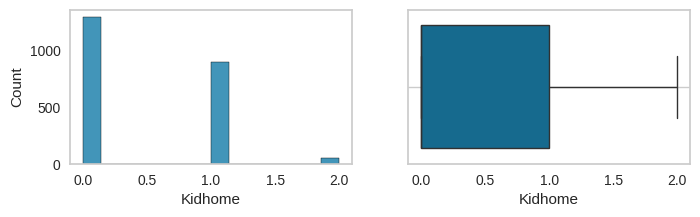



Skew: 0.41


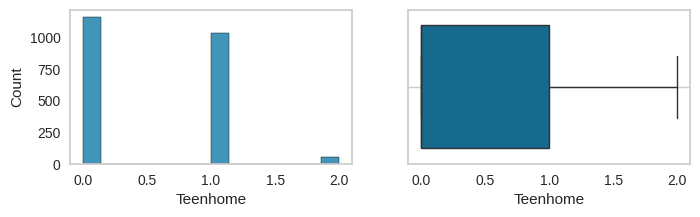



Skew: -0.0


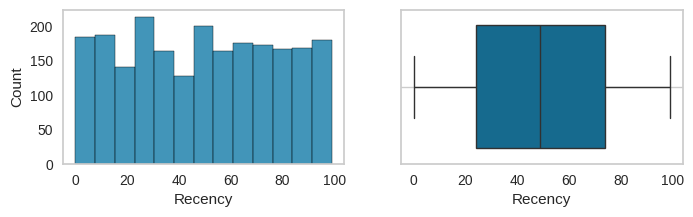



Skew: 1.18


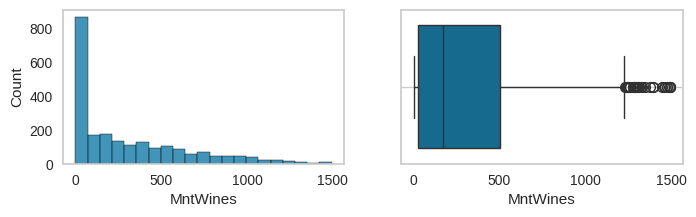



Skew: 2.1


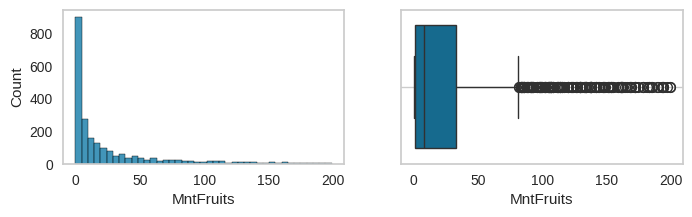



Skew: 2.08


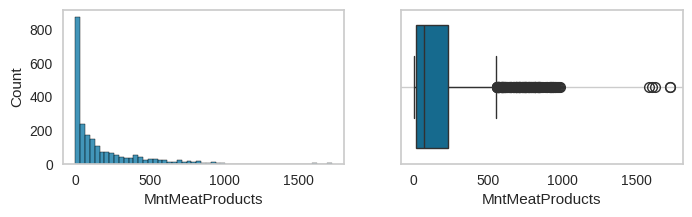



Skew: 1.92


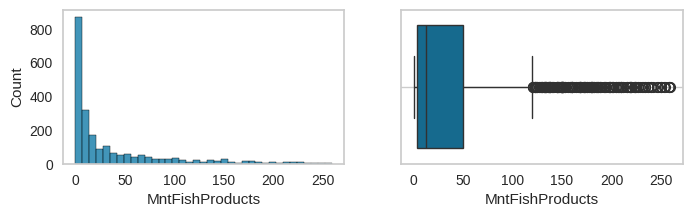



Skew: 2.14


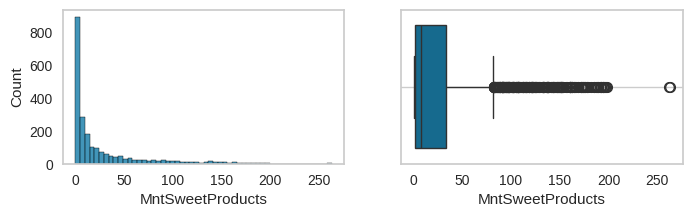



Skew: 1.89


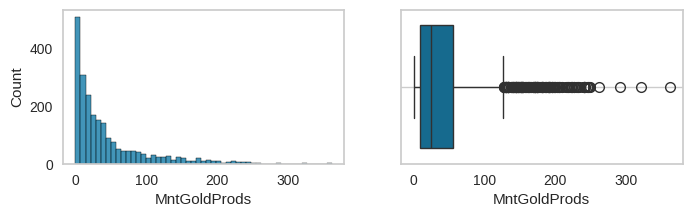



Skew: 2.42


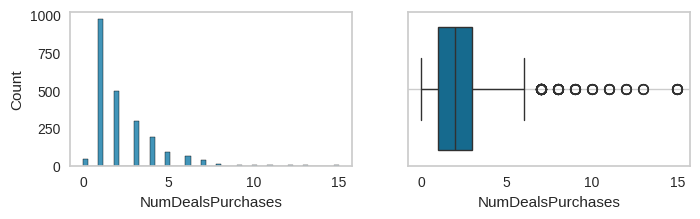



Skew: 1.38


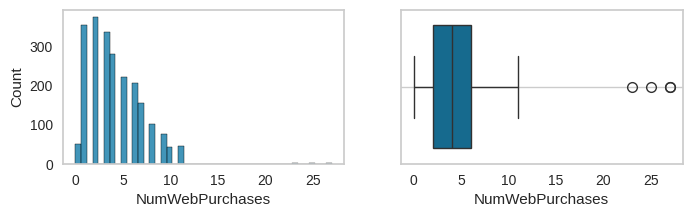



Skew: 1.88


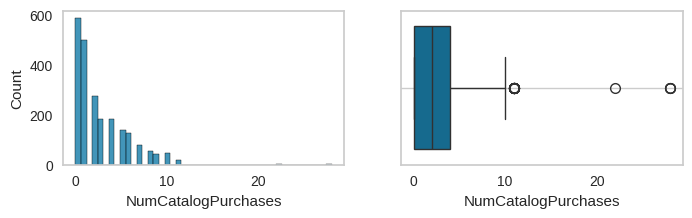



Skew: 0.7


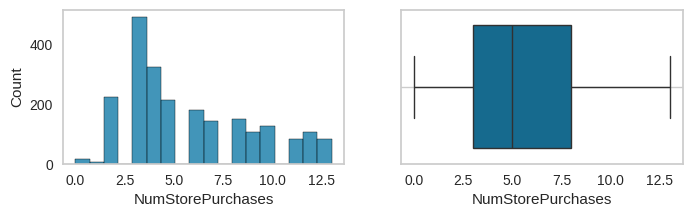



Skew: 0.21


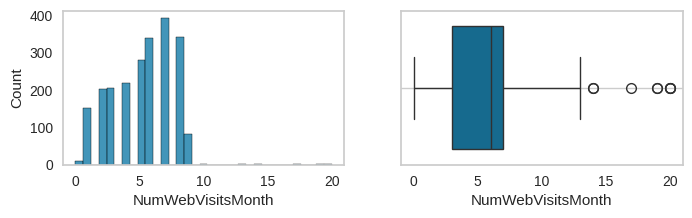



Skew: 3.29


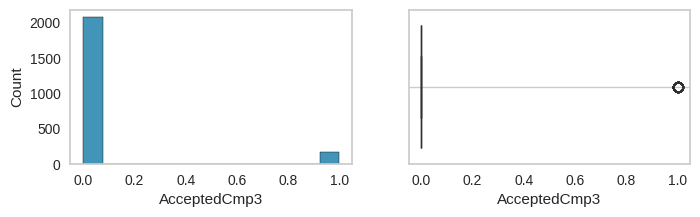



Skew: 3.24


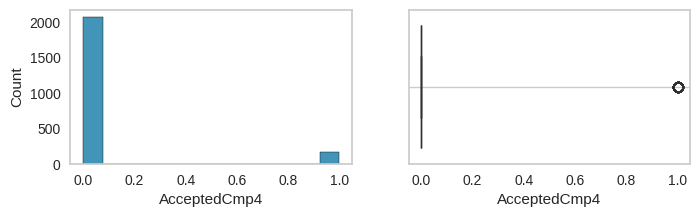



Skew: 3.29


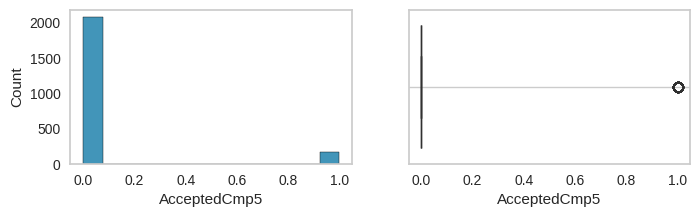



Skew: 3.56


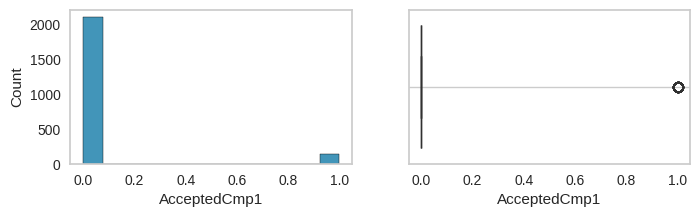



Skew: 8.47


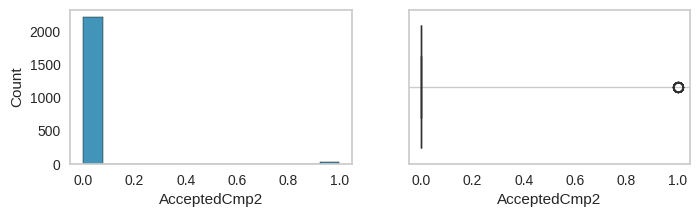



Skew: 10.19


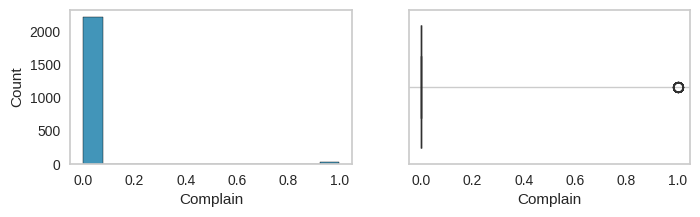



Skew: 0.0


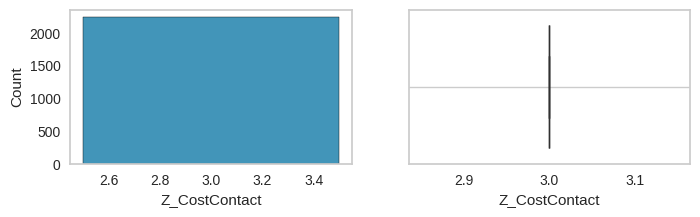



Skew: 0.0


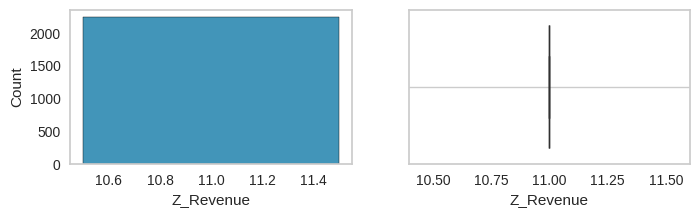



Skew: 1.97


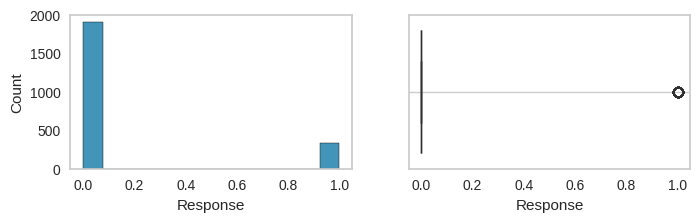



Skew: -0.04


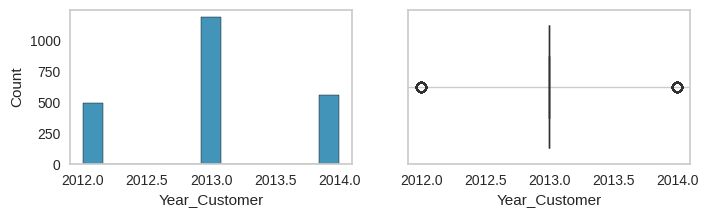



Skew: 0.04


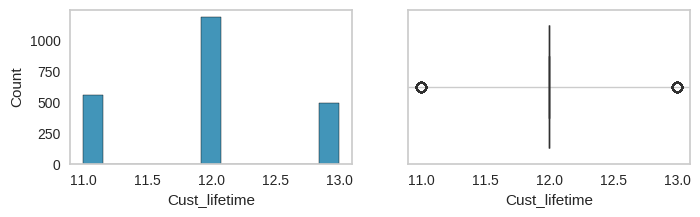



Skew: 0.35


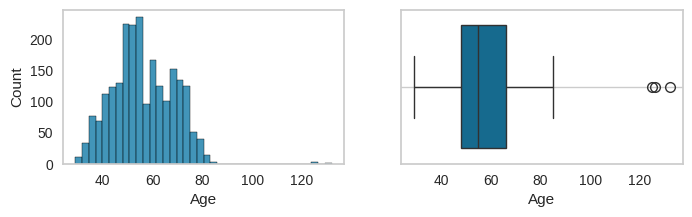



Skew: 0.86


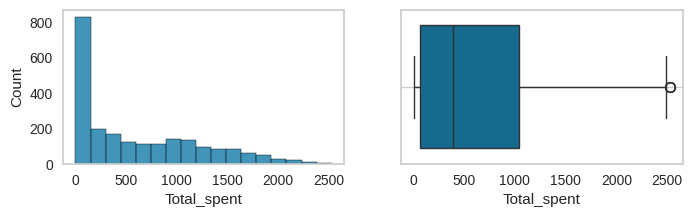



Skew: 0.3


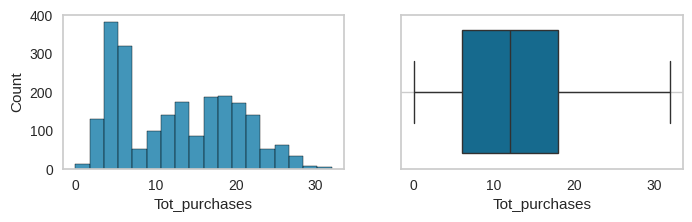



Skew: 2.44


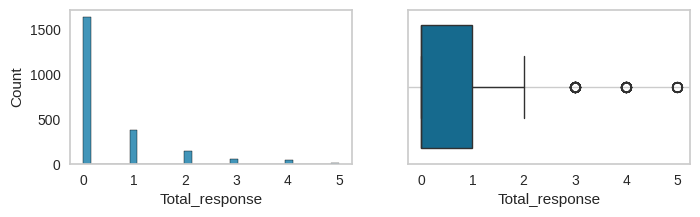



Skew: 6.8


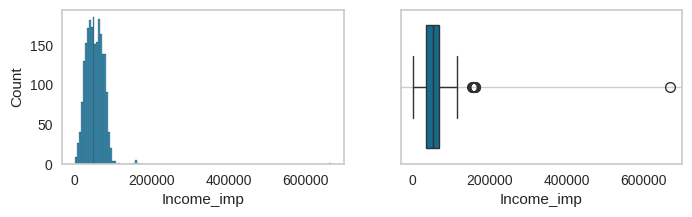



Skew: 6.8


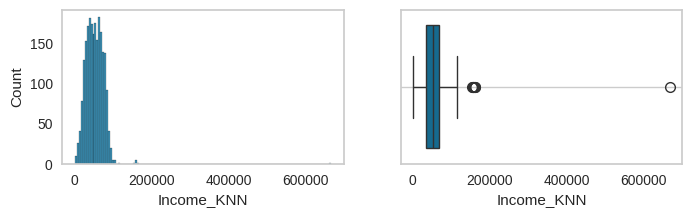

In [ ]:
# Histogram and boxplots

for i in data_raw.select_dtypes(include='number').columns:
  print('\n') #break line before each iteration
  print('Skew:', round(data_raw[i].skew(),2)) #display the skeweness of the data
  plt.figure(figsize =(8,2))
  plt.subplot(1,2,1)
  sns.histplot(data_raw, x =i)
  plt.grid(visible=None)
  plt.subplot(1,2,2)
  sns.boxplot(data_raw, x =i)
  plt.grid(visible=None)
  plt.show()

##### **Observations:**

**ID **

Customer ID has a uniform distribution and has no outliers. this variable as no significant meaning in our analysis besides identifying the customers. It might positively correlate with the time the customer joined the company but we cannot make those conclusions so far


**Year_birth:**
 This variable has an almost normally distributed left skewed distribution with a few outliers to the left. Making a visual judgement of these outliers, it appears that they are unrealistic values because they are below 1900. Since there is no one single person born before 1900 that is still alive, we conclude that these outliers are data entry errors. Hence we might have to consider removing them.

**Income: **
Income is strongly skewed to the right with a few extreme outliers. This means that in our data, there are a few customers who are extreme income earners. These outliers are less likely to have been caused by data entry errors, since it is realistic that a few people will earn extremely  more than others.


**Kidhome:**
This is a discrete numeric data type with only three values, 0 (no children) 1 and 2. The distribution its not normal, and it is skewed to the left, meaning that most of the customers either have no children or have one child. Very few have two children.  This is also true for Teenhome.

**Recency:**
This feature has an almost uniform distribution showing a consistence in customer’s purchase. There are no outliers.

**MntWines: **
For the amount spent on wine, the graphs show that most customers spent from little to no money on wine, and we have a lot of outliers that represent the few customers that spend a lot of money on wine. Hence, skewing the graph to the right. The same is true for the amount spent on fruits, fish,  and sweet products.

 **NumDealsPurchases:**
For the number of purchases made using a discount, we can clearly see that the distribution is not normal, and is right skewed. Most customers made from 0-5 purchases using a discount, and a very few (outliers) make more than 7 purchases with a discount.  A similar behavior is observed in the number of purchases made through the company’s website.

**NumStorePurchases:**
The number of purchases made directly in stores is closer to a normal distribution with a slight skew to the right, and there are no outliers. This is to be expected because going to the store is more likely to reflect people’s normal behavior (We hardly find people who go to the store too many times) . Here we can assume that those who make zero to no visitors to the store purchase more items online, otherwise, this distribution would be even closer to normal distribution.

**AcceptedCmp3:**
The response to the 3rd campaign variable shows a binomial distribution (1 for yes, 0 for no) with more customers who responded to the campaign than those who did not. Hence, the outlier and right-skewness. The same behavior is observed in all other campaigns.

**Z_CostContact and Z_revenue** are uniformly distributed with no outliers. Showing that the company has constantly been registering constant revenues and maintaining their costs constant.

Our next task is to try and normalize the data and treat the outliers.

**tot_purchases and total _spent:** There are so many customers who did not make more than 10 purchases and who spent less than 500 in our store.

Outlier treatment part 1
According to the boxplots, the following variables have outliers: year_Birth, Income, MntWines, MntFruits, MntMeantProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NymStorePurchases, NumWebVisitsMonth, All campaigns, complain,  Year_customer, Total_spent, Cust_lifetime.

However, out of all the variables only customer age seem to been caused by value entry error. The rest of the outliers are more realistic and reflect normal customer behavior.However, in order do avoid bias, reduced precision, and mask effect in our analysis, we are going to remove all ouliers and make the data as closer to a normal distribution as possible. Since the algorithm that we will be using, Kmeans, is sensitive to outliers.

To tackle these outliers, we are going to replace the them with the lower and upper whickers.

In [16]:
#copy the data before removing outliers
data_raw_ = data_raw.copy()

In [17]:
#Replace the outliers for  with the upper whicker

# to find the 25th percentile and 75th percentile for the numerical columns.
Q1 = data_raw_['Age'].quantile(0.25)
Q3 = data_raw_['Age'].quantile(0.75)

#Inter Quantile Range
IQR = Q3 - Q1

#Finding lower and upper bounds
lower_whisker = Q1 - 1.5*IQR
upper_whisker = Q3 + 1.5*IQR

#Assign all the values above the upper_whisker to the upper_whisker
data_raw_['Age'][data_raw_['Age'] > upper_whisker] = upper_whisker


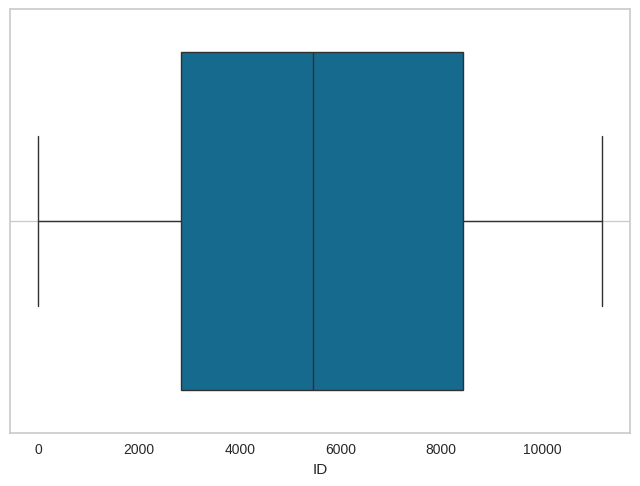

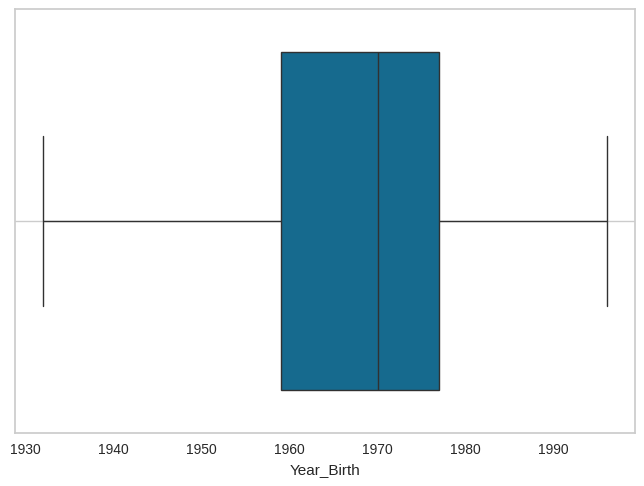

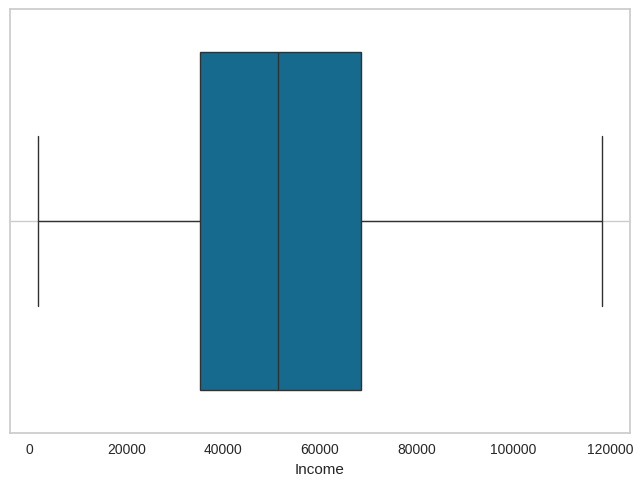

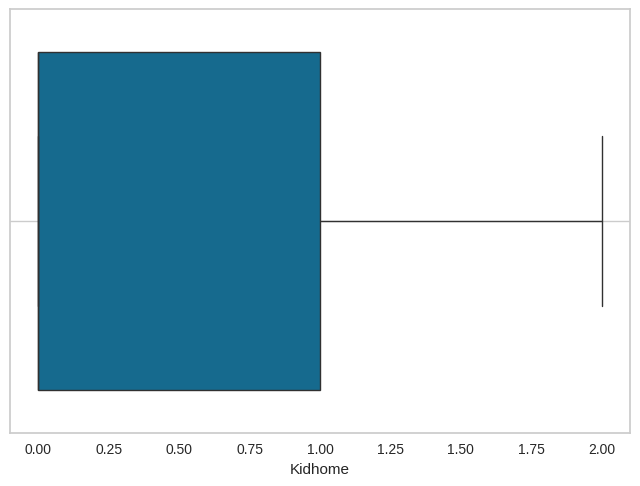

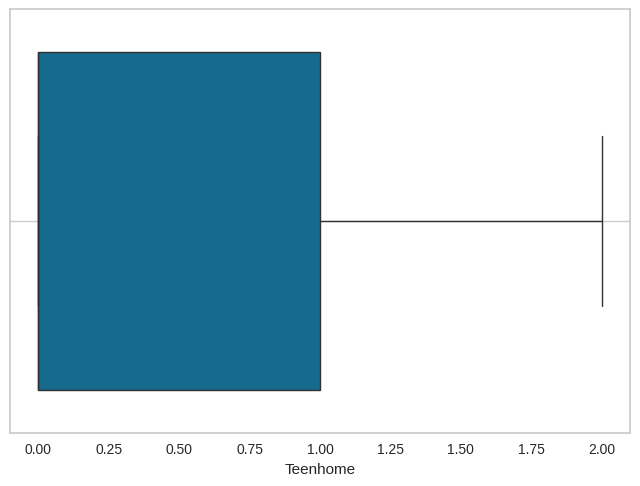

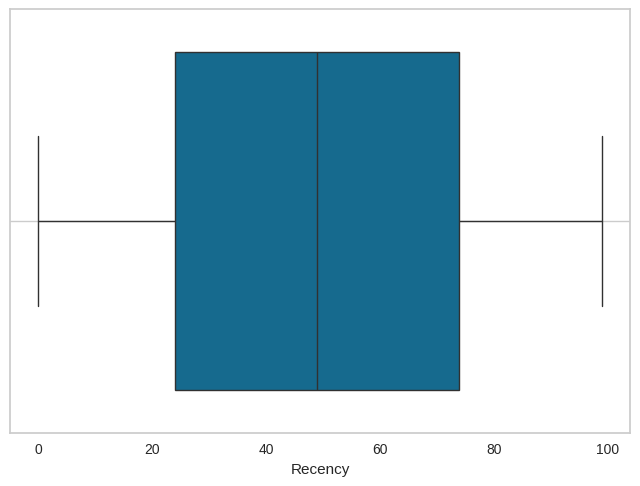

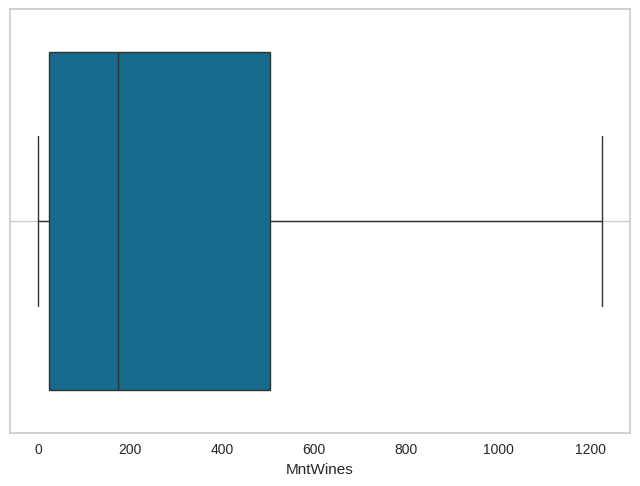

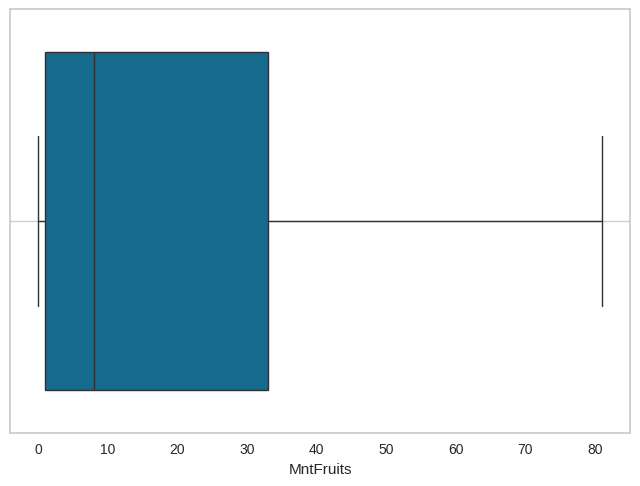

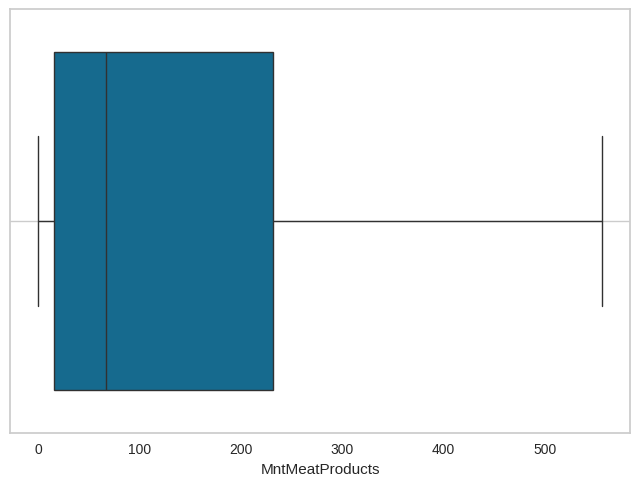

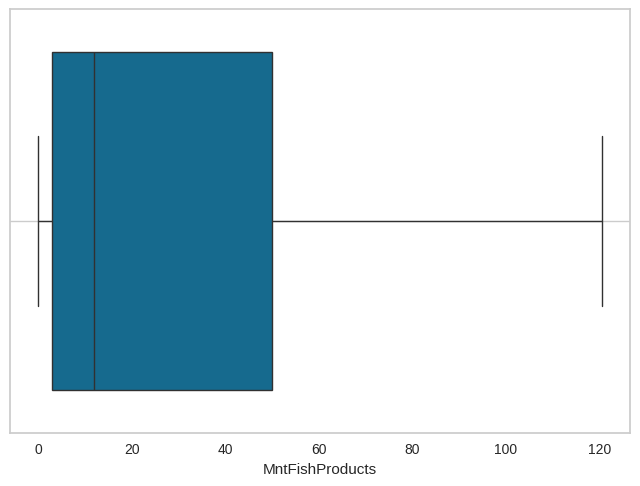

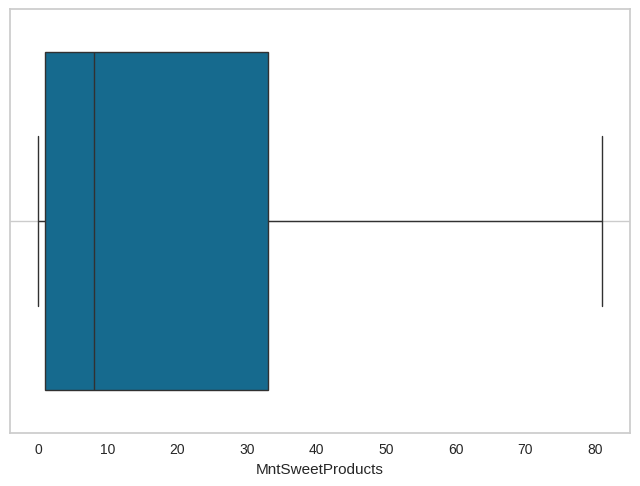

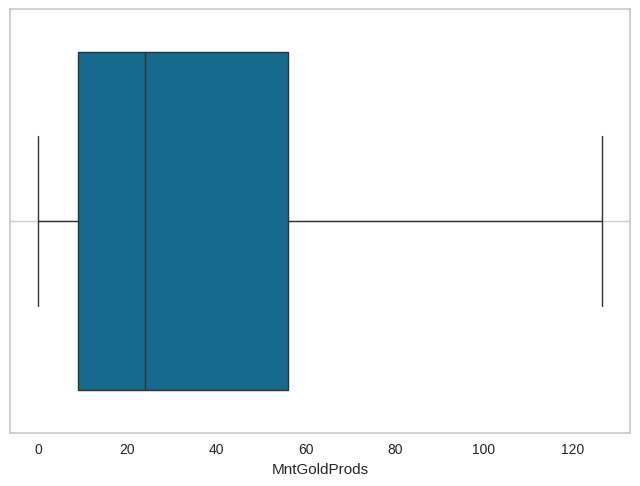

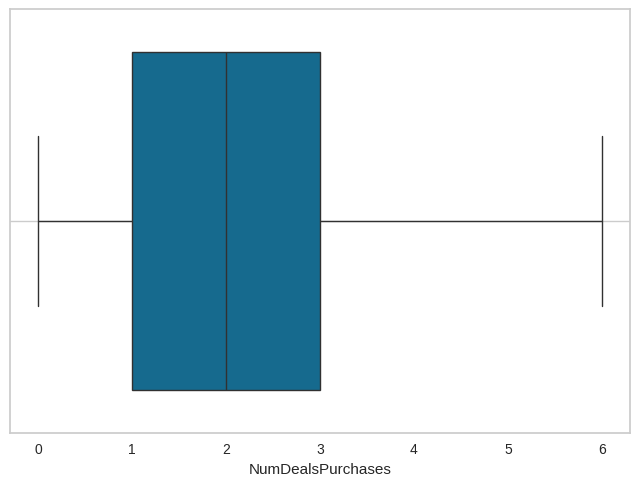

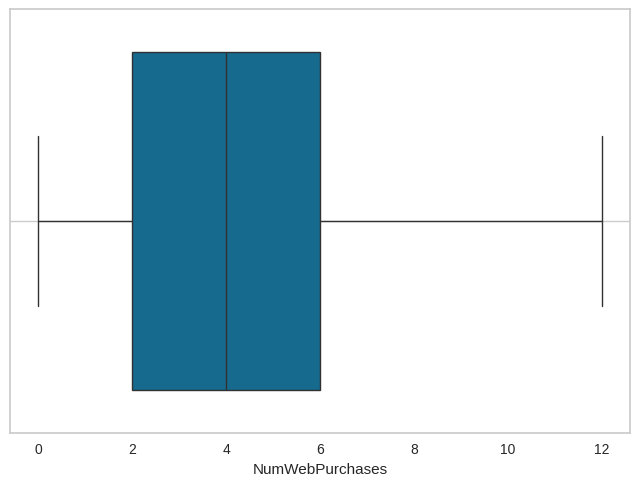

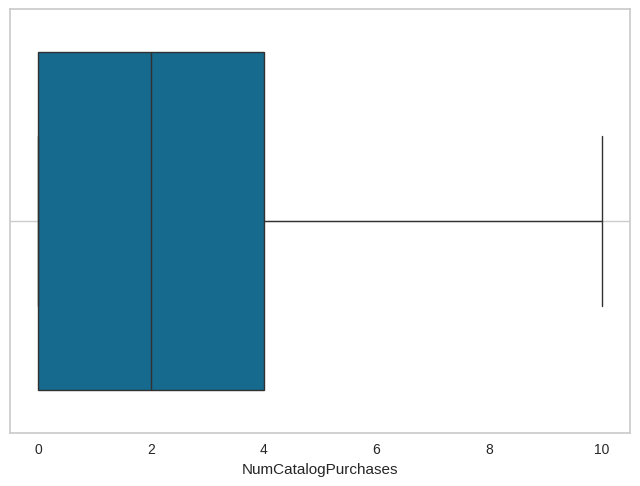

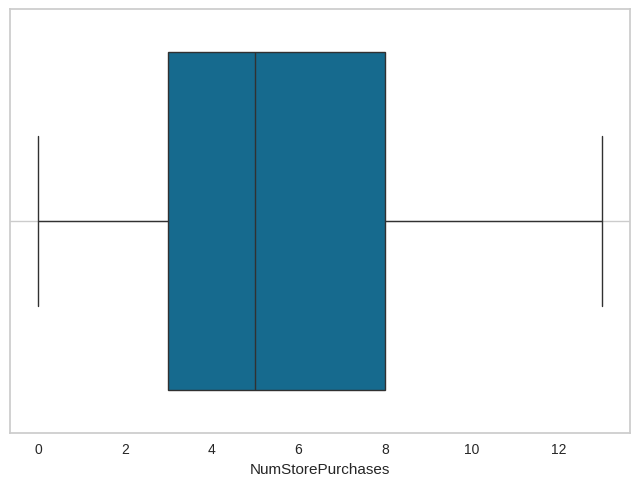

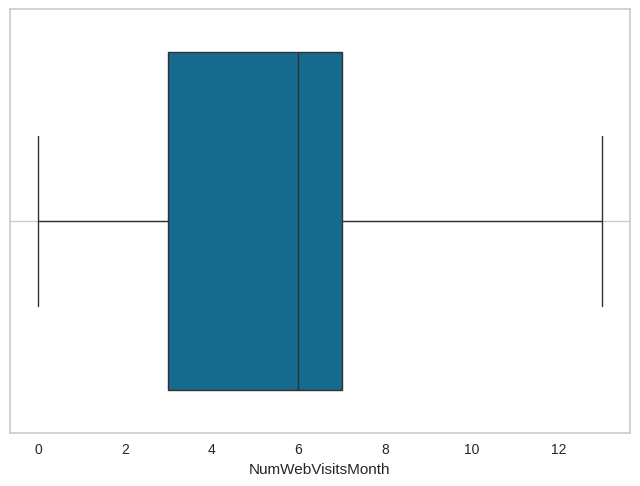

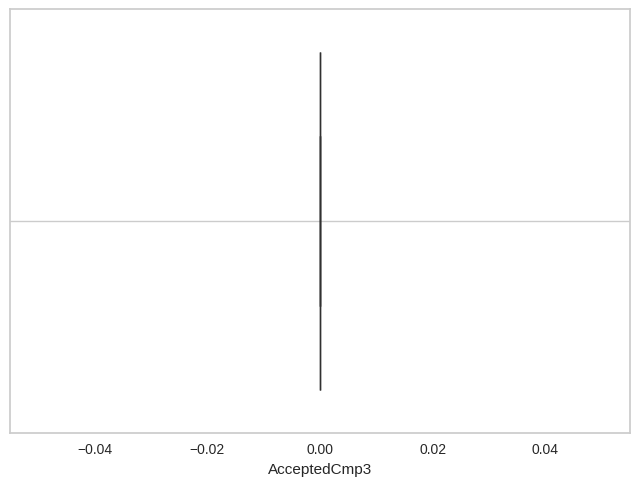

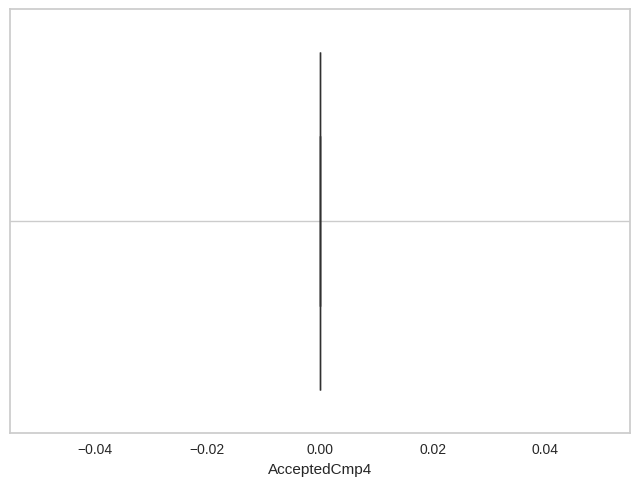

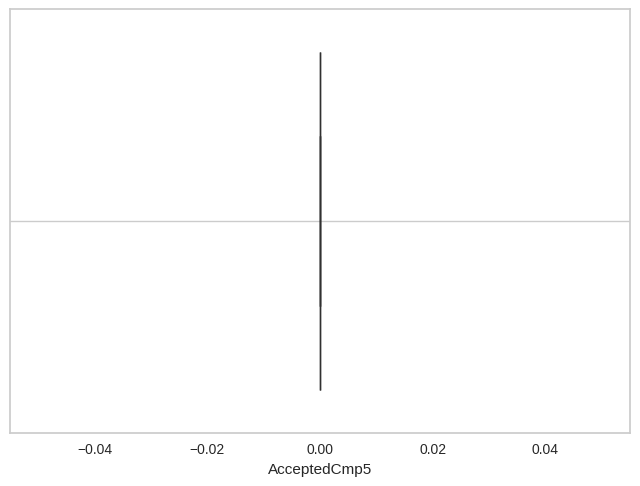

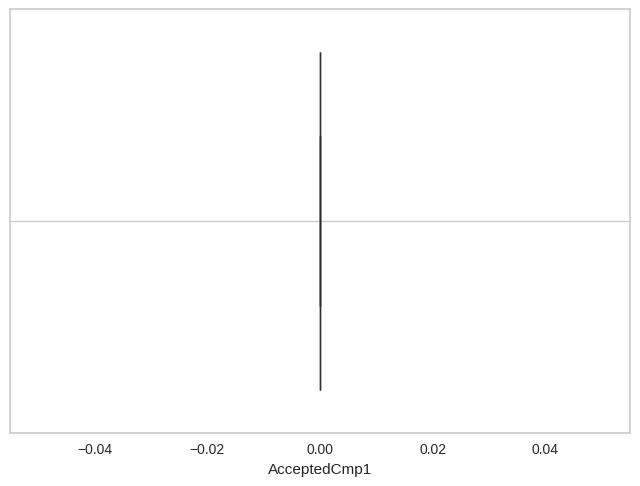

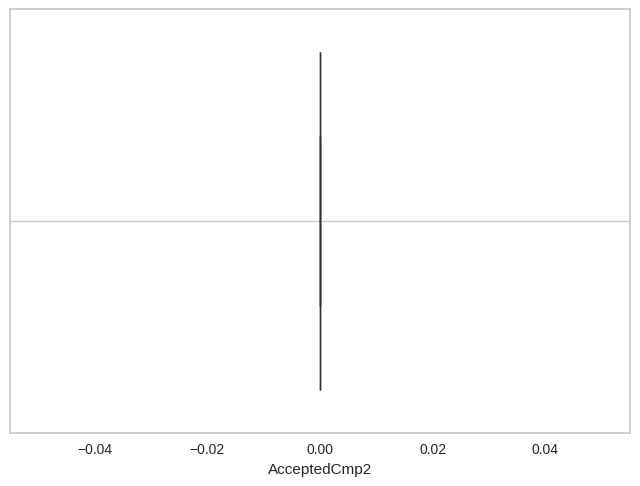

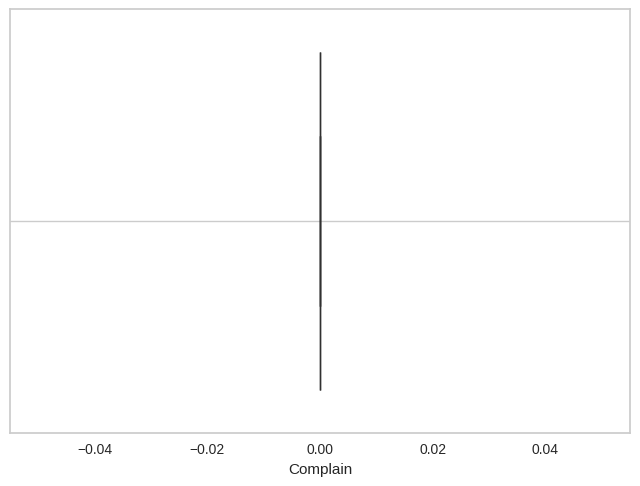

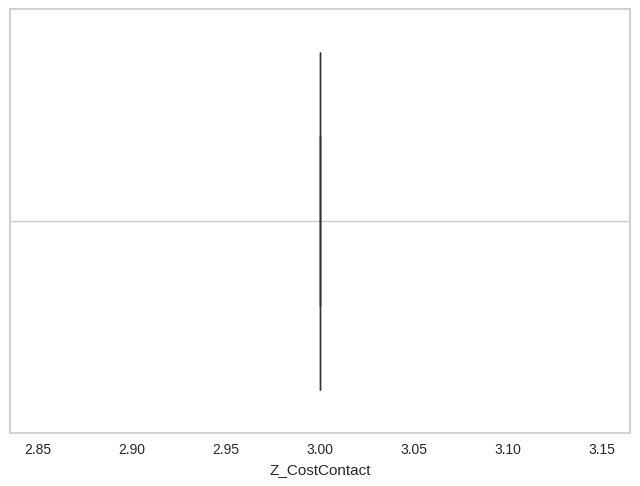

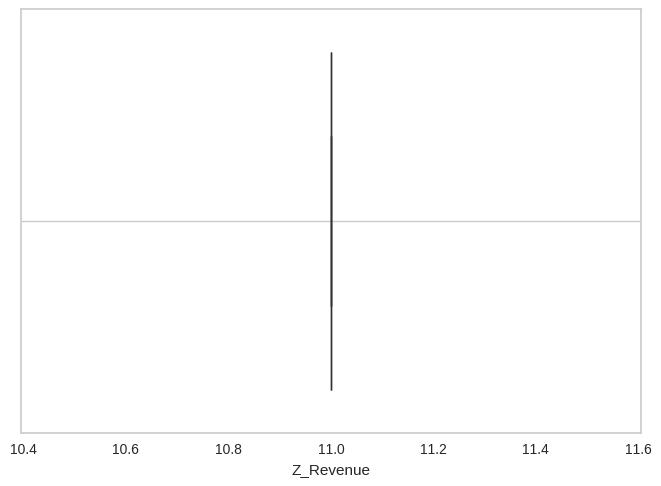

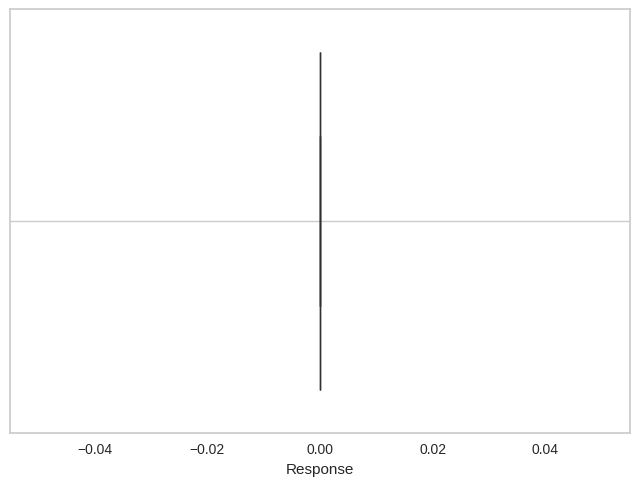

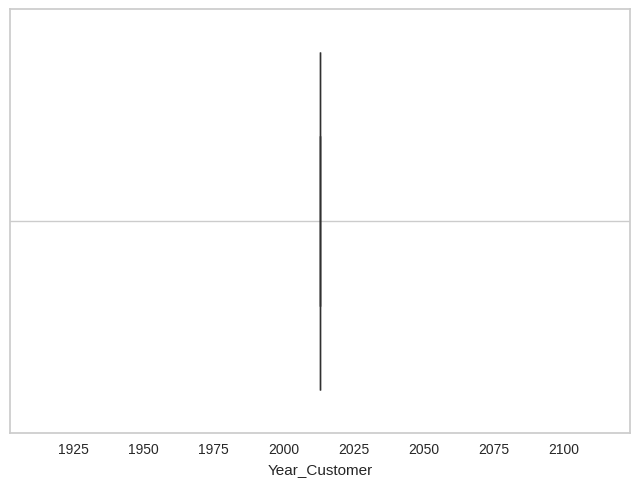

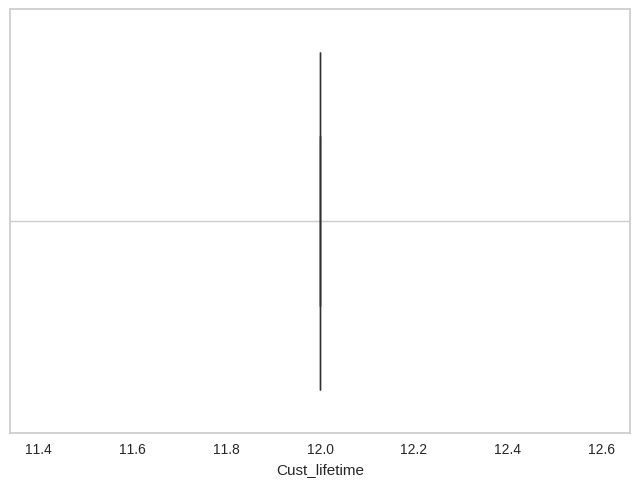

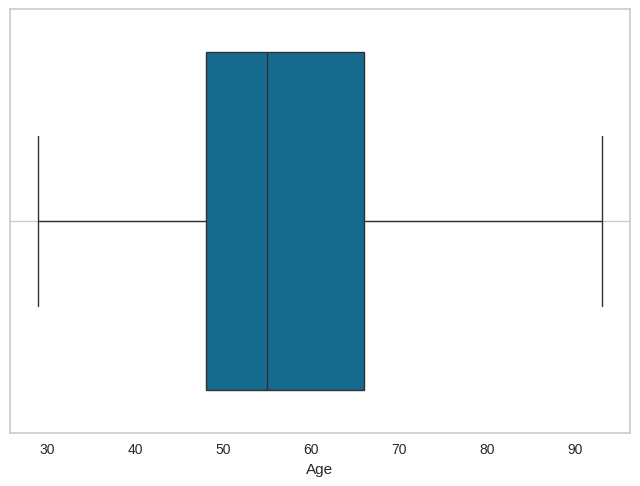

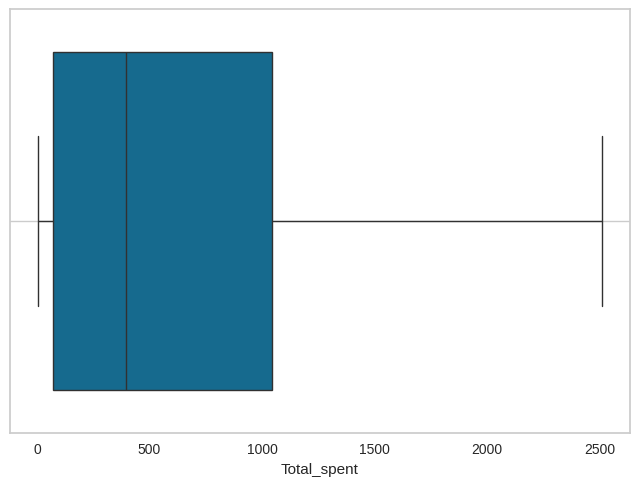

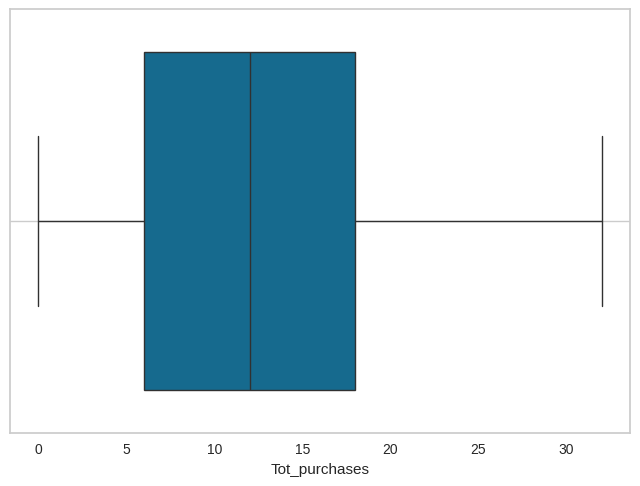

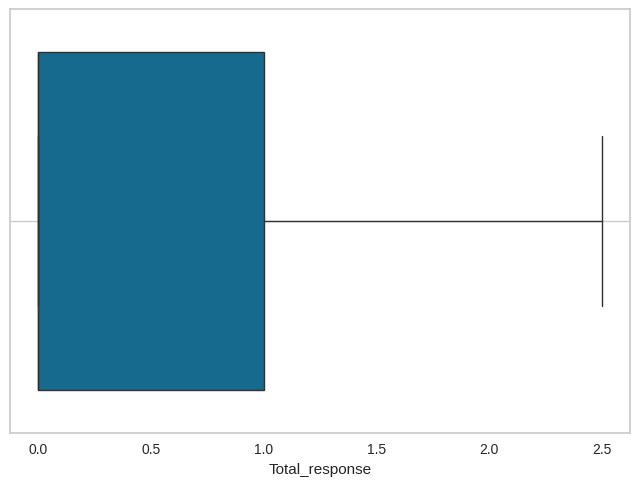

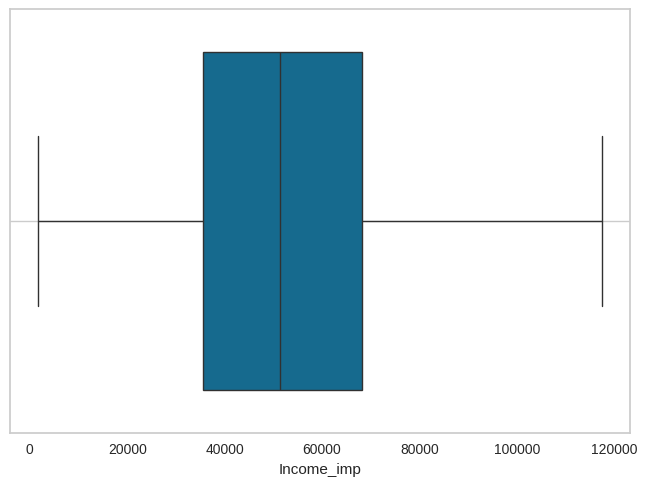

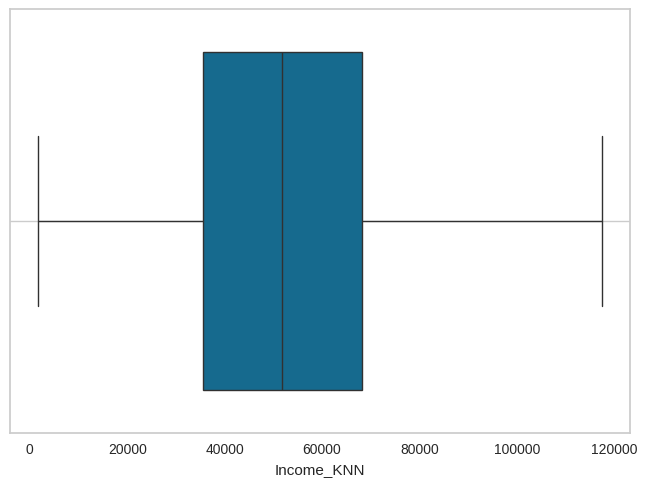

In [18]:
#remove outliers for all variables
#Replace the outliers for  with the upper whicker

# to find the 25th percentile and 75th percentile for the numerical columns.
for col in data_raw_.select_dtypes(include='number').columns.tolist():
    Q1 = data_raw[col].quantile(0.25)
    Q3 = data_raw[col].quantile(0.75)

#Inter Quantile Range
    IQR = Q3 - Q1

#Finding lower and upper bounds
    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = Q3 + 1.5*IQR

#Assign all the values above the upper_whisker to the upper_whisker
    data_raw_[col]= np.clip(data_raw_[col], lower_whisker, upper_whisker)

    #check the boxplot
    sns.boxplot(data_raw_, x= col)
    plt.grid(None)
    plt.show()

We have sucessfully removed all outliers from our data

Convert categorical data into numeric values

In [19]:
#select object data types
categorical_columns = list(set(data_raw.select_dtypes(include = 'object').columns.tolist()) - set(['Dt_Customer']))
categorical_columns

data_raw[categorical_columns]

Marital_Status   Education
0            Single  Graduation
1            Single  Graduation
2          Together  Graduation
3          Together  Graduation
4           Married         PhD
...             ...         ...
2235        Married  Graduation
2236       Together         PhD
2237       Divorced  Graduation
2238       Together      Master
2239        Married         PhD

[2240 rows x 2 columns]

To categorical data into numeric data, we are going to do the following:
* Replace education with values from 1 to 5. 1 for Basic, 2- Graduation (highschool), 3 - Master (Bachelors degree) , 4 - 2nd cycle (Master's degree), and 5 - PhD.
* Replace Single with 0, and Married with 1;

In [21]:
#convert education in to numeric data
data_raw_['Education'] = data_raw_['Education'].replace({
    'Basic':1,
    'Graduation': 2,
    'Master':3,
    '2n Cycle':4,
    'PhD': 5
})


In [22]:
#check the values for Marital status
data_raw_['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

For marital status, in case of single and Married, it would be easier to raplace single with 0 and married with 1. However, our data mas more values such as Yolo, and Absurd wich we do not know what they mean. Hence, replacing them with a range from 0 to 7 would give the data ordinal meaning that would confuse our algorithm. Therefore, we are going to use one_hot encoding instead.

In [24]:
'''Let us see income per Marital Status
to see if marital status holds any meaning
in terms of income before converting the data'''

data_raw_.groupby(['Marital_Status'])['Income'].mean().sort_values(ascending=False)

Marital_Status
Absurd      72365.500000
Widow       56481.552632
Divorced    52680.894397
Together    52075.307155
Married     51585.050758
Single      50995.350318
YOLO        48432.000000
Alone       43789.000000
Name: Income, dtype: float64

In [26]:
'''Marital status seems to be a component that affects income
in this case, however we are not
going to consider the posibility of ranking marital status based
on income'''

data_raw_.loc[data['Income']>170000]

ID  Year_Birth  Education Marital_Status    Income  Kidhome  Teenhome  \
2233  9432        1977          2       Together  118350.5        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2233  02/06/2013       23         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2233              8.0                 1          12.0                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2233                3                    1                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2233                  6             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
2233             0             0         0              3         11   

      Response  Year_Customer  Cust_lifetime  Age  Total_spent  Tot_purchases  \
2233         0           2013             12   48         62.0              7   

      Total_response  Income_imp  Income_KNN  
2233             0.0   117416.25   117416.25

In [29]:
from sklearn.preprocessing import OneHotEncoder
#convert Marital status in to numeric data

#Iniciate the encoder
encoder = OneHotEncoder(sparse_output= False)

#apply the encoder to the data
encoded = encoder.fit_transform(data_raw_[['Marital_Status']])

#convert the data in to a pandas dataframa
encoded = pd.DataFrame(encoded, columns = encoder.get_feature_names_out(['Marital_Status']))

#now merge the encoded data to the original data
encoded_data = pd.concat([data_raw_, encoded], axis =1)

In [30]:
#drop the original column and other insignificant columns
columns_to_drop = ['ID',
 'Year_Birth',
 'Marital_Status',
  'Year_Customer',
  'Dt_Customer',
 'Z_CostContact',
 'Z_Revenue']

encoded_data.drop(columns =columns_to_drop, inplace = True)

In [31]:
#compare the shape of the original data with the old one
encoded_data.shape, data.shape

((2240, 38), (2240, 29))

In [32]:
#check the data info after previous transformations
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education                2240 non-null   int64  
 1   Income                   2216 non-null   float64
 2   Kidhome                  2240 non-null   int64  
 3   Teenhome                 2240 non-null   int64  
 4   Recency                  2240 non-null   int64  
 5   MntWines                 2240 non-null   int64  
 6   MntFruits                2240 non-null   int64  
 7   MntMeatProducts          2240 non-null   int64  
 8   MntFishProducts          2240 non-null   float64
 9   MntSweetProducts         2240 non-null   int64  
 10  MntGoldProds             2240 non-null   float64
 11  NumDealsPurchases        2240 non-null   int64  
 12  NumWebPurchases          2240 non-null   int64  
 13  NumCatalogPurchases      2240 non-null   int64  
 14  NumStorePurchases       

There are no more object data types

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

In [33]:
#correlation analysis
corr = encoded_data.corr()
corr

Education    Income   Kidhome  Teenhome   Recency  \
Education                 1.000000  0.103349 -0.036784  0.084355 -0.021255   
Income                    0.103349  1.000000 -0.523049  0.036050  0.005389   
Kidhome                  -0.036784 -0.523049  1.000000 -0.036133  0.008827   
Teenhome                  0.084355  0.036050 -0.036133  1.000000  0.016198   
Recency                  -0.021255  0.005389  0.008827  0.016198  1.000000   
MntWines                  0.137697  0.711440 -0.500847  0.005968  0.016359   
MntFruits                -0.066874  0.576924 -0.418699 -0.174076  0.012045   
MntMeatProducts          -0.000964  0.739211 -0.483427 -0.253596  0.020506   
MntFishProducts          -0.075227  0.582684 -0.429810 -0.213736  0.001683   
MntSweetProducts         -0.075729  0.587336 -0.424296 -0.168910  0.027346   
MntGoldProds             -0.120155  0.444157 -0.379071 -0.017206  0.018834   
NumDealsPurchases         0.009985 -0.149288  0.229915  0.437361  0.007599   
NumWebPurchases           0.057260  0.495436 -0.376779  0.160843 -0.004153   
NumCatalogPurchases       0.048861  0.719701 -0.530830 -0.110289  0.030163   
NumStorePurchases         0.052766  0.652678 -0.499683  0.050695  0.000799   
NumWebVisitsMonth        -0.028806 -0.657858  0.463950  0.139291 -0.023327   
AcceptedCmp3                   NaN       NaN       NaN       NaN       NaN   
AcceptedCmp4                   NaN       NaN       NaN       NaN       NaN   
AcceptedCmp5                   NaN       NaN       NaN       NaN       NaN   
AcceptedCmp1                   NaN       NaN       NaN       NaN       NaN   
AcceptedCmp2                   NaN       NaN       NaN       NaN       NaN   
Complain                       NaN       NaN       NaN       NaN       NaN   
Response                       NaN       NaN       NaN       NaN       NaN   
Cust_lifetime                  NaN       NaN       NaN       NaN       NaN   
Age                       0.114347  0.205116 -0.233327  0.359414  0.020039   
Total_spent               0.049483  0.807141 -0.556699 -0.138369  0.020445   
Tot_purchases             0.065608  0.757612 -0.568637  0.037902  0.006410   
Total_response            0.057296  0.339317 -0.190643 -0.154825 -0.101177   
Income_imp                0.102788  0.999997 -0.519130  0.035890  0.005285   
Income_KNN                0.102827  0.999997 -0.518947  0.035952  0.005422   
Marital_Status_Absurd    -0.011336  0.029251 -0.024669 -0.027798  0.004017   
Marital_Status_Alone      0.010568 -0.014139  0.037813  0.010791 -0.023746   
Marital_Status_Divorced   0.014340  0.013097 -0.019199  0.052613  0.004434   
Marital_Status_Married    0.011129 -0.010917  0.017403  0.007749 -0.022757   
Marital_Status_Single    -0.036742 -0.021693  0.019779 -0.095925  0.007158   
Marital_Status_Together  -0.006096  0.005632  0.006373  0.025038  0.020363   
Marital_Status_Widow      0.035466  0.041235 -0.073760  0.045093  0.000218   
Marital_Status_YOLO       0.048552 -0.004914 -0.024669  0.027112 -0.047603   

                         MntWines  MntFruits  MntMeatProducts  \
Education                0.137697  -0.066874        -0.000964   
Income                   0.711440   0.576924         0.739211   
Kidhome                 -0.500847  -0.418699        -0.483427   
Teenhome                 0.005968  -0.174076        -0.253596   
Recency                  0.016359   0.012045         0.020506   
MntWines                 1.000000   0.456739         0.640209   
MntFruits                0.456739   1.000000         0.659335   
MntMeatProducts          0.640209   0.659335         1.000000   
MntFishProducts          0.458822   0.672572         0.679145   
MntSweetProducts         0.461466   0.672598         0.653118   
MntGoldProds             0.432832   0.472426         0.457657   
NumDealsPurchases        0.001341  -0.135734        -0.196835   
NumWebPurchases          0.583002   0.373625         0.385557   
NumCatalogPurchases      0.689457   0.578778         0.750007   
NumStor

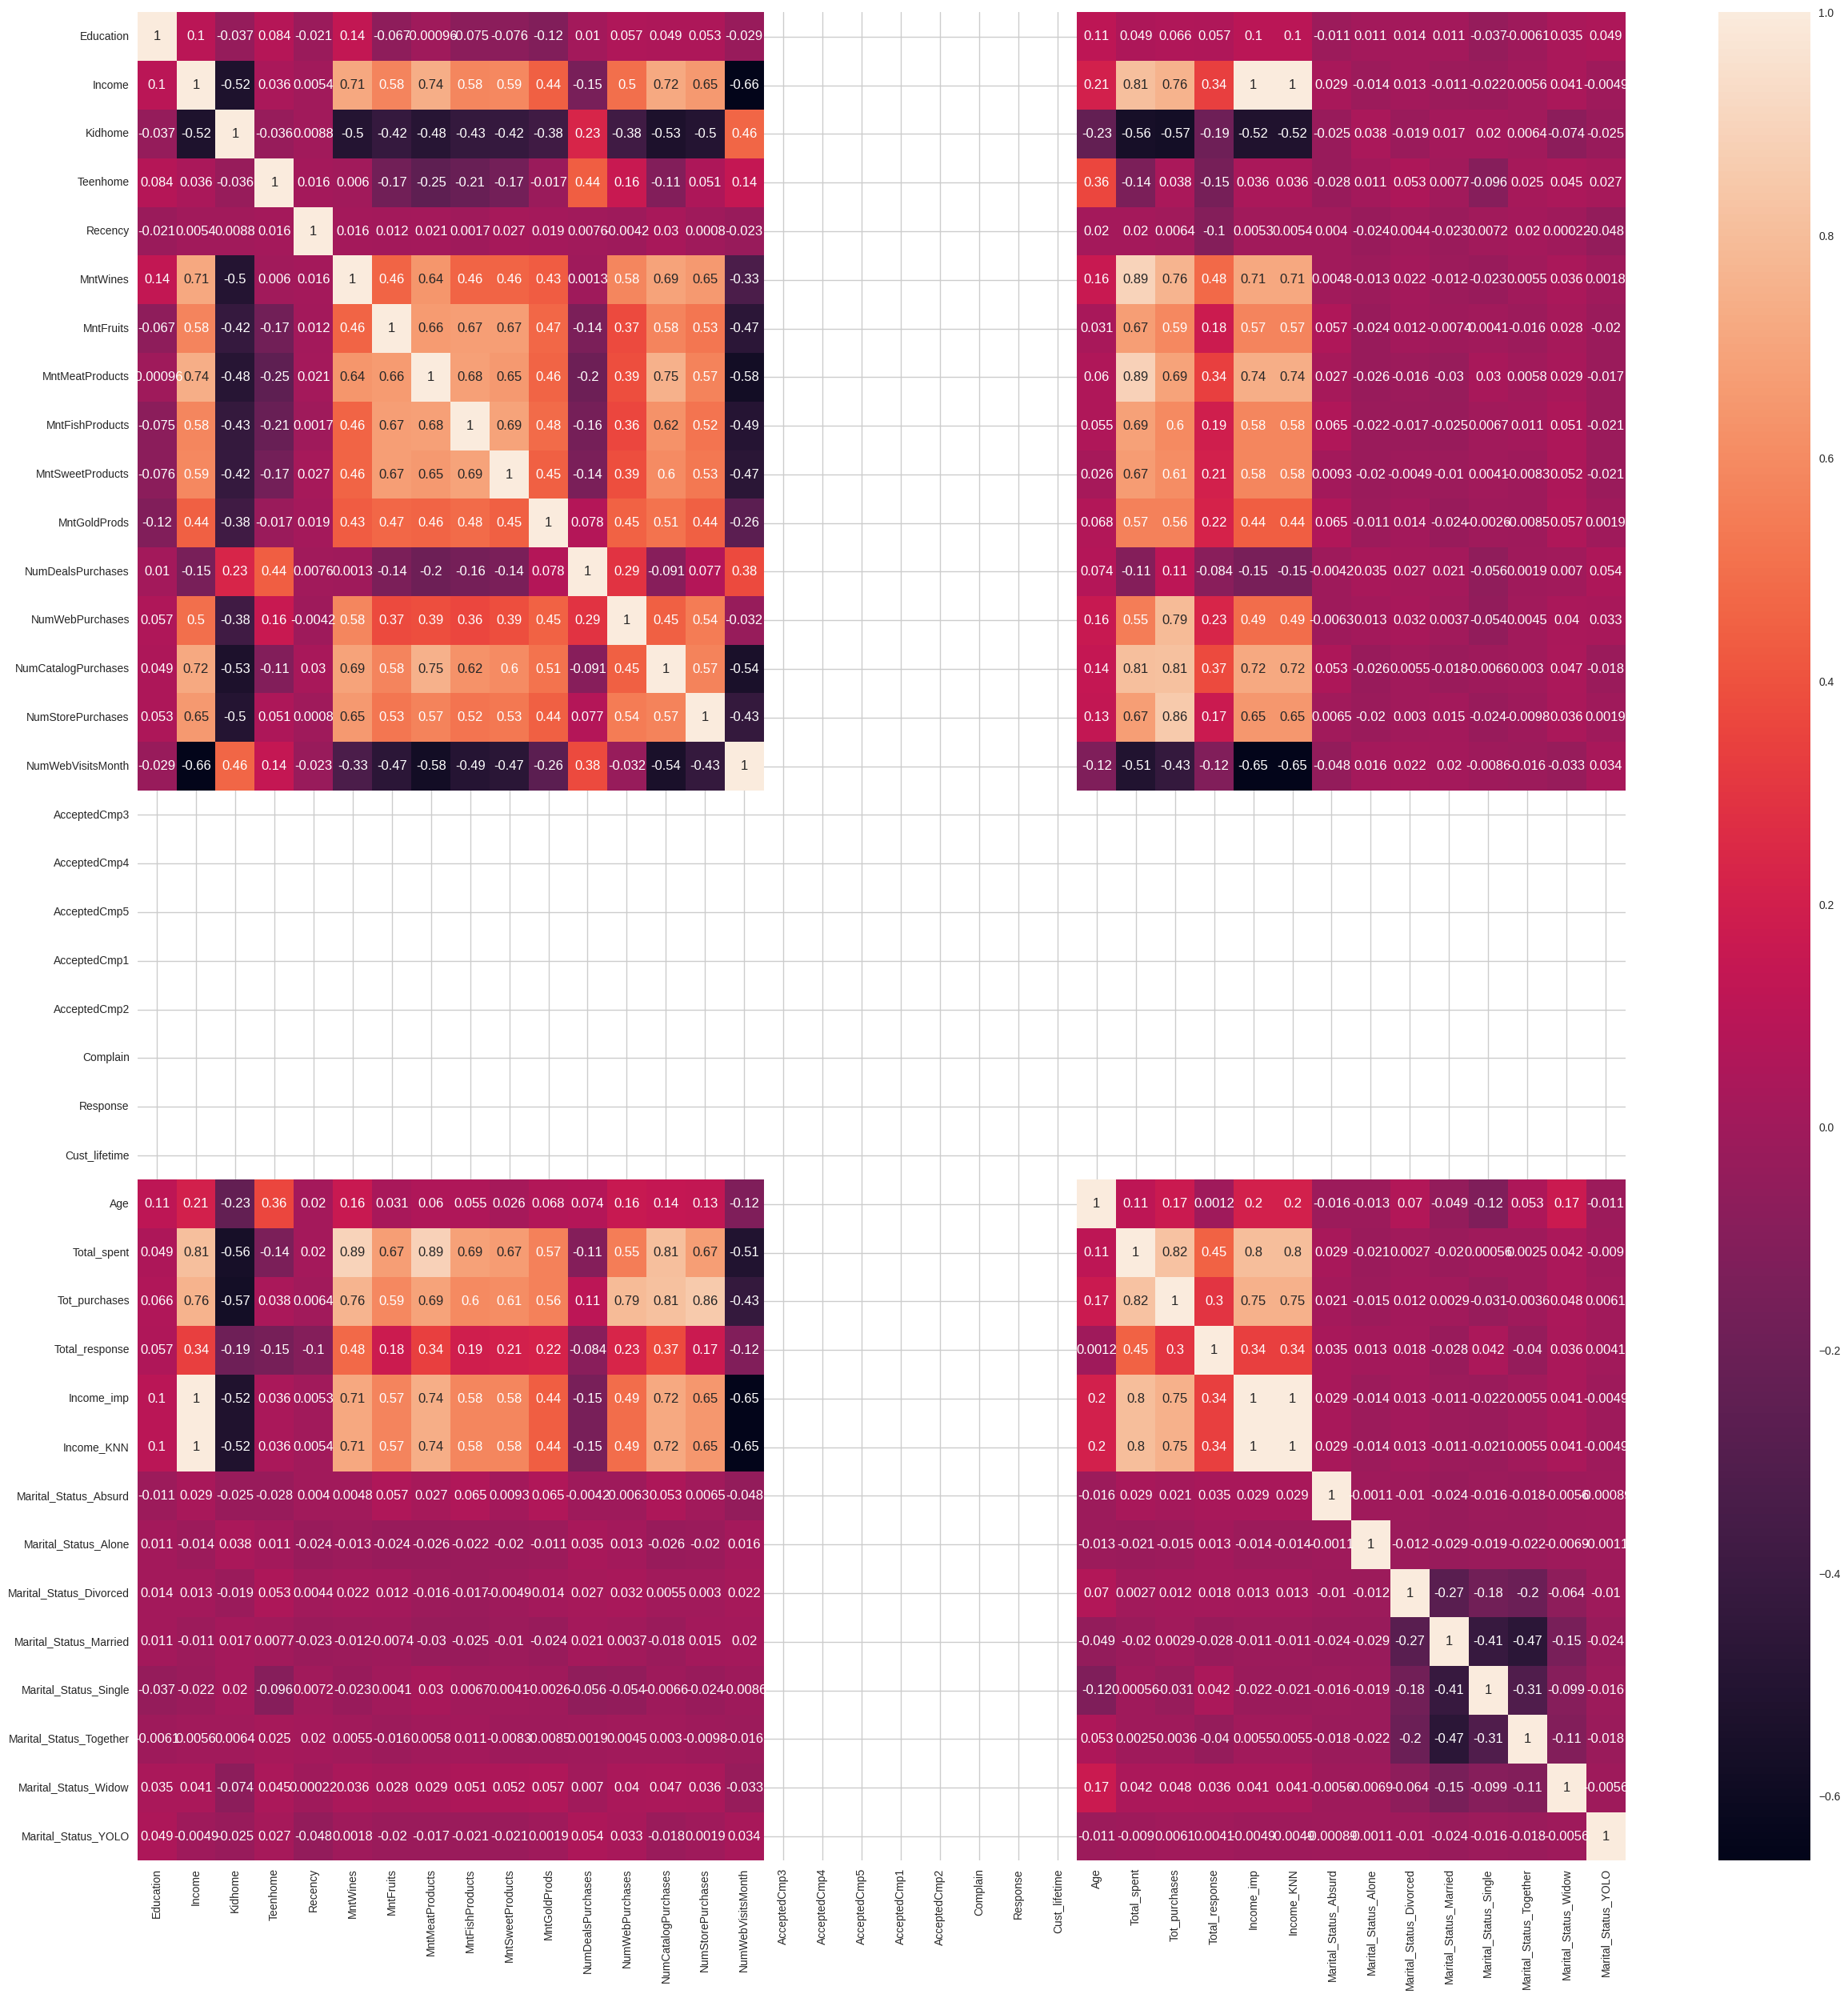

In [42]:
# get the correlation heatmap
plt.figure(figsize =(30,30))
sns.heatmap(corr, annot=True)
plt.show()

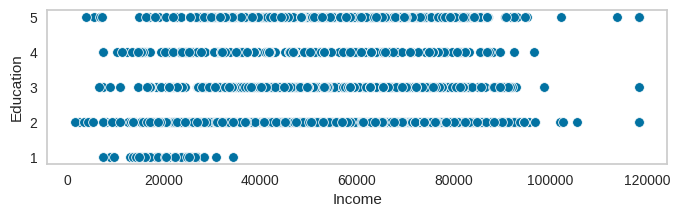

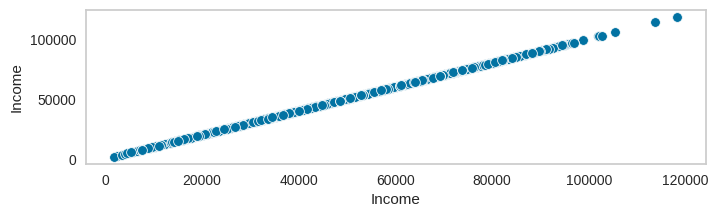

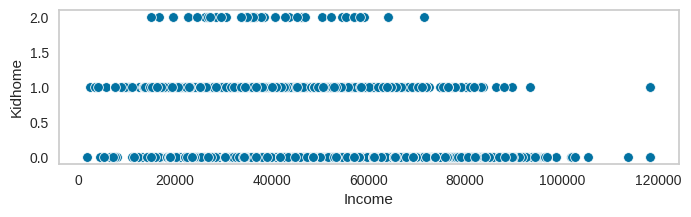

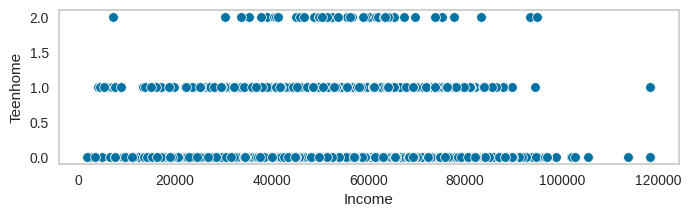

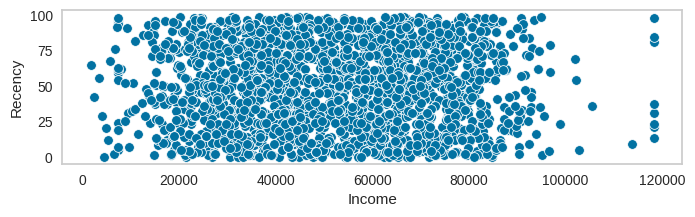

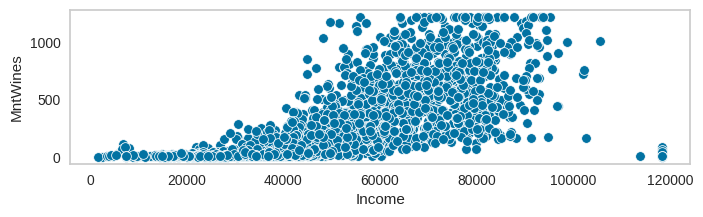

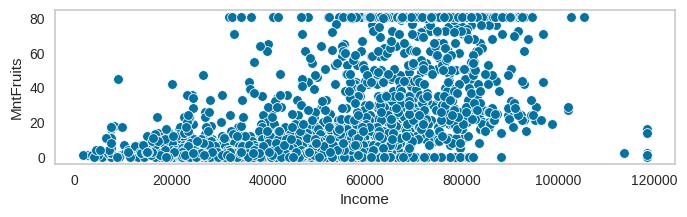

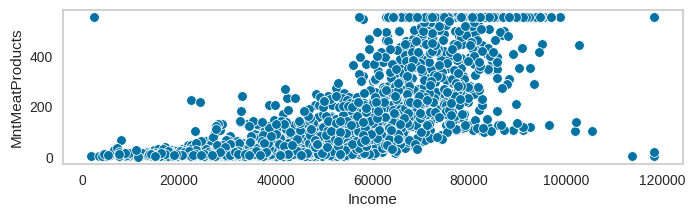

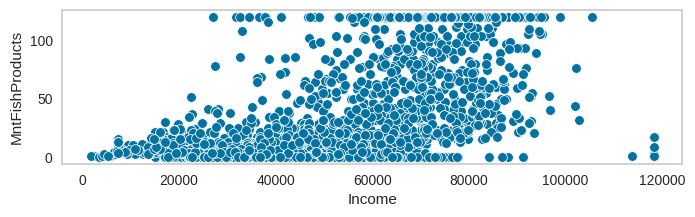

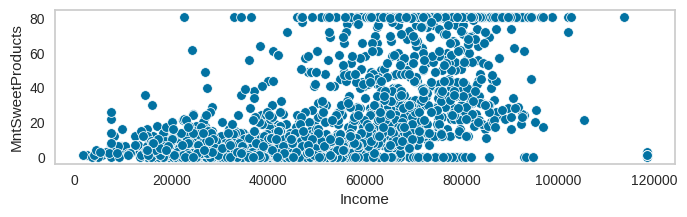

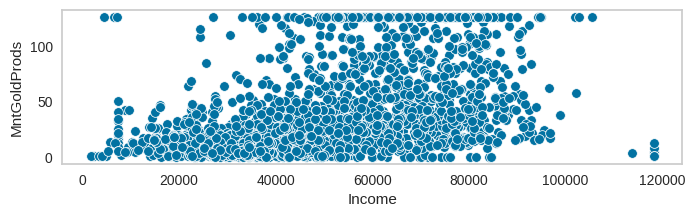

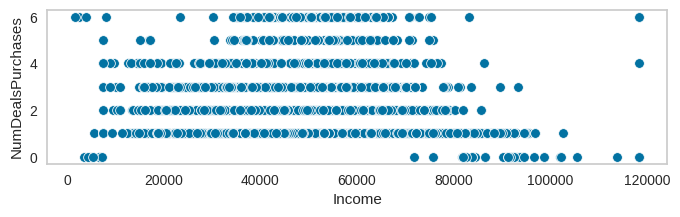

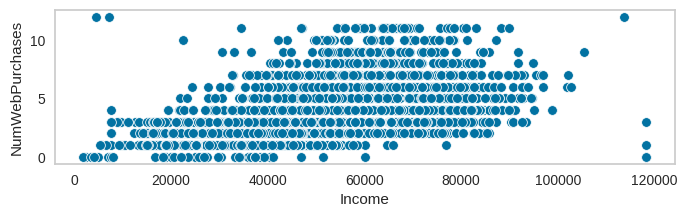

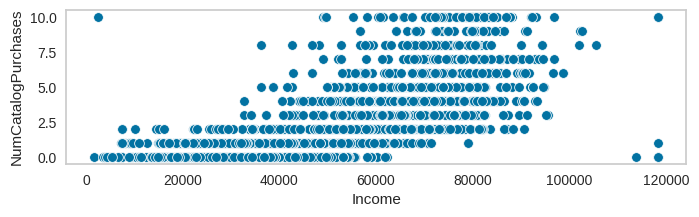

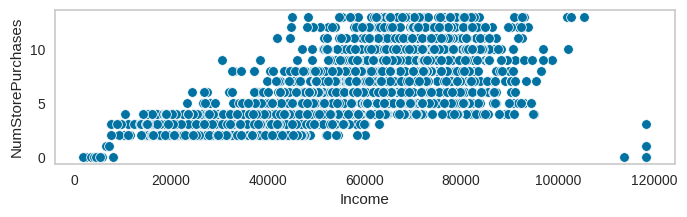

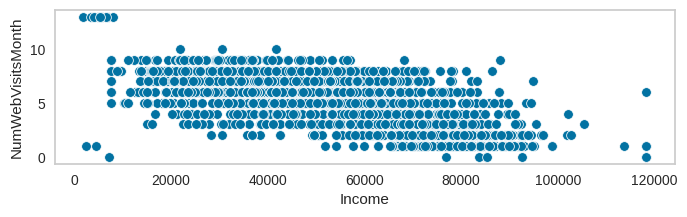

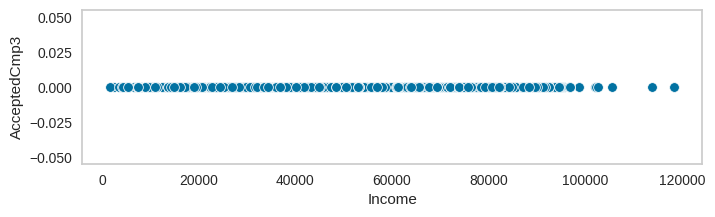

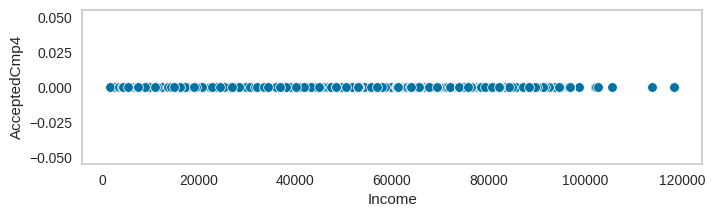

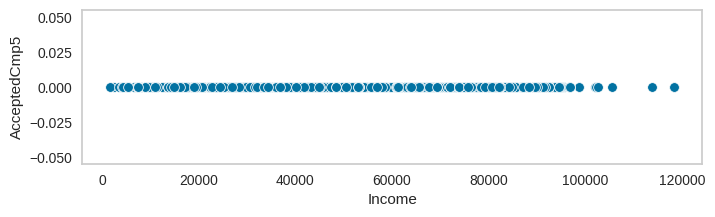

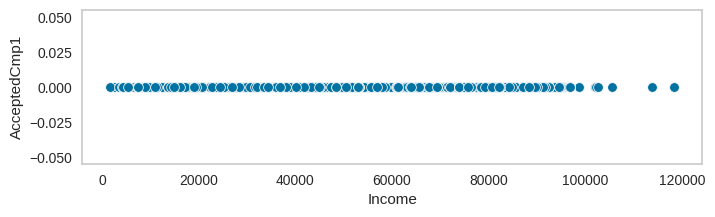

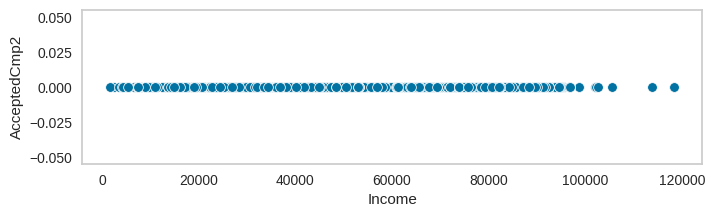

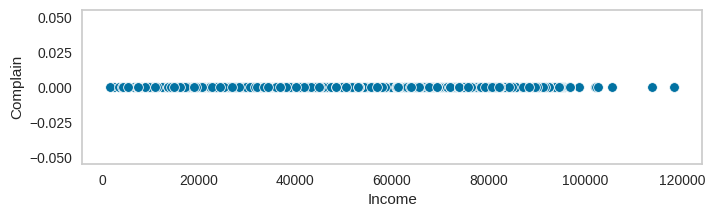

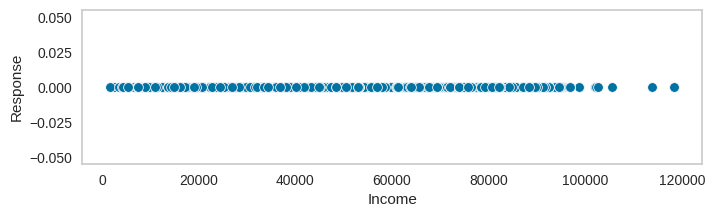

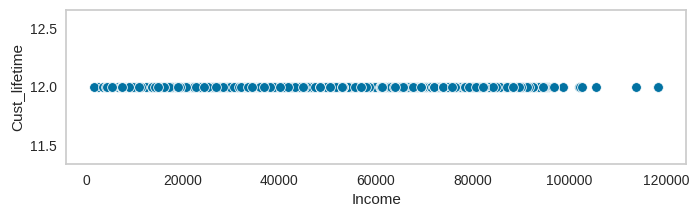

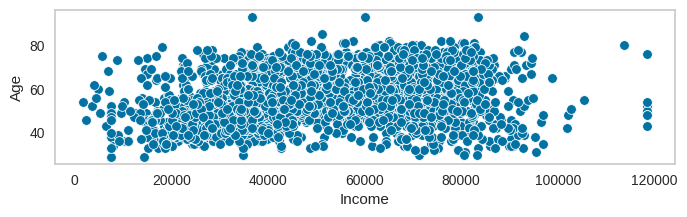

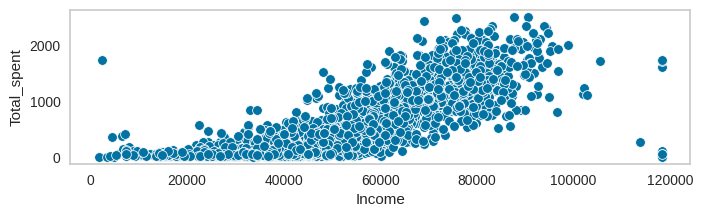

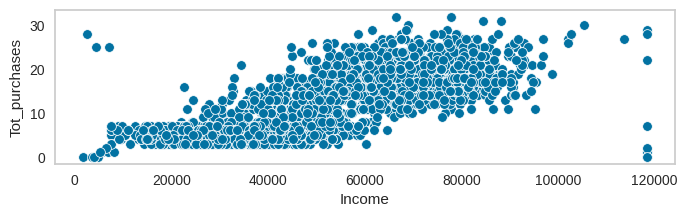

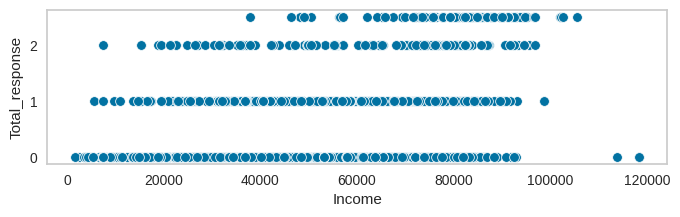

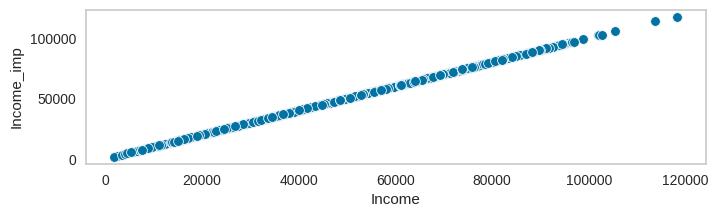

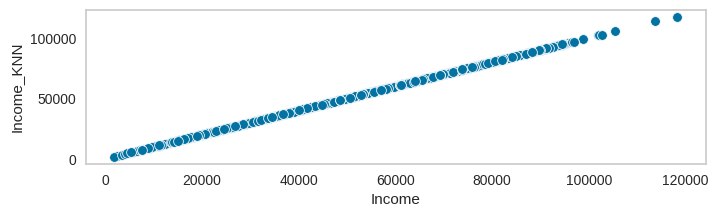

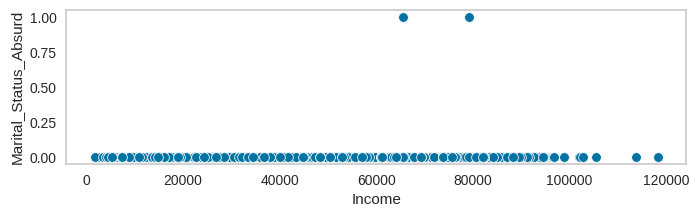

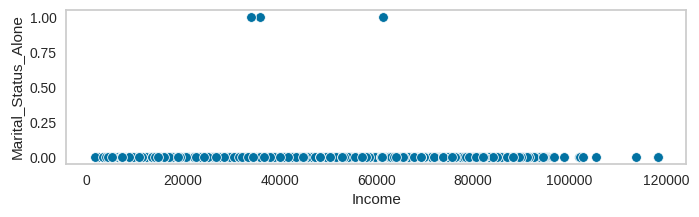

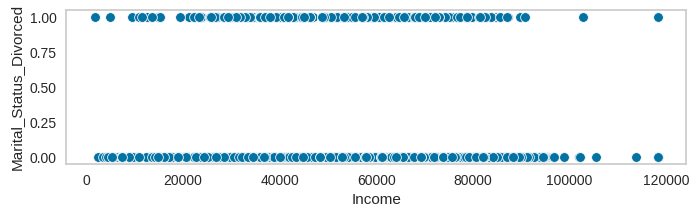

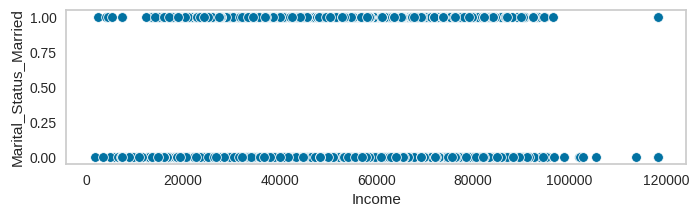

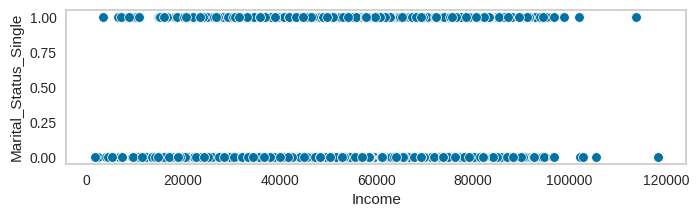

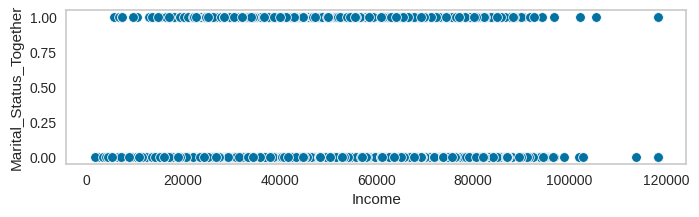

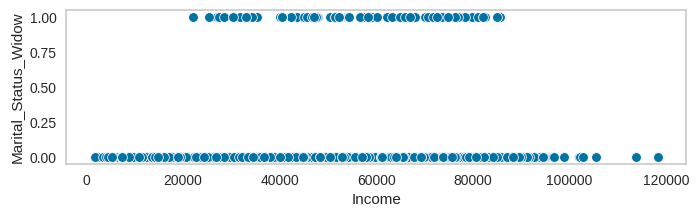

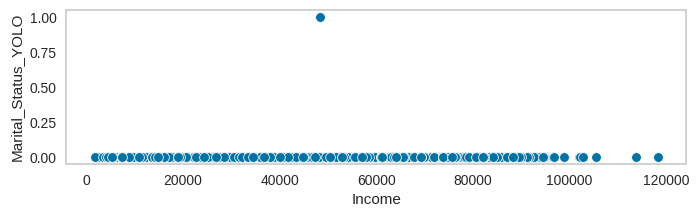

In [34]:
#make a scatterplot for income and other cariables
for i in encoded_data.columns:
  print('\n') #break line before each iteration
  plt.figure(figsize =(8,2))
  sns.scatterplot(encoded_data, x = 'Income', y = i)
  plt.grid(visible=None)
  plt.show()



In [35]:
#group income by NumCatalogPurchases and MntMeatProducts
data_raw_.groupby(['Income'])[['NumCatalogPurchases','MntMeatProducts']].mean().sort_values(by ='NumCatalogPurchases',ascending=False)

NumCatalogPurchases  MntMeatProducts
Income                                       
2447.0                  10.0            556.0
96843.0                 10.0            556.0
65704.0                 10.0             74.0
74250.0                 10.0            392.0
74068.0                 10.0            537.0
...                      ...              ...
32871.0                  0.0             12.0
32765.0                  0.0             17.0
32583.0                  0.0              3.0
31385.0                  0.0             12.0
30801.0                  0.0              5.0

[1967 rows x 2 columns]

Since Income and NumCatalogPurchases have a strong positive relationship. Perhaps it would be beneficial to fill in empty values for income based on NumCatalogPurchases. We will then companry with the median and KNN to see which one better imputed the missing values for income

In [36]:
#fill in empty values for income based on NumCatalogPurchases

encoded_data['Income_'] = encoded_data['Income'].fillna(value = data_raw.groupby(
    ['NumCatalogPurchases'])['Income'].transform('mean')
)

In [37]:
#check imputes values

#select columns for missing and imputed values
missing_columns = ['Income', 'Income_imp' ,'Income_KNN', 'Income_']

encoded_data.loc[misssing_rows, missing_columns]

Income  Income_imp    Income_KNN       Income_
10        NaN     51381.5  52247.251354  32898.571181
27        NaN     51381.5  52247.251354  32898.571181
43        NaN     51381.5  52247.251354  64390.928571
48        NaN     51381.5  52247.251354  41412.802846
58        NaN     51381.5  52247.251354  32898.571181
71        NaN     51381.5  52247.251354  32898.571181
90        NaN     51381.5  52247.251354  54216.883212
91        NaN     51381.5  52247.251354  32898.571181
92        NaN     51381.5  52247.251354  67617.657459
128       NaN     51381.5  52247.251354  41412.802846
133       NaN     51381.5  52247.251354  68652.284672
312       NaN     51381.5  52247.251354  68652.284672
319       NaN     51381.5  52247.251354  64390.928571
1379      NaN     51381.5  52247.251354  54216.883212
1382      NaN     51381.5  52247.251354  32898.571181
1383      NaN     51381.5  52247.251354  32898.571181
138   35860.0     35860.0  35860.000000  35860.000000

##### **Observations:**

* Income: strongly correlates with encoded_data, amount spent on meat and wine, this might mean that high income people spend a lot of money on meant and wine. It also correlates with  store purchases, total spent, total_purcases. It all makes sense becaue the higher the income the more money people have to spend.

* Kidhome: weakly correlates with all variables. However, it less weakly correlates with age.

* MntMeatProducts (besides income) it also stringly correlates with catalog purchases, and it very strongly correlates with total spent. The same goes for MntWines. That mean that meat products and wine are a great product to scale on, and pivot on catalog sales.
MntFruits, MntFishProducts, MntSweetProducts have similar correlation behavior with wine. However, the correlation gets less intense for these items respectevely.

* NumCatalogPurchases: highly correlates with MntMeatProducts, wine, income, total spent, total purchase. This suggests that many purchases are placed using catalog. Hence, its recommended that the business pivots on catalog sales. Catalog sales are followed by  NumStorePurchases and NumWebVisitsMonth  

* The following variables: Education,
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'Year_Customer',
 'Age', have a very weak correlation with the rest of the variables in our dataset. Hence, we should consider droppping some of them.

* Total_spent: Highly correlates with income, all five categories of items, catalog purchases, and store purchases. However, it has a negative correlation with the number of website visits.

* Tot_purchases: Shows that there are more store purchases being made, followed by catalog purchases, and website purchases.

* All marital status have weak correlation but that might be due to the way we encoded the marital status variable

In [38]:
#drop more irrelevant columns

columns_to_drop1 = ['AcceptedCmp3',
                     'AcceptedCmp4',
                    'AcceptedCmp5',
                    'AcceptedCmp1',
                    'AcceptedCmp2',
                    'Response',       #these columns become irrelevant becasue we already have total_response
                    'Complain',
                    'Response',
                    'Cust_lifetime',
                    'Income_imp',
                    'Income_KNN',
                    'Income']     #We are goin to drop income_imp and income_KNN becasue we already have income_ which was imputes based on catalog purchases

encoded_data.drop(columns =columns_to_drop1, inplace = True)


**Scale the data**
We are going to normalize the data using a scaler that is more robust.

In [39]:
scaled_data = encoded_data.copy(True)

In [50]:
columns_to_scale = ['Education',
'Kidhome',
'Teenhome',
'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Age',
 'Total_spent',
 'Tot_purchases',
 'Total_response',
 'Income_']

 #it is vital to remember that we do not scale OneHot encoded data


In [46]:
#import quantile transformer
from sklearn.preprocessing import QuantileTransformer

#set the transformer to give a normal distribution
scaler = QuantileTransformer(output_distribution= 'normal')

#fit and transform to apply the transformer to the data
scaled_data_ = scaler.fit_transform(scaled_data[columns_to_scale])

#convert the data back to a pandas data frame
scaled_data_ = pd.DataFrame(scaled_data_ , columns =columns_to_scale )



Skew: 0.78


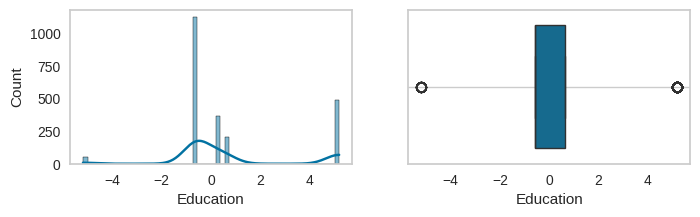



Skew: 0.49


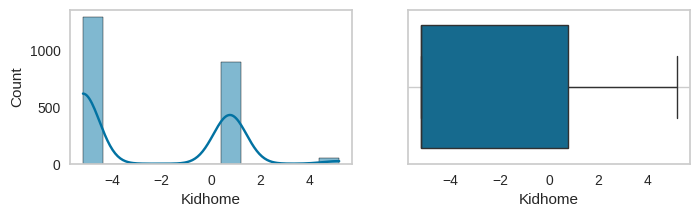



Skew: 0.27


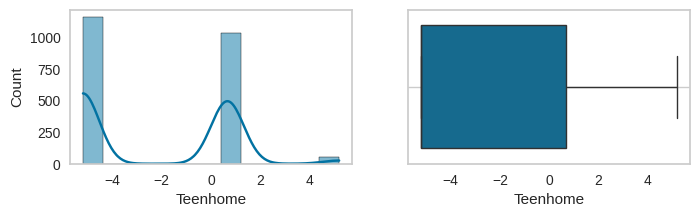



Skew: -0.34


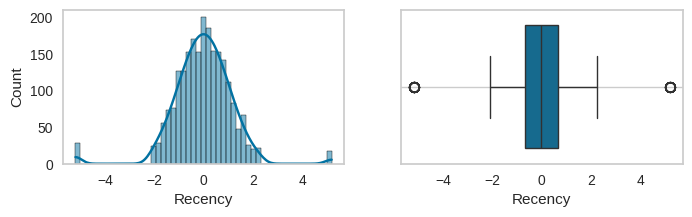



Skew: 0.67


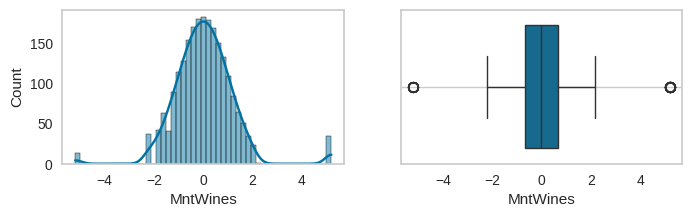



Skew: -0.15


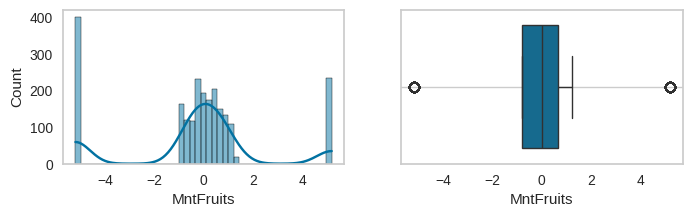



Skew: 1.79


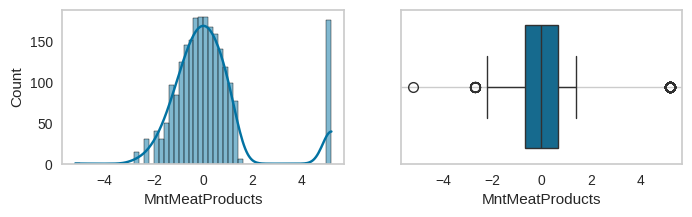



Skew: -0.16


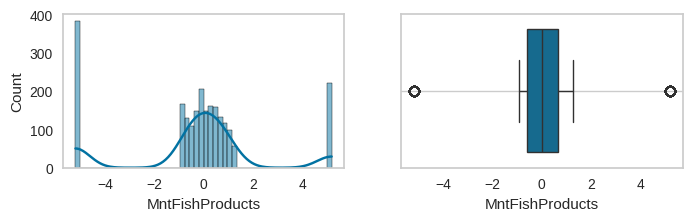



Skew: -0.12


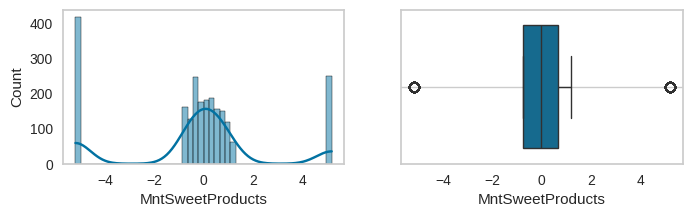



Skew: 0.87


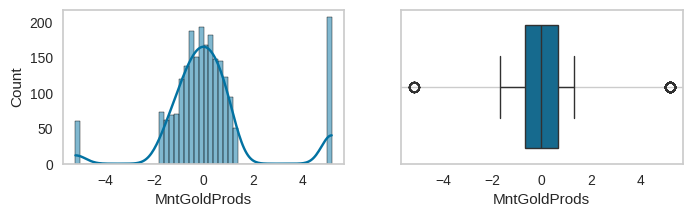



Skew: 1.06


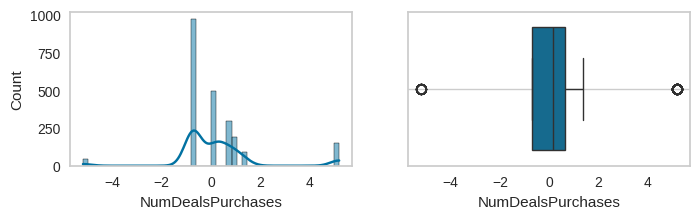



Skew: -1.31


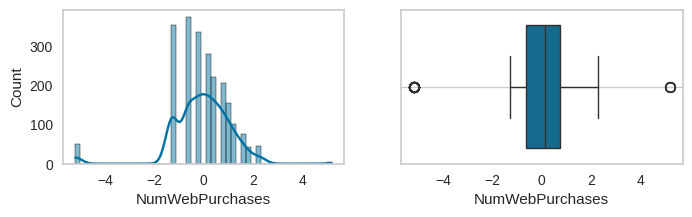



Skew: -0.51


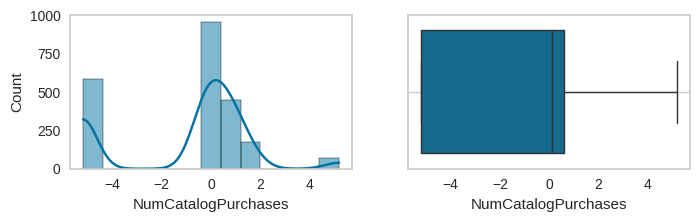



Skew: 1.35


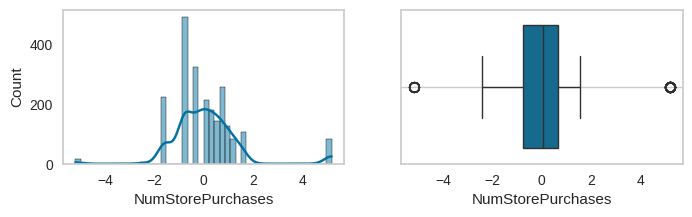



Skew: -0.09


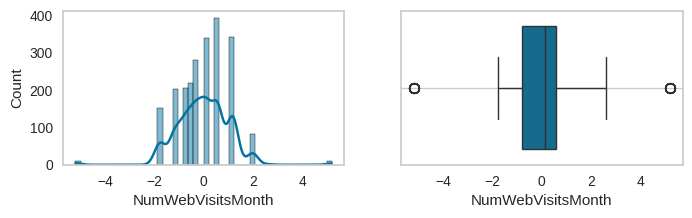



Skew: 0.04


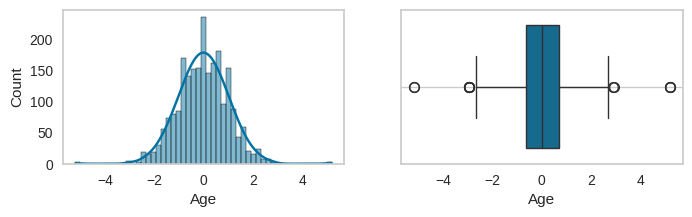



Skew: 0.09


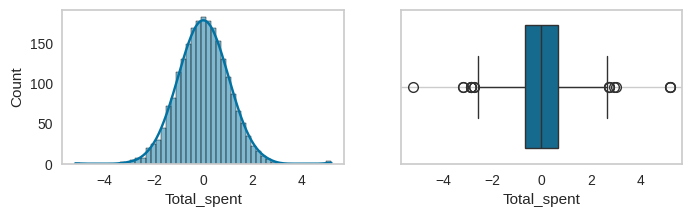



Skew: -0.09


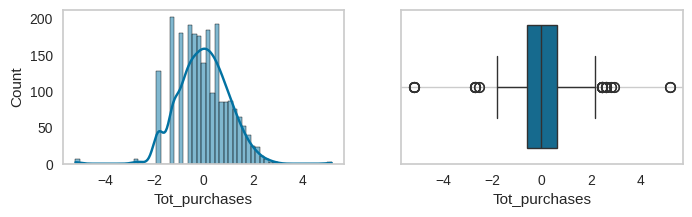



Skew: 1.29


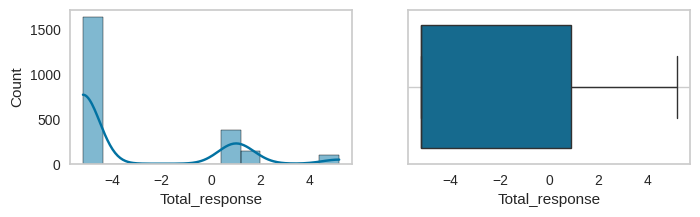



Skew: 0.3


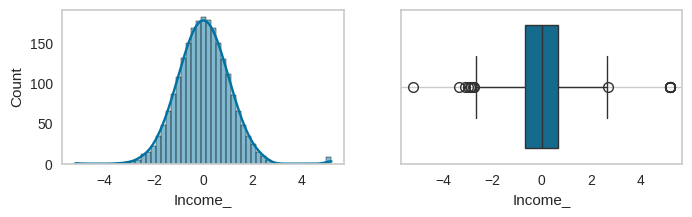

In [48]:
for i in columns_to_scale:
  print('\n') #break line before each iteration
  print('Skew:', round(scaled_data_[i].skew(),2)) #display the skeweness of the data
  plt.figure(figsize =(8,2))
  plt.subplot(1,2,1)
  sns.histplot(scaled_data_, x =i, kde=True)
  plt.grid(visible=None)
  plt.subplot(1,2,2)
  sns.boxplot(scaled_data_, x =i)
  plt.grid(visible=None)
  plt.show()

Our data is closer to a normal/standard distribution now

In [51]:
scaled_data_.head(10).T

0         1         2         3         4  \
Education           -0.595437 -0.595437 -0.595437 -0.595437  5.199338   
Kidhome             -5.199338  0.764710 -5.199338  0.764710  0.764710   
Teenhome            -5.199338  0.664287 -5.199338 -5.199338 -5.199338   
Recency              0.243255 -0.278302 -0.615025 -0.615025  1.629992   
MntWines             0.951518 -1.016672  0.538094 -1.016672 -0.002509   
MntFruits            5.199338 -0.790168  0.910873 -0.305796  0.824933   
MntMeatProducts      1.384628 -1.384628  0.337506 -0.523537  0.293986   
MntFishProducts      5.199338 -0.805692  1.223287 -0.109365  0.639462   
MntSweetProducts     5.199338 -0.763030  0.427976 -0.417002  0.556927   
MntGoldProds         0.981540 -0.877196  0.445919 -0.979511 -0.317650   
NumDealsPurchases    0.650274  0.162552 -0.716839  0.162552  1.362078   
NumWebPurchases      1.298271 -1.278137  1.298271 -0.634851  0.441766   
NumCatalogPurchases  5.199338 -0.325577  0.113152 -5.199338  0.380326   
NumStorePurchases   -0.253606 -1.562721  1.044409 -0.253606  0.270485   
NumWebVisitsMonth    0.576075 -0.214920 -0.514923  0.134645 -0.214920   
Age                  0.848075  1.121060  0.338834 -1.242061 -0.981540   
Total_spent          1.404533 -1.475269  0.375537 -0.888309  0.044231   
Tot_purchases        1.189522 -1.233962  0.873515 -0.593940  0.156199   
Total_response       0.880888 -5.199338 -5.199338 -5.199338 -5.199338   
Income_              0.244636 -0.178763  0.837649 -1.149595  0.248321   

                            5         6         7         8         9  
Education            0.278302 -0.595437  5.199338  5.199338  5.199338  
Kidhome             -5.199338 -5.199338  0.764710  0.764710  0.764710  
Teenhome             0.664287  0.664287 -5.199338 -5.199338  0.664287  
Recency             -0.953493 -0.376283 -0.423855 -0.848075  0.489307  
MntWines             0.716839  0.151390 -0.275694 -0.905189 -0.604448  
MntFruits            0.805692  1.093272  0.090452 -5.199338 -5.199338  
MntMeatProducts      0.185480  0.482242 -0.082896 -0.422483 -1.384628  
MntFishProducts     -5.199338  0.678433 -0.599937 -0.599937 -0.939747  
MntSweetProducts     0.800496  0.901416 -0.763030 -0.417002 -0.763030  
MntGoldProds        -0.368215  0.075345 -0.036391 -1.449682 -0.406079  
NumDealsPurchases    0.162552  1.037937  0.162552 -0.716839 -0.716839  
NumWebPurchases      0.724973  1.018778  0.148584 -0.198258 -1.278137  
NumCatalogPurchases  0.611996  0.380326 -5.199338 -5.199338 -5.199338  
NumStorePurchases    1.044409  0.464007 -0.253606 -1.562721 -5.199338  
NumWebVisitsMonth    0.134645  0.134645  1.181921  1.985876  5.199338  
Age                  0.211070 -0.085414 -1.331018 -0.350817  1.593219  
Total_spent          0.320362  0.217167 -0.303383 -1.004131 -0.935852  
Tot_purchases        0.873515  0.483658 -0.284828 -0.864365 -2.696511  
Total_response      -5.199338 -5.199338 -5.199338  0.880888  0.880888  
Income_              0.402577  0.154167 -0.768206 -0.953493 -2.739400

In [52]:
columns_to_merge = [
 'Marital_Status_Absurd',
 'Marital_Status_Alone',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow',
 'Marital_Status_YOLO']

In [53]:
#merge the data with the
transformed_data = pd.concat([scaled_data_,encoded_data[columns_to_merge]], axis =1 )

In [54]:
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education                2240 non-null   float64
 1   Kidhome                  2240 non-null   float64
 2   Teenhome                 2240 non-null   float64
 3   Recency                  2240 non-null   float64
 4   MntWines                 2240 non-null   float64
 5   MntFruits                2240 non-null   float64
 6   MntMeatProducts          2240 non-null   float64
 7   MntFishProducts          2240 non-null   float64
 8   MntSweetProducts         2240 non-null   float64
 9   MntGoldProds             2240 non-null   float64
 10  NumDealsPurchases        2240 non-null   float64
 11  NumWebPurchases          2240 non-null   float64
 12  NumCatalogPurchases      2240 non-null   float64
 13  NumStorePurchases        2240 non-null   float64
 14  NumWebVisitsMonth       

## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

In [61]:
#Choosing the appropriate number of clusters

#create empty lists for WCSS (whinin cluster square root), and score for silhouette_score
WCSS = []
Score = []

#create a range from 2 to 10 for k
K = range(2,10)

for k in K:
  #prepare and fit the kmeans model
  kmeans = KMeans(n_clusters= k, random_state= 1).fit(transformed_data)
  #get the sum of squared distances between each data point
  inertia = kmeans.inertia_
  #add wcss to the list
  WCSS.append(inertia)
  #Make kmean predictions
  pred = kmeans.predict(transformed_data)
  #get the silhouette_score
  score = silhouette_score(transformed_data, pred)
  #add the scores to the list
  Score.append(score)



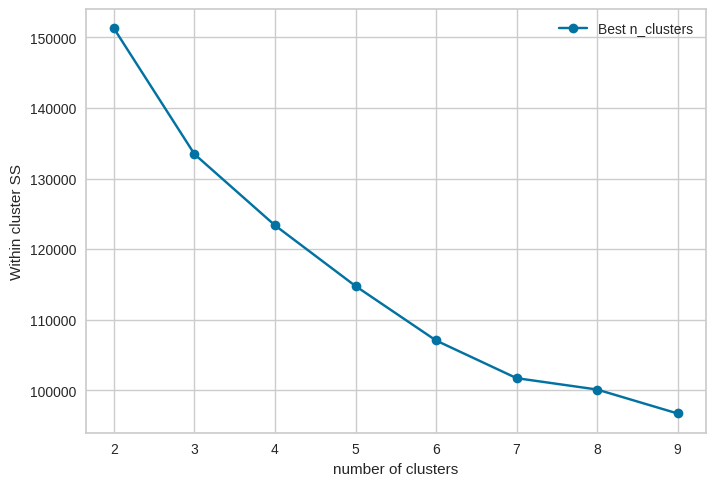

In [62]:
#plot WCSS vs K
plt.plot(K, WCSS, label = 'Best n_clusters', marker = 'o')
plt.xlabel("number of clusters")
plt.ylabel("Within cluster SS")
plt.xticks(K)
plt.grid(visible = True)
plt.legend()
plt.show()

##### **Observations:**
k=3 seems to be a great candidate for the number of clusters, and so are k=7 and k=8. However the grapth is still not clear enough. Hence we are going to perform other methods to confirm which of the three is the optimal number of clusters.


#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

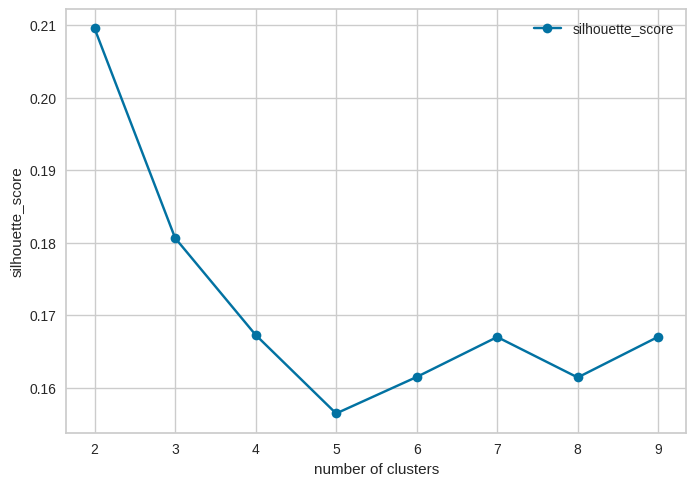

In [63]:
#Plot silhouette_score vs K
plt.plot(K, Score, label = 'silhouette_score', marker = 'o')
plt.xlabel("number of clusters")
plt.ylabel("silhouette_score")
plt.xticks(K)
plt.grid(visible = True)
plt.legend()
plt.show()

##### **Observations:**
Since the best number of clusters should be the one with the highest silhouette_score (closest to 1). Here we observe that K=3 gives us the best silhouette_score. This confirms that k=3 is the best candidate so far. Let us perform the the Hierarchical clustering Dendrogram to an even clearer picture

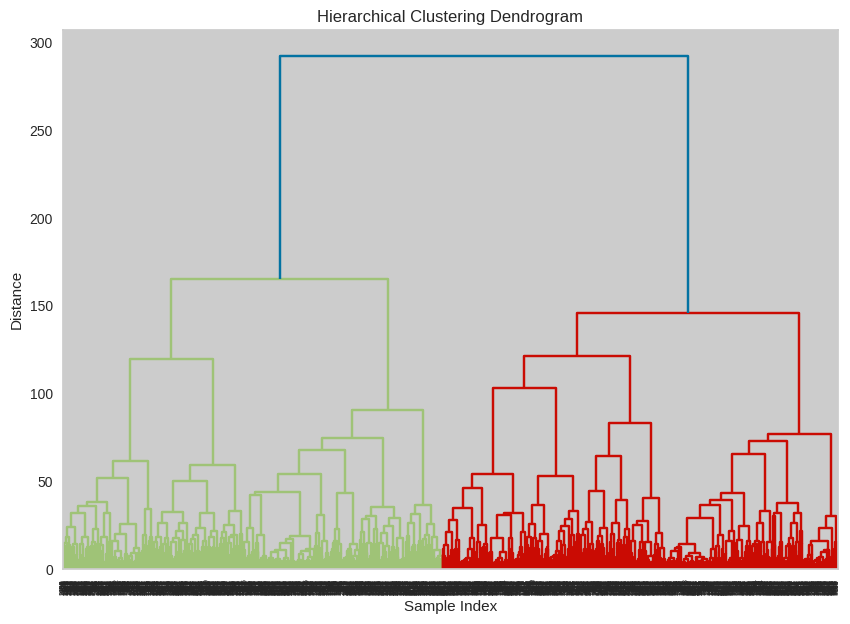

In [64]:
#Hierarchical clustering Dendrogram

from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(transformed_data, 'ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()



Here we are going to place our horizontal like at a distance of 150

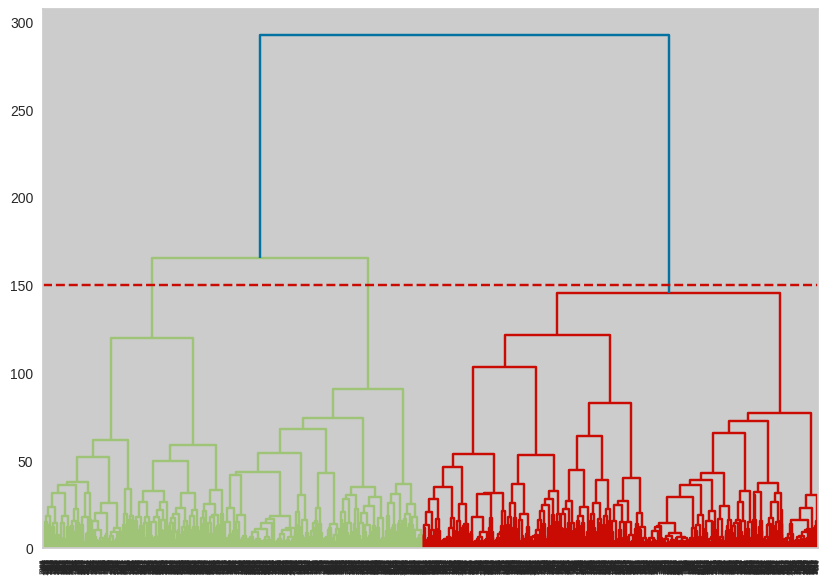

In [65]:

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.axhline(y = 150, color = 'r', linestyle = '--')
plt.show()

Based on the number of vertical lines that that the horizontal line crosses, we can confirm that k=3 is the optimal number of clusters.

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [66]:
#perform k_means with k=3
from numpy import unique
k_means_ = KMeans(n_clusters = 3, random_state = 1).fit(transformed_data)
wcss_ = k_means_.inertia_
pred_ = k_means_.predict(transformed_data)
score_ = silhouette_score(transformed_data, pred_)
clust = unique(pred_)
centroids = k_means_.cluster_centers_
transformed_data['clusters'] = k_means_.labels_

Let us perform PCA to have a better visualization of our clusters

In [67]:
# import PCA
from sklearn.decomposition import PCA

#perfom the pca and define the dimention for it
pca = PCA( random_state= 42)
data_pca = pd.DataFrame(pca.fit_transform(transformed_data))

#get the cumulative perfecentage of variance explained by each PC
explained_variance = pca.explained_variance_ratio_
explained_variance= explained_variance.cumsum()

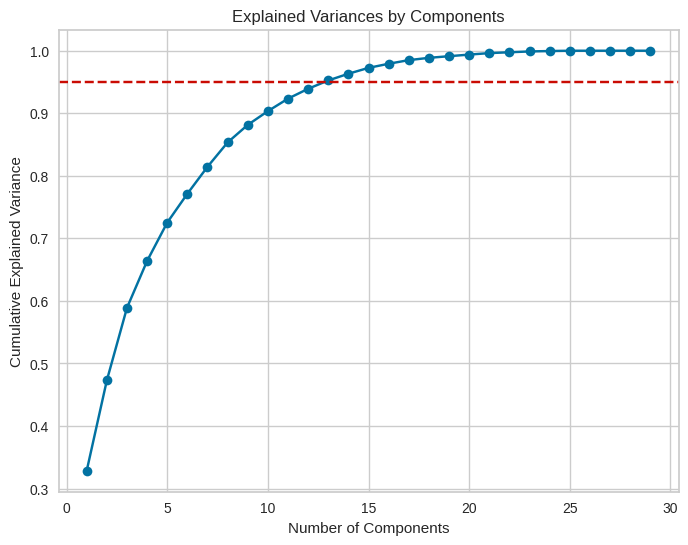

In [68]:
# plot the Cumulative explaines_variance vs number of components
plt.figure(figsize = (8,6))
plt.plot(range(1,len(explained_variance)+1), explained_variance, marker = 'o')
plt.axhline(y = 0.95, color = 'r', linestyle = '--', label = '95% variance')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

According to the PCA grapth, 3 principal components will explain close to 60% of the variance of our data, 10 PC's will explain about 90% of the variance, and 13 PC's will explain 95%.

In [69]:
Principal_comp = ['PC1', 'PC2', 'PC3']
pca_dt = pd.DataFrame(np.round(pca.components_[:3,:],2), index = Principal_comp, columns=transformed_data.columns.tolist())

In [71]:
pca_dt.T

PC1   PC2   PC3
Education                0.03  0.29  0.21
Kidhome                  0.39 -0.30  0.09
Teenhome                 0.13  0.71 -0.36
Recency                 -0.00 -0.01 -0.04
MntWines                -0.14  0.14  0.07
MntFruits               -0.36 -0.21 -0.21
MntMeatProducts         -0.23  0.01  0.06
MntFishProducts         -0.35 -0.21 -0.21
MntSweetProducts        -0.37 -0.21 -0.22
MntGoldProds            -0.19  0.06 -0.05
NumDealsPurchases        0.05  0.15 -0.10
NumWebPurchases         -0.12  0.10 -0.02
NumCatalogPurchases     -0.39  0.26  0.03
NumStorePurchases       -0.15  0.09 -0.05
NumWebVisitsMonth        0.10 -0.01  0.02
Age                     -0.01  0.12 -0.03
Total_spent             -0.16  0.06  0.03
Tot_purchases           -0.14  0.09 -0.01
Total_response          -0.25  0.13  0.80
Income_                 -0.13  0.08  0.02
Marital_Status_Absurd   -0.00 -0.00  0.00
Marital_Status_Alone     0.00  0.00  0.00
Marital_Status_Divorced -0.00  0.00 -0.00
Marital_Status_Married   0.00  0.00 -0.00
Marital_Status_Single   -0.00 -0.01  0.01
Marital_Status_Together  0.00  0.00 -0.00
Marital_Status_Widow    -0.00  0.00  0.00
Marital_Status_YOLO     -0.00  0.00  0.00
clusters                 0.05  0.12 -0.08

**Observations: **

Pc1 = 0.39*Kidhome-0.14MntWines - 0.36*MntFruits -0.35*MntFishProducts-0.37*MntSweetProducts - 0.19*MntGoldProducts  - 0.12*WebPurchases -0.15*NumStorePurchases +0.15*NumWebVisitsMonth -0.16*Total_spent -0.14*Tot_purchases -0.13*Income_


PC2 = 0.29* Education +0.71*Teenhome+ 0.14*MntWines + 0.15*NumDealsPurchases +0.12*Age -0.1*Marital_Status_Single

PC3 = 0.80*Total_response + 0.01*Marital_Status_Single


PC1: Capture customers who have kids at home, spend less on products in the five categories (wine, fruits, fish, sweets, and gold), make few purchases (both on the website and in stores), have low income, and have high website visits.

PC2: Captures customers who highly educated, have teenage children at home, make a lot of purchases using discount services, tend to be older, and are not single

PC3: Captures customers who highly respond to campaigns, and might be single (however, this variable is almost insignificant here)


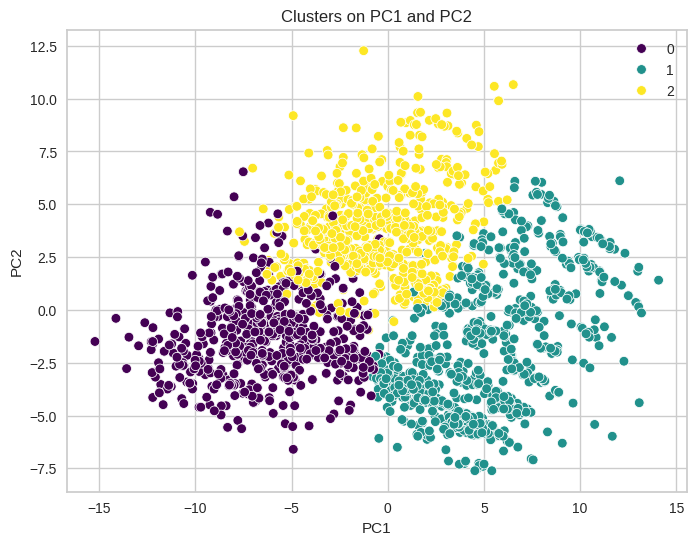

In [70]:
#visualizing the clusters with PCA
pca_2nd = data_pca.to_numpy()[:, :2]
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_2nd[:,0], y=pca_2nd[:,1], hue=transformed_data['clusters'], palette='viridis')
plt.title("Clusters on PC1 and PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


In [72]:
# Group by clusters and calculate mean and median
features = list(set(transformed_data.columns.tolist())- set(['clusters']))
summary = transformed_data.groupby('clusters')[features].agg(['mean', 'median']).reset_index()

summary.T

0         1         2
clusters                        0.000000  1.000000  2.000000
Marital_Status_Single   mean    0.246082  0.243398  0.151847
                        median  0.000000  0.000000  0.000000
Marital_Status_YOLO     mean    0.000000  0.000000  0.002736
                        median  0.000000  0.000000  0.000000
MntGoldProds            mean    1.107228 -0.785711  0.694883
                        median  0.604455 -0.718462  0.280911
Marital_Status_Divorced mean    0.090909  0.096441  0.123119
                        median  0.000000  0.000000  0.000000
MntMeatProducts         mean    1.905129 -0.868611  0.168864
                        median  1.008296 -0.837338  0.142244
Marital_Status_Widow    mean    0.042320  0.012629  0.053352
                        median  0.000000  0.000000  0.000000
NumCatalogPurchases     mean    1.178819 -3.467945  0.221187
                        median  0.846279 -5.199338  0.113152
Tot_purchases           mean    0.764749 -0.909047  0.418921
                        median  0.741388 -0.864365  0.262686
NumDealsPurchases       mean   -0.704436  0.053326  1.136673
                        median -0.716839  0.162552  0.650274
Marital_Status_Alone    mean    0.000000  0.002296  0.001368
                        median  0.000000  0.000000  0.000000
NumWebPurchases         mean    0.395979 -0.881287  0.550419
                        median  0.441766 -0.634851  0.441766
Marital_Status_Married  mean    0.363636  0.392652  0.396717
                        median  0.000000  0.000000  0.000000
Recency                 mean   -0.007088  0.003131 -0.040344
                        median  0.042668 -0.013801  0.013801
NumStorePurchases       mean    0.920052 -0.842875  0.521666
                        median  0.653377 -0.776528  0.464007
Income_                 mean    0.912359 -0.836682  0.222020
                        median  0.954438 -0.795522  0.212354
Teenhome                mean   -4.730615 -3.102880  0.895334
                        median -5.199338 -5.199338  0.664287
Education               mean    0.845500  0.515070  1.121029
                        median -0.595437 -0.595437  0.278302
MntWines                mean    0.865046 -0.934976  0.447045
                        median  0.702612 -0.833781  0.322932
MntFruits               mean    1.796411 -1.707338 -0.473756
                        median  0.860725 -0.590949  0.090452
Kidhome                 mean   -4.890852  0.168629 -3.847077
                        median -5.199338  0.764710 -5.199338
Marital_Status_Together mean    0.253918  0.252583  0.270862
                        median  0.000000  0.000000  0.000000
Age                     mean    0.023380 -0.340304  0.387631
                        median  0.089192 -0.350817  0.338834
MntSweetProducts        mean    1.767842 -1.717872 -0.456182
                        median  0.864365 -0.561327  0.082896
MntFishProducts         mean    1.911338 -1.694982 -0.549562
                        median  0.918498 -0.599937  0.051460
NumWebVisitsMonth       mean   -0.824432  0.552650  0.047950
                        median -0.809168  0.576075  0.134645
Total_spent             mean    0.994145 -0.929437  0.245613
                        median  0.971195 -0.848075  0.201441
Marital_Status_Absurd   mean    0.003135  0.000000  0.000000
                        median  0.000000  0.000000  0.000000
Total_response          mean   -1.558144 -4.363368 -3.626441
                        median -5.199338 -5.199338 -5.199338

**Observations:**

Here we are able to identify three groups:

The first group represents customers who make more purchases, spend more in our company, earn the highest income, are either single or identify their marital status as ‘absurd,’ make more in-store purchases, and spend a lot on wine, meat, and suits.

The second group represents customers who respond the least to campaigns, spend the least in our store (in all five product categories), have kids at home, have the lowest income amongst all groups, are the least educated ones, are the youngest across all groups, make the most website visits in a month, and whose marital status is represented as alone (they might be single parents) or divorced; they make the fewest purchases. Also, they have the most recent engagement with our business

The third group is represented by customers who
Are moderate in their purchases and spending (across all five categories of products), have a partner (Marital_Status_Together) or identify their marital status as “Yolo” (they probably opt for casual relationships with no commitment) or are widows, have moderate income, are the most educated ones amongst all the groups, tend to be the oldest amongst all the groups, make more purchases online, make more use of discounts, and have teenage children at home.

In [73]:
#Visualize the data with TSNE
from sklearn.manifold import TSNE

data_for_tsne = transformed_data[features]

#iniciate tsne
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
tsne_results = tsne.fit_transform(data_for_tsne)

tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])

tsne_df['clusters_'] = transformed_data['clusters']

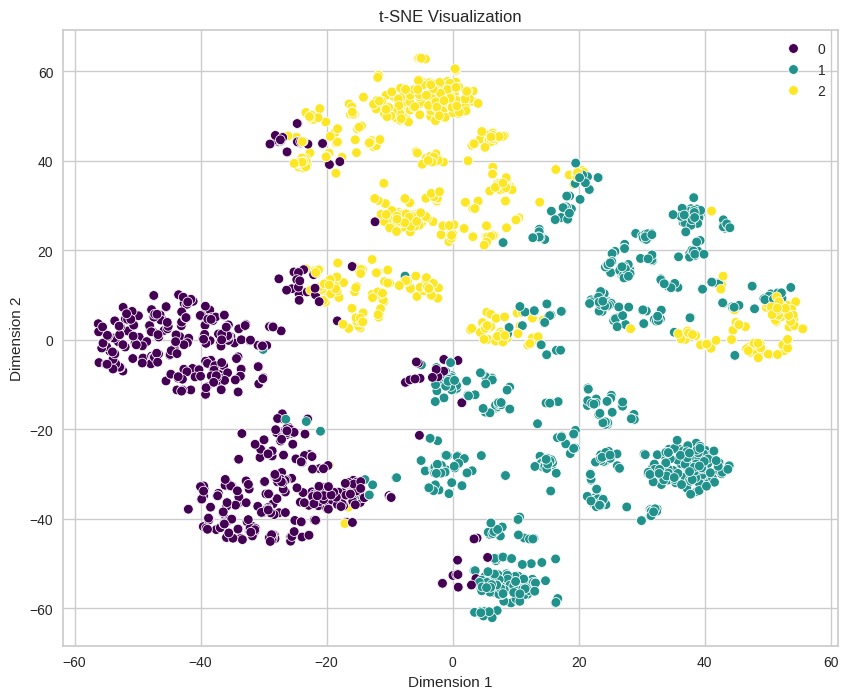

In [74]:
# Plotting the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='clusters_', data=tsne_df, palette='viridis')
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

Here we notice a little bit of overlap within clusters.

## **Cluster Profiling and Comparison**

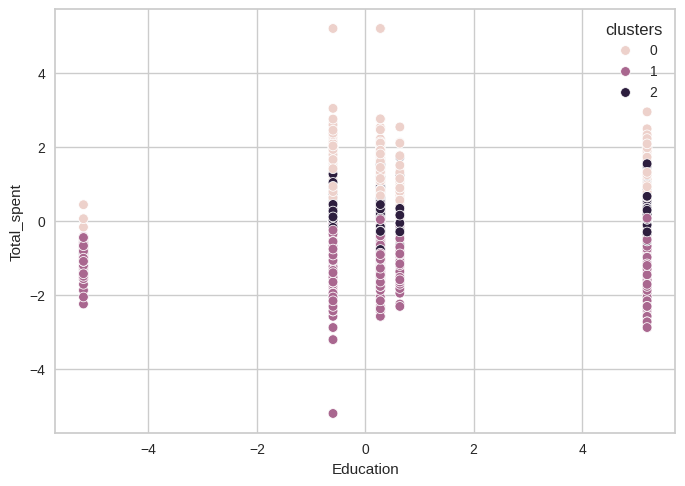

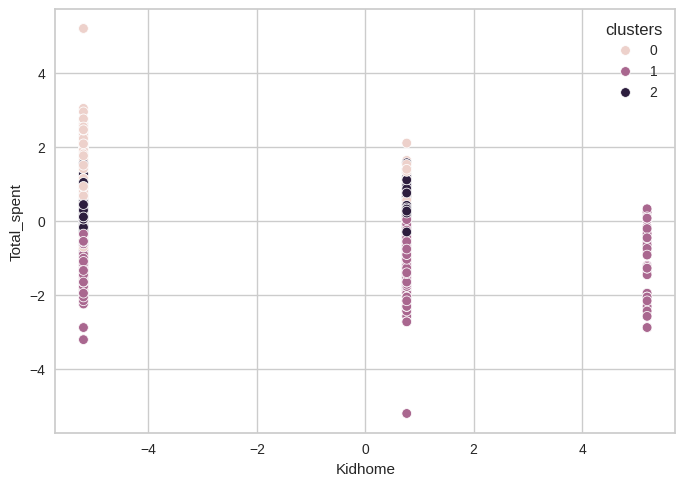

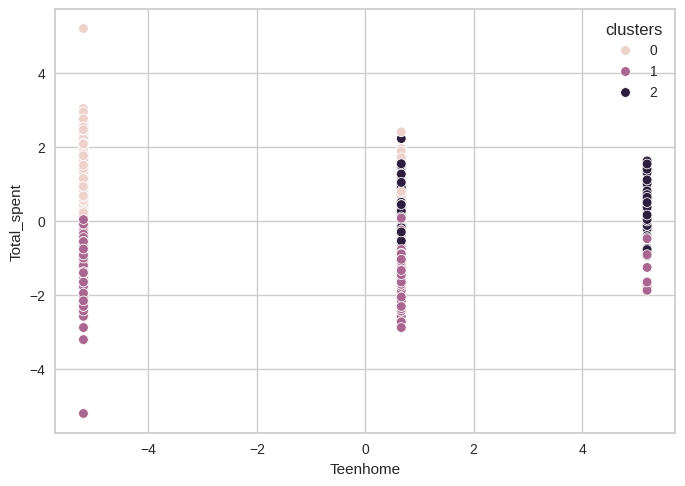

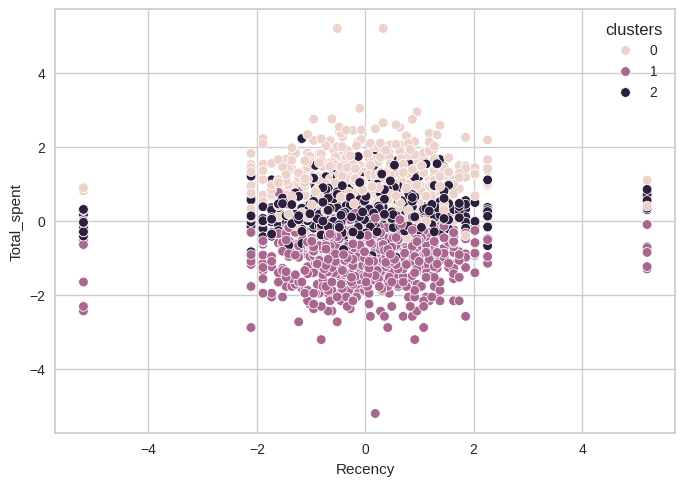

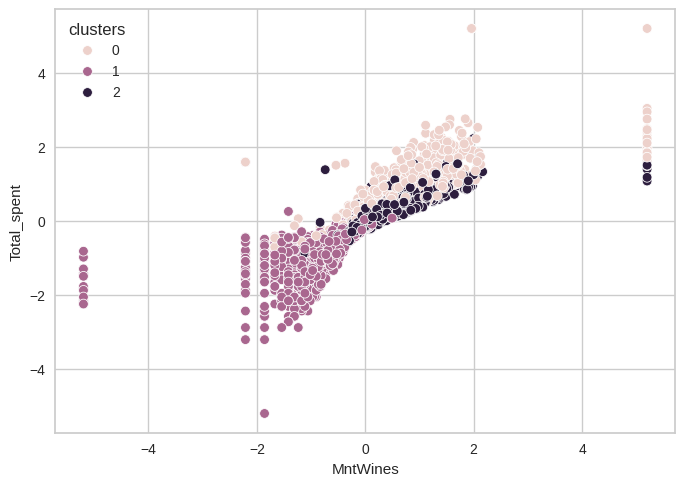

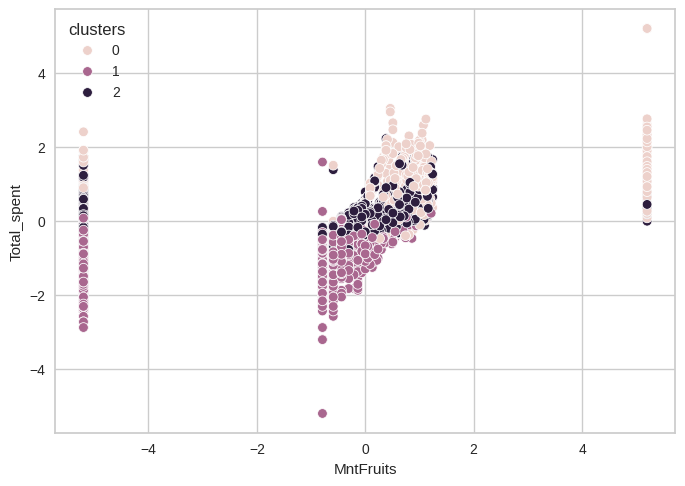

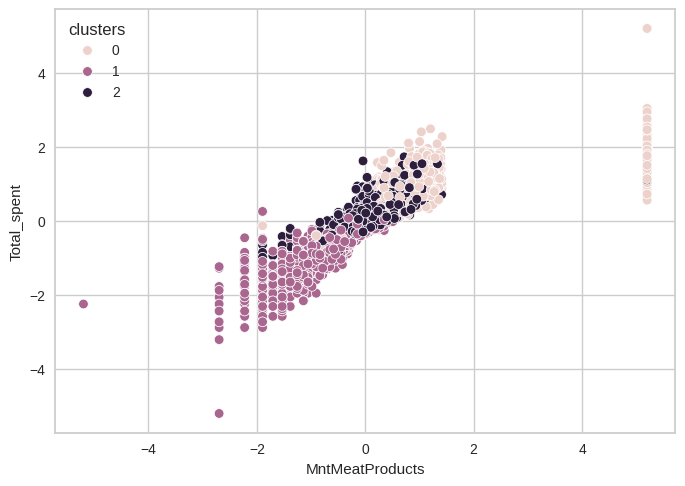

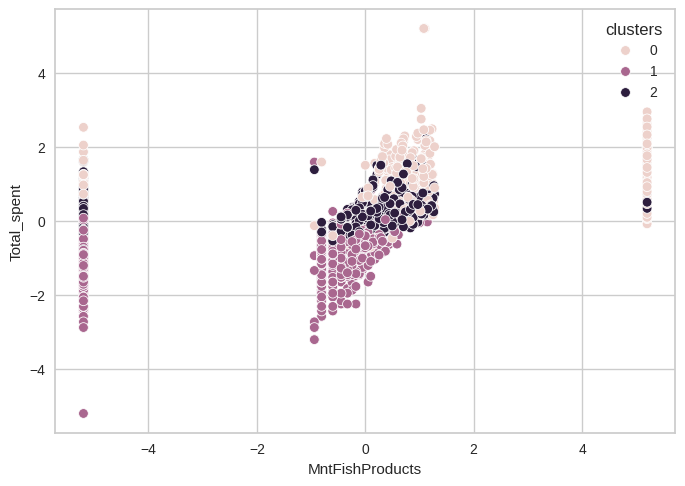

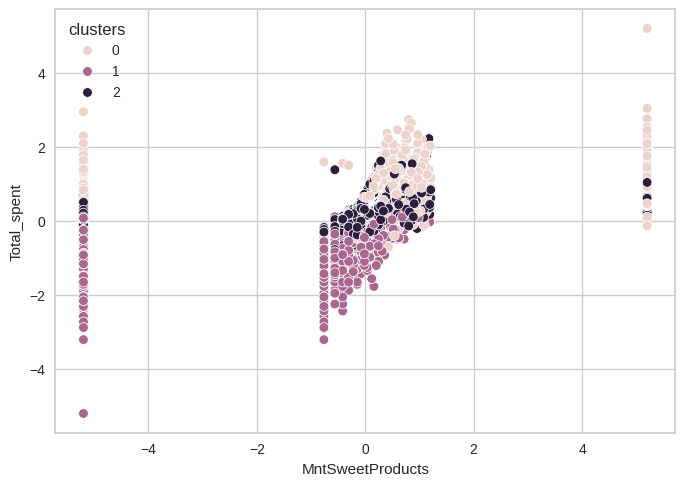

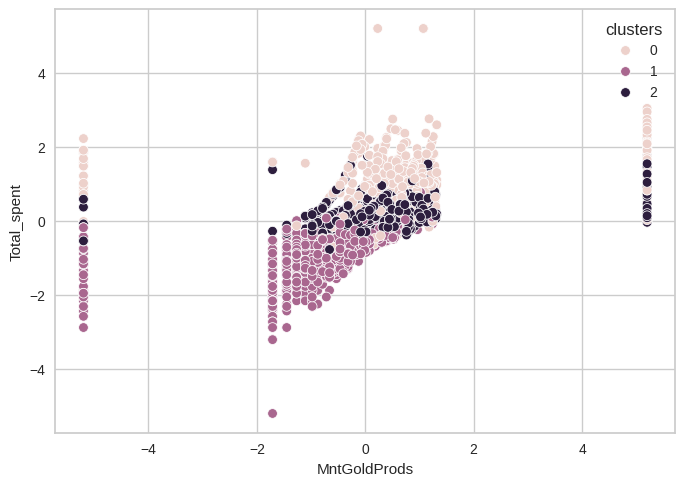

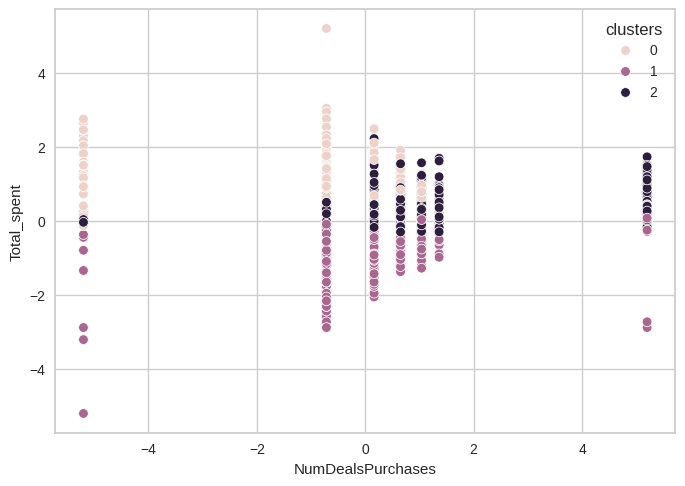

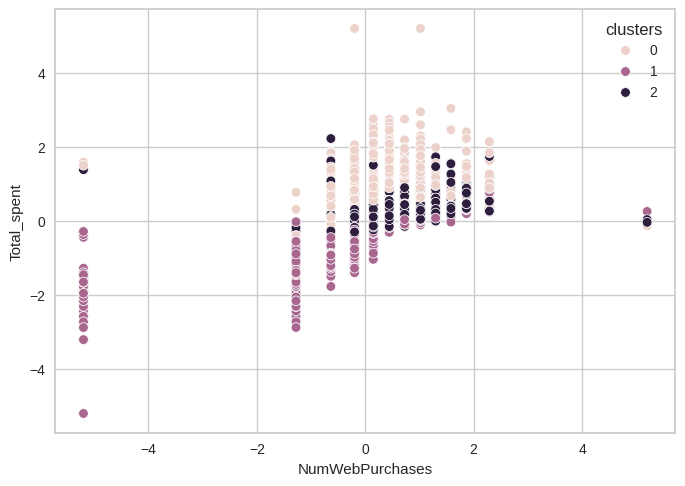

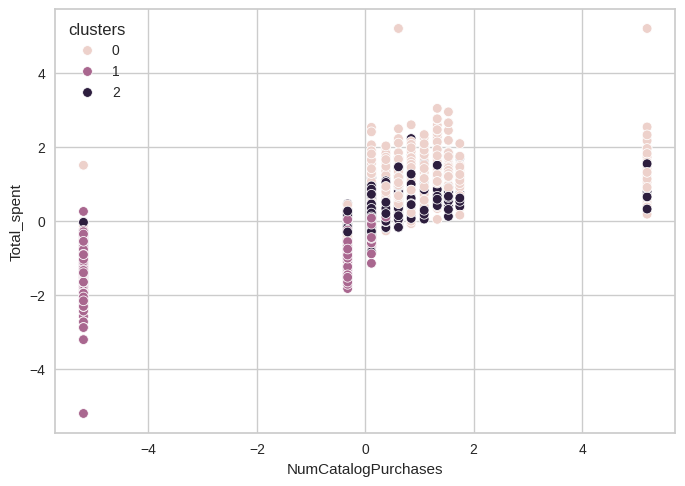

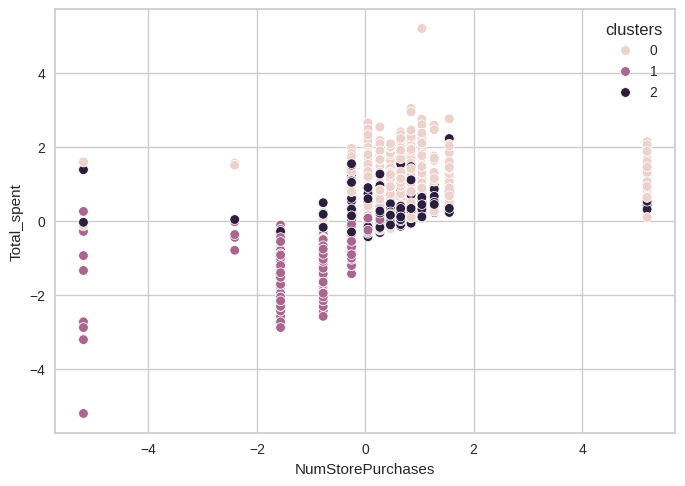

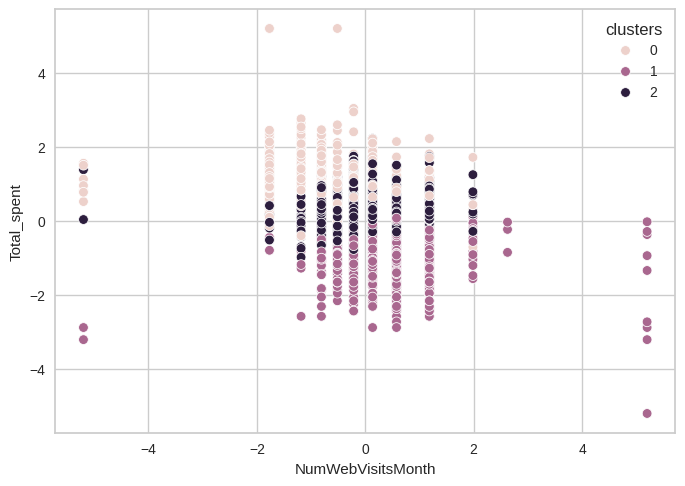

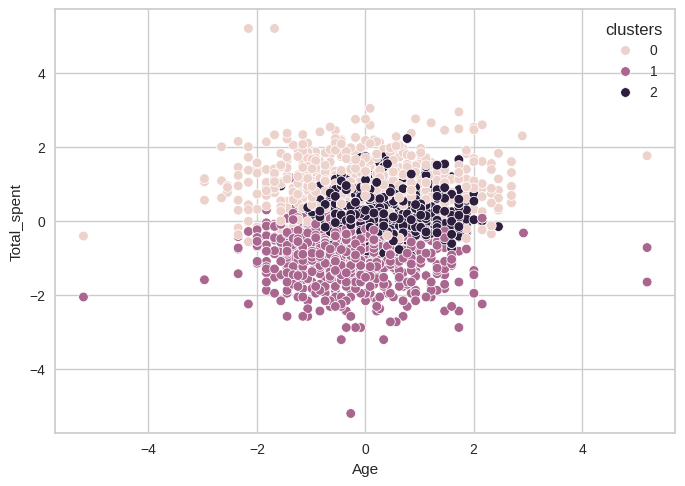

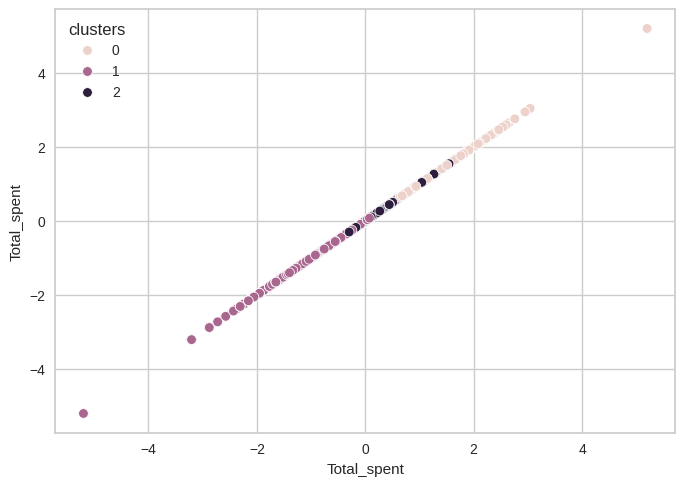

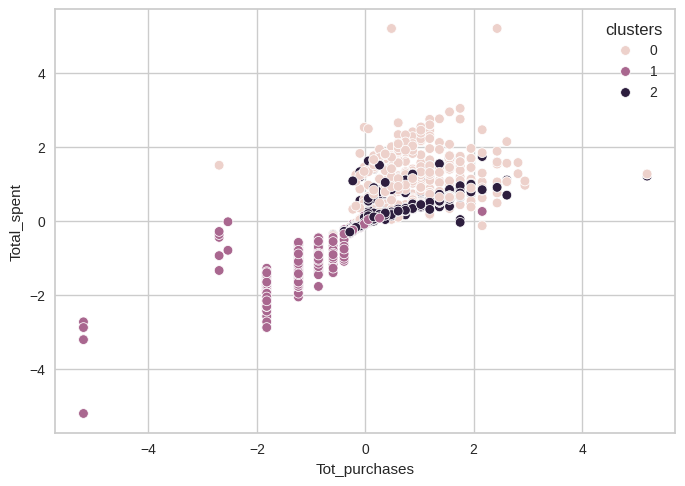

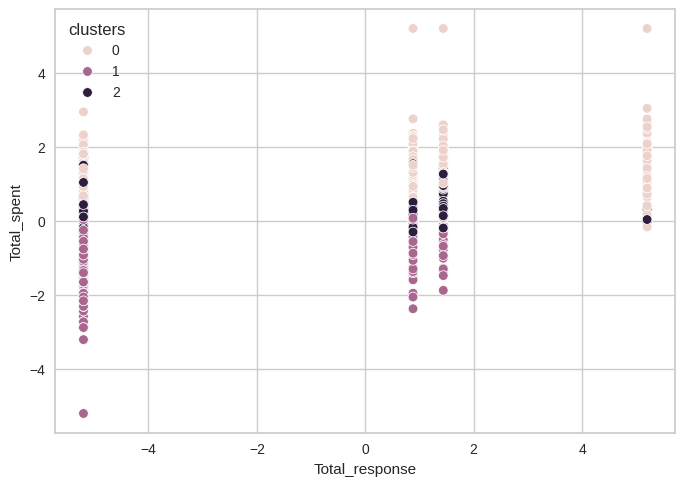

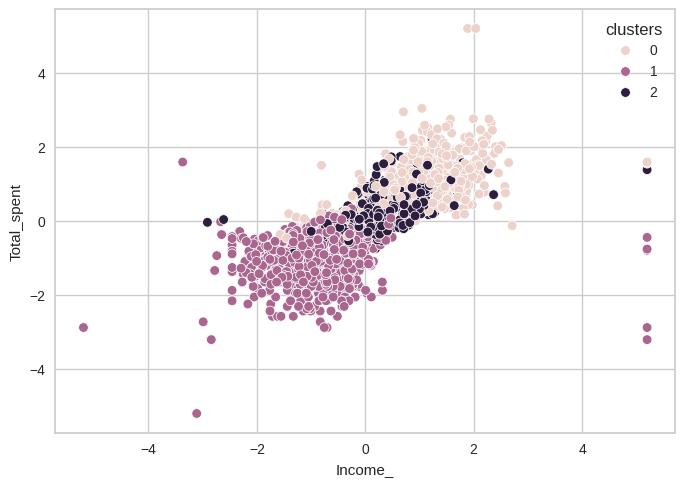

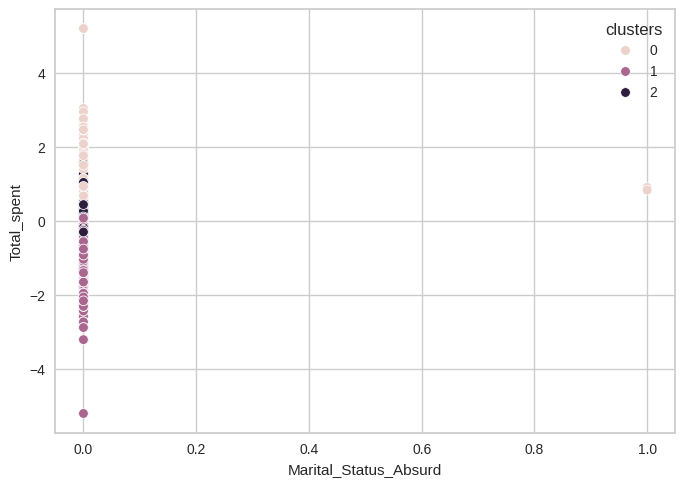

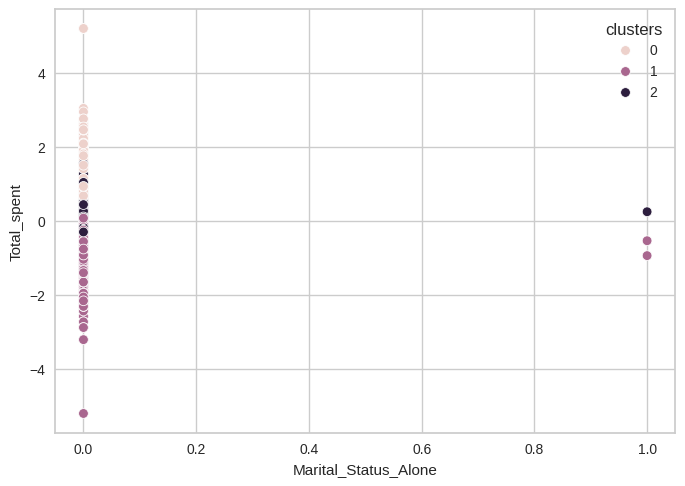

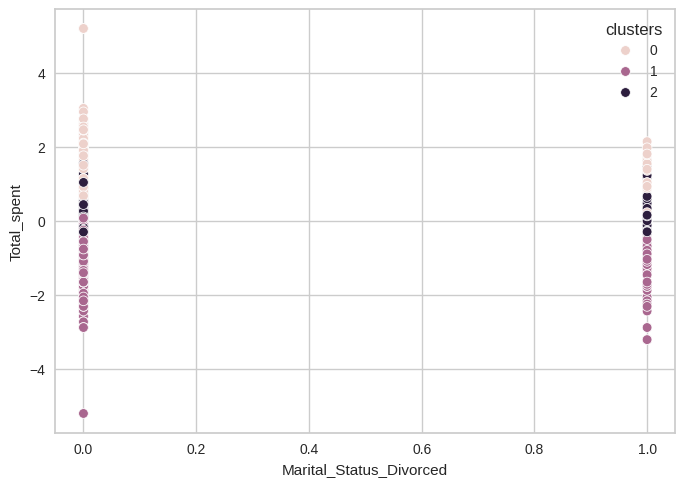

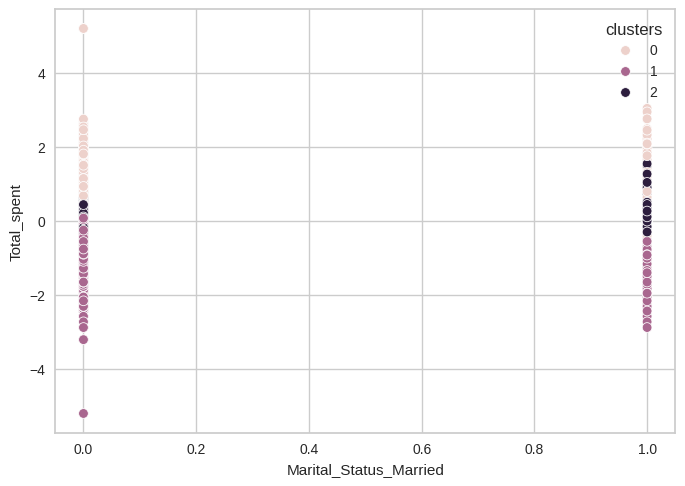

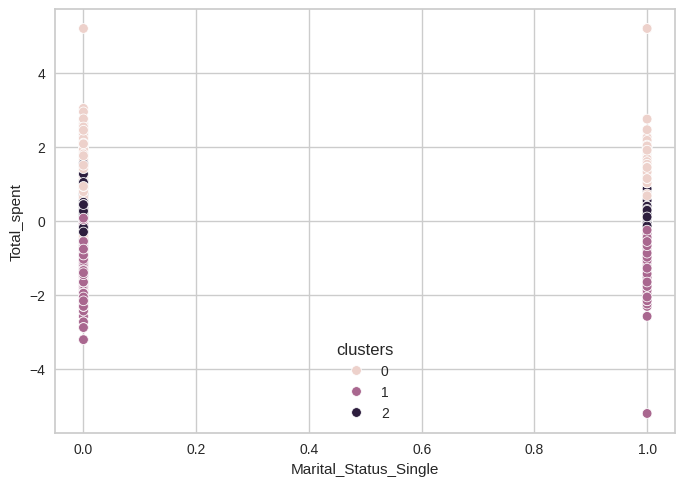

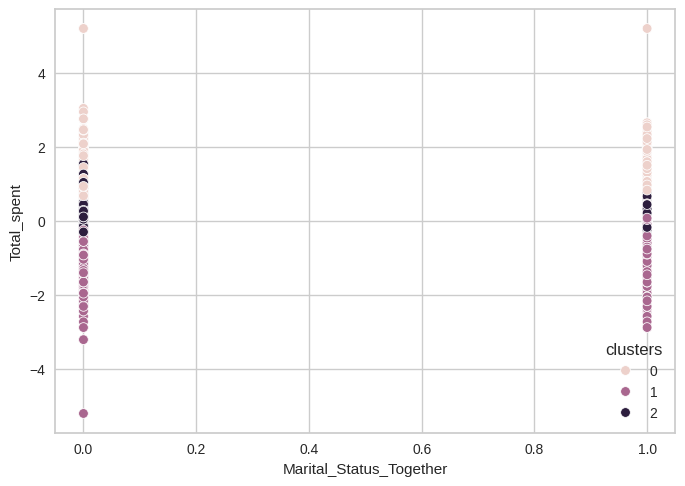

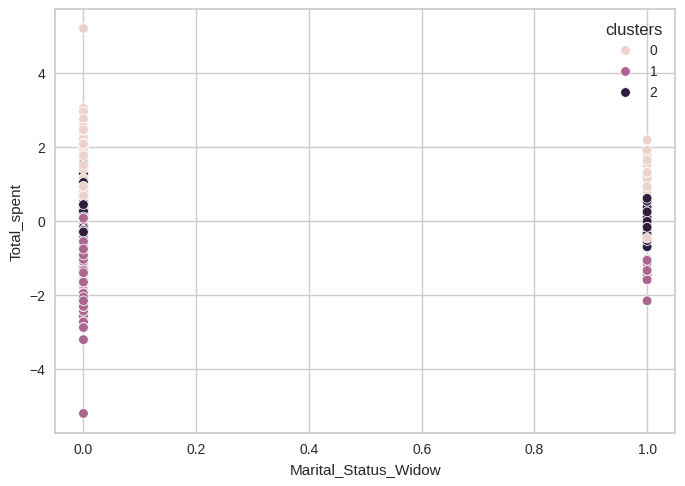

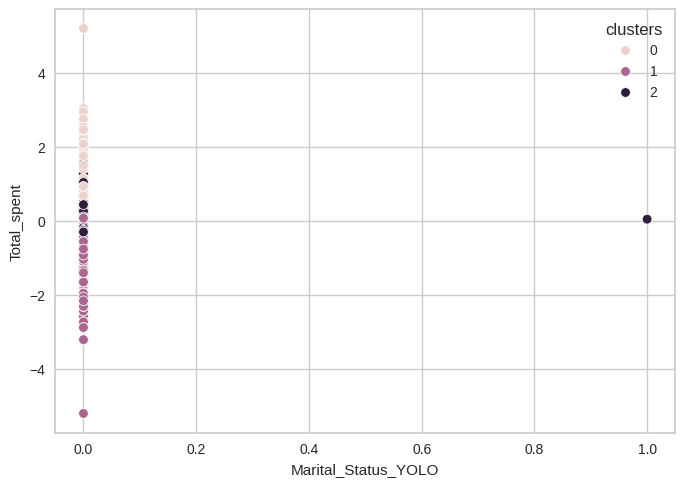

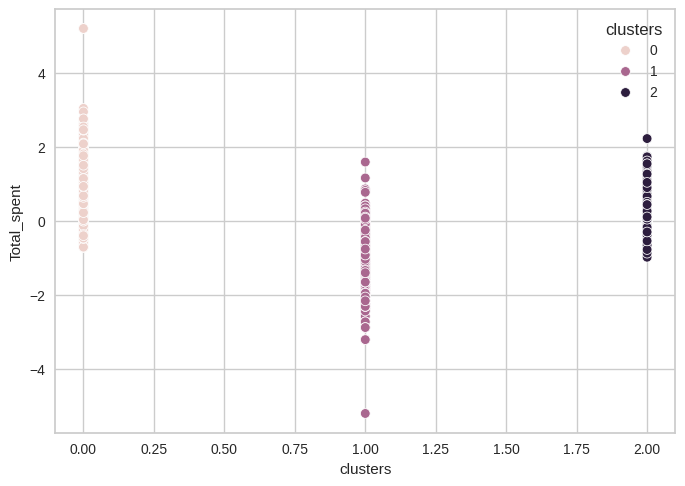

In [76]:

for col in transformed_data.columns.tolist():
  sns.scatterplot(data = transformed_data, x= col, y = 'Total_spent', hue = 'clusters')
  plt.show()

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

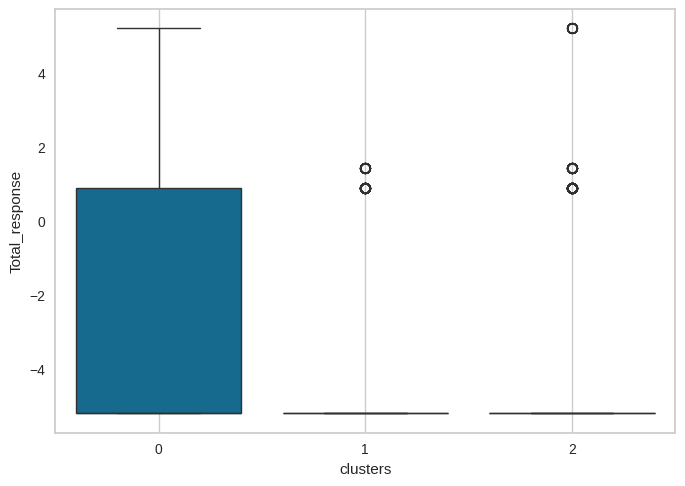

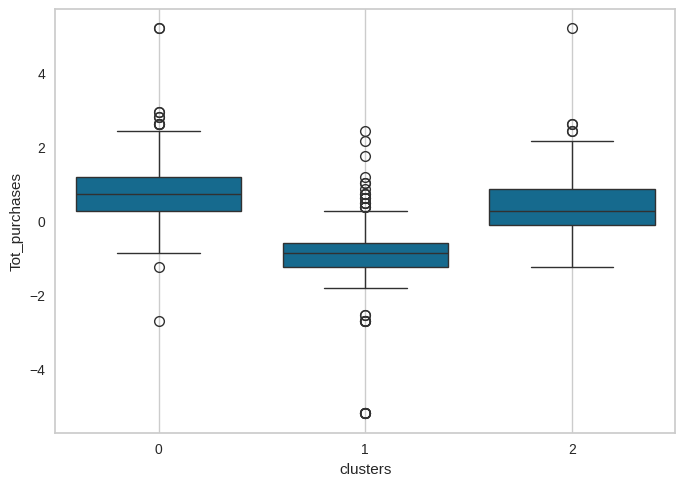

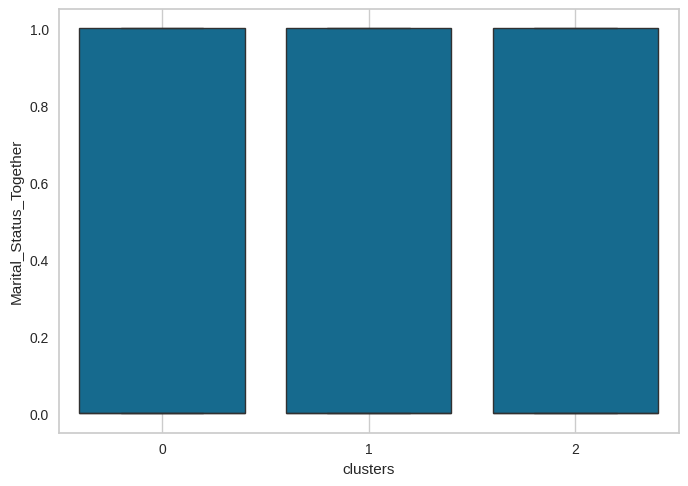

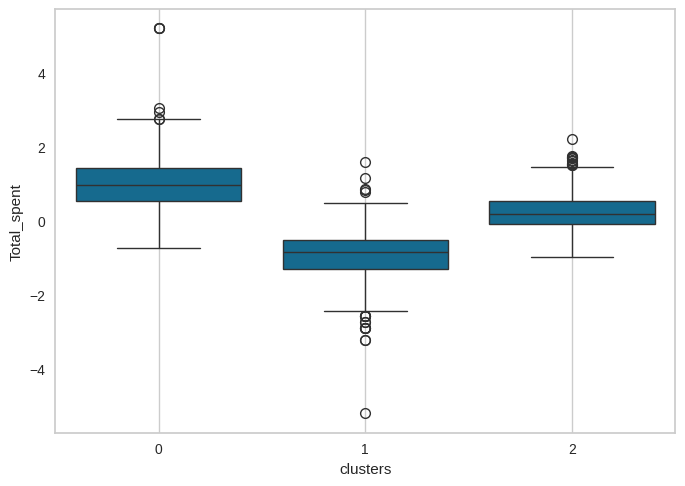

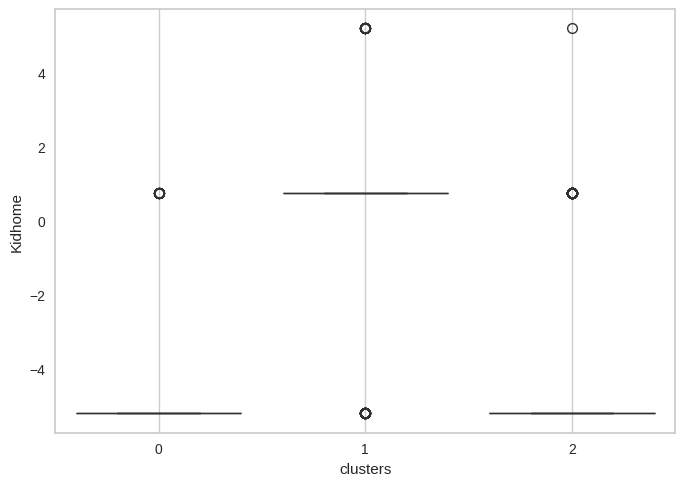

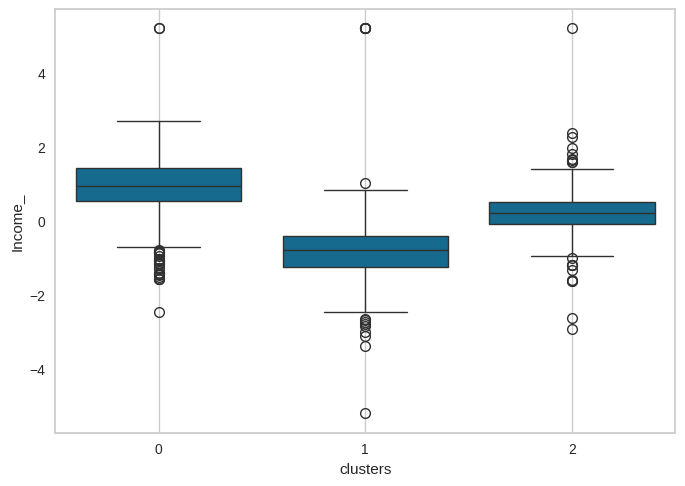

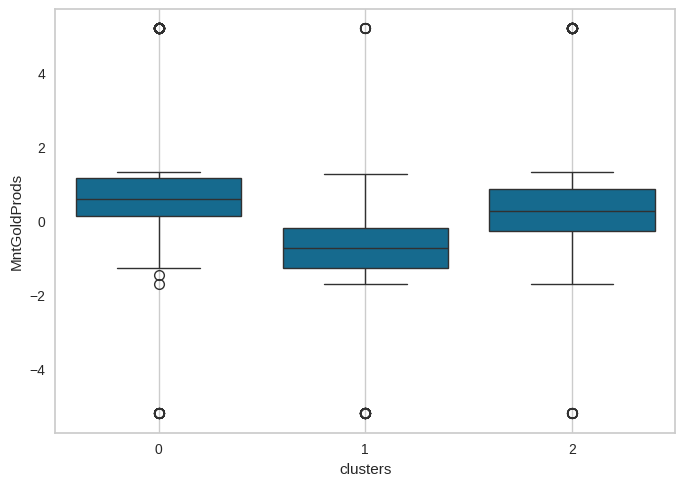

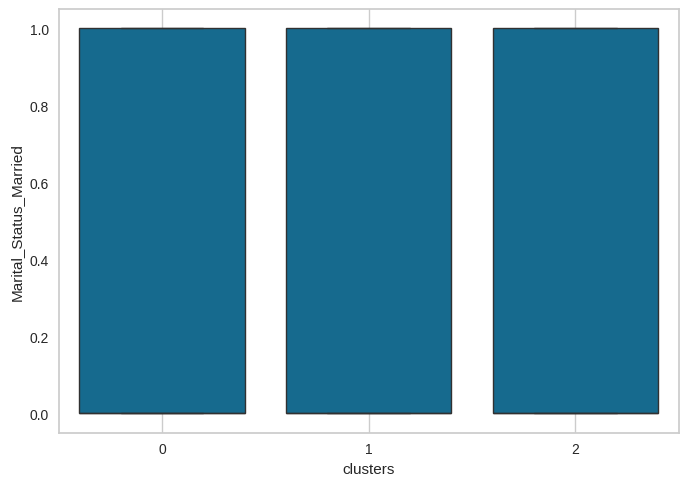

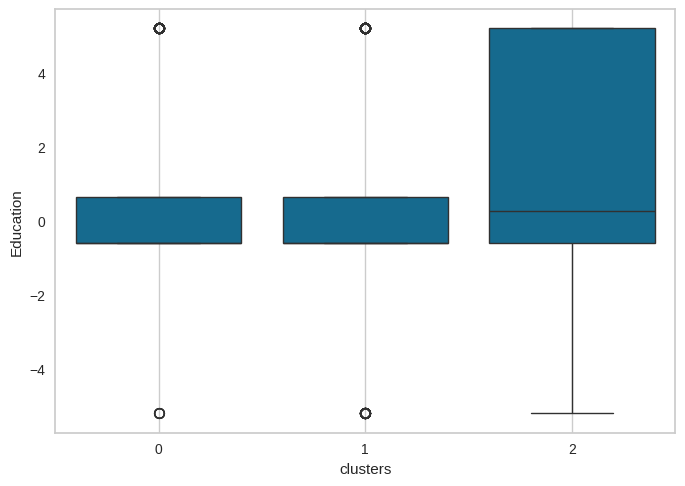

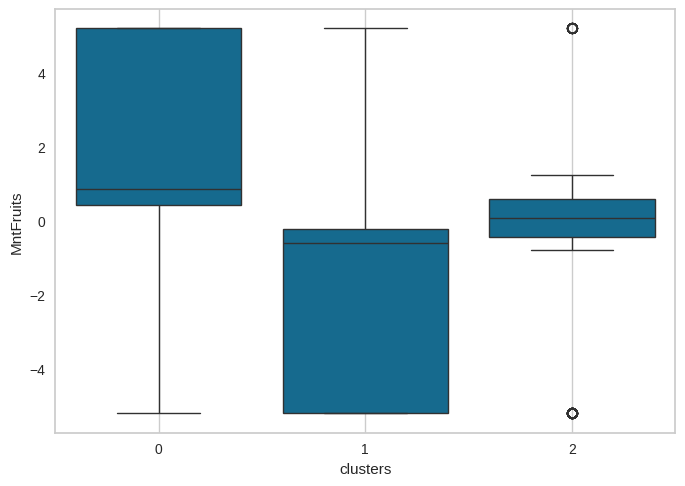

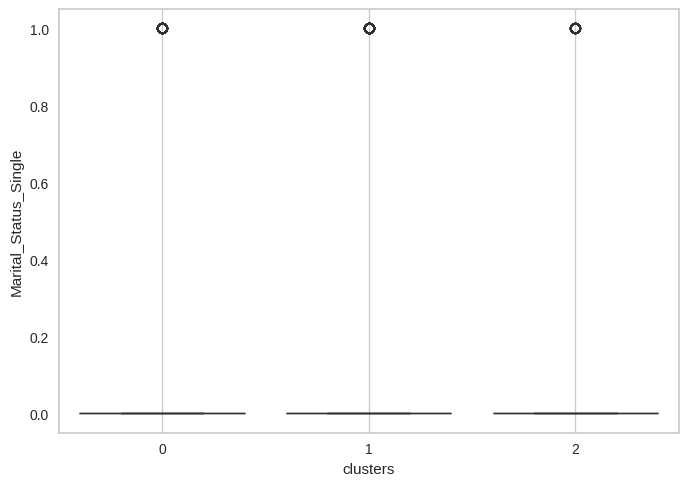

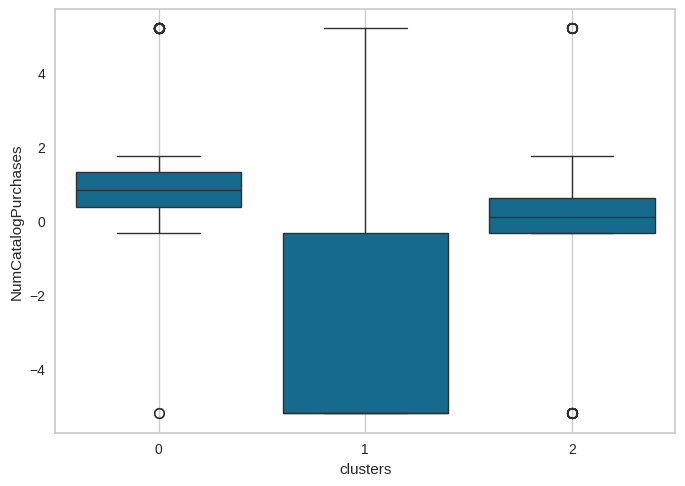

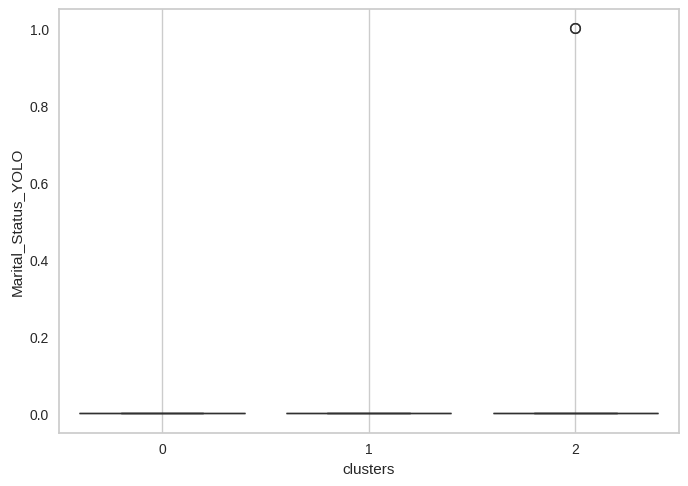

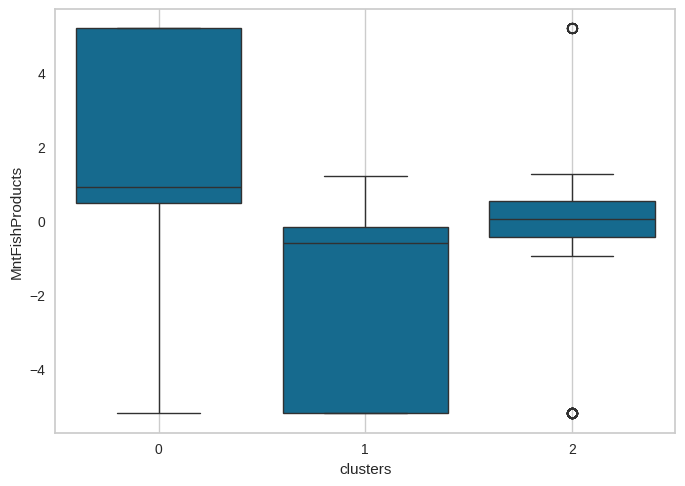

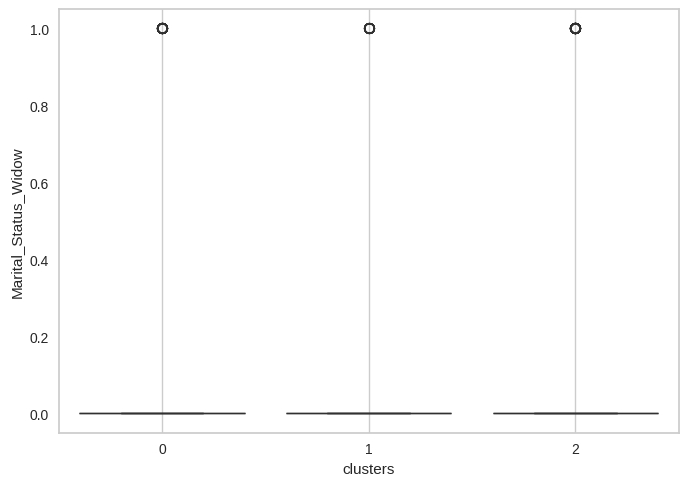

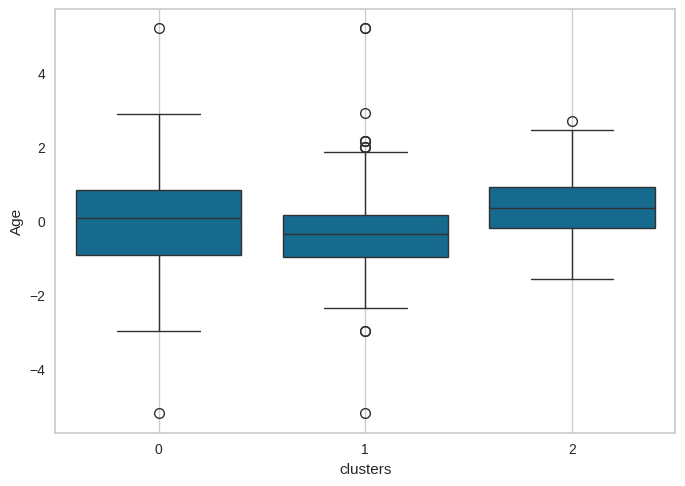

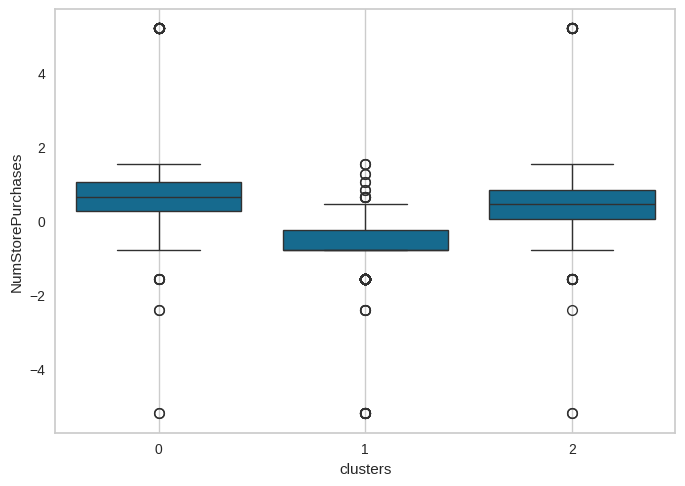

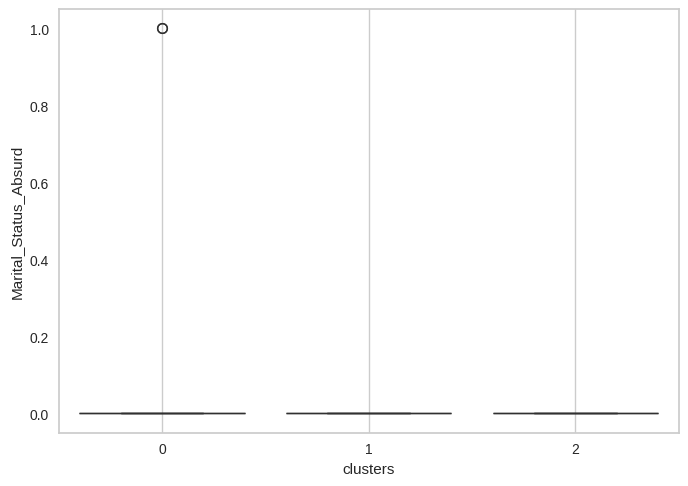

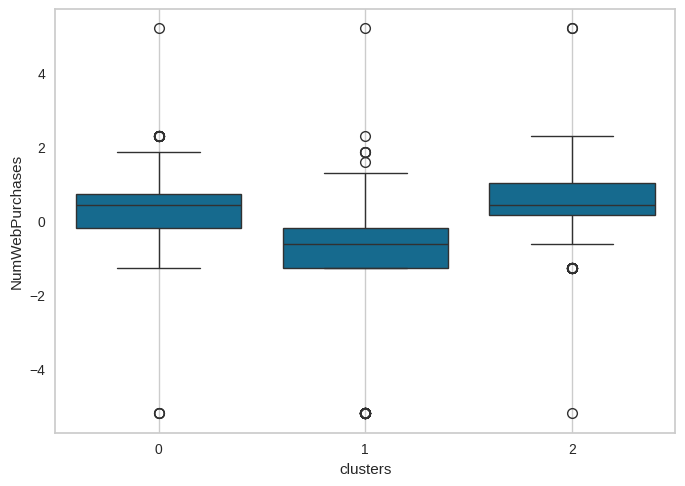

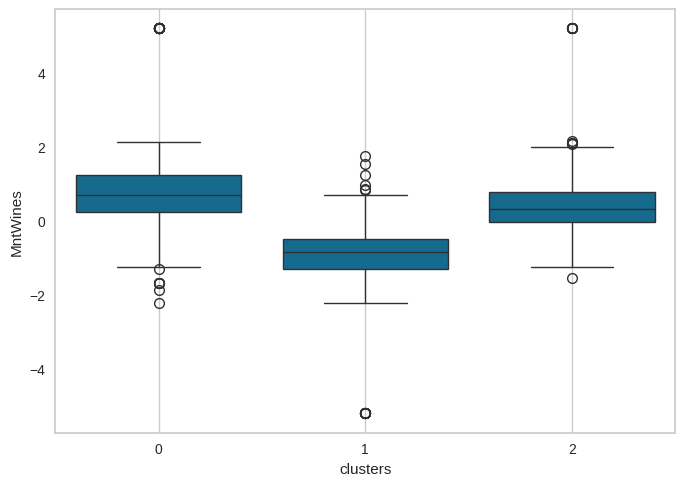

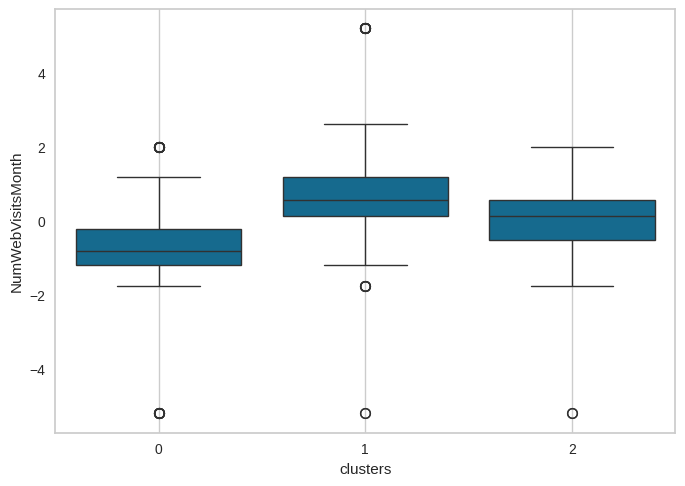

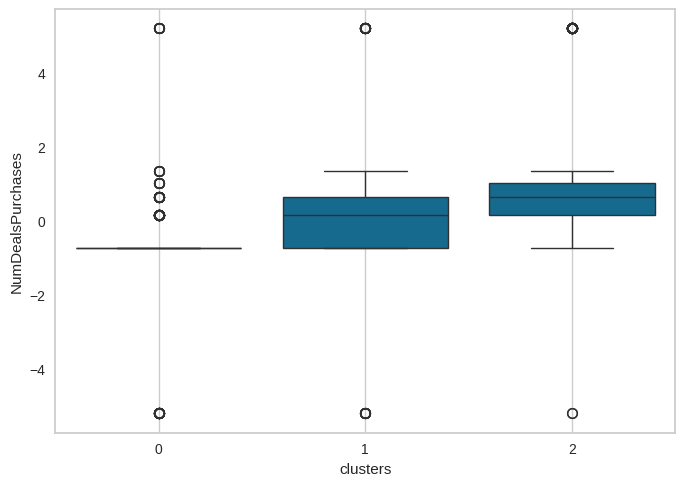

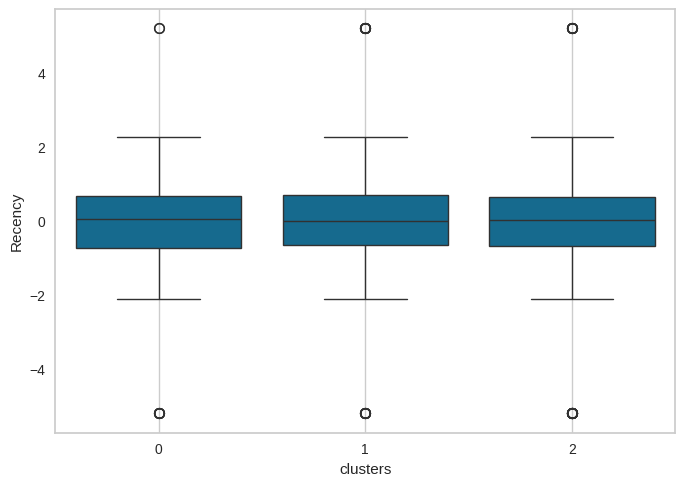

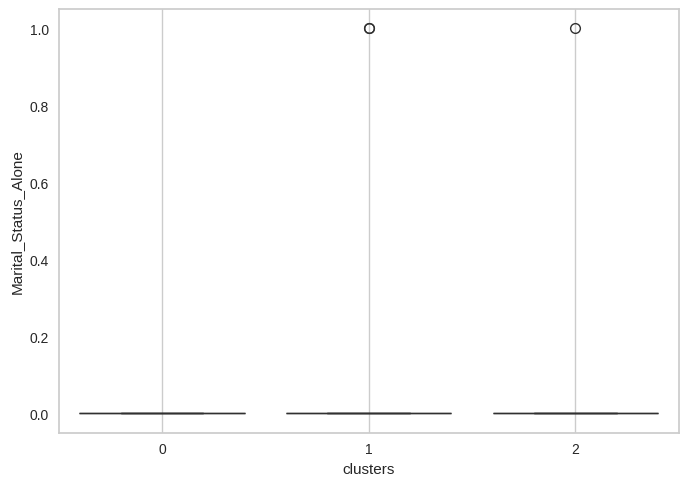

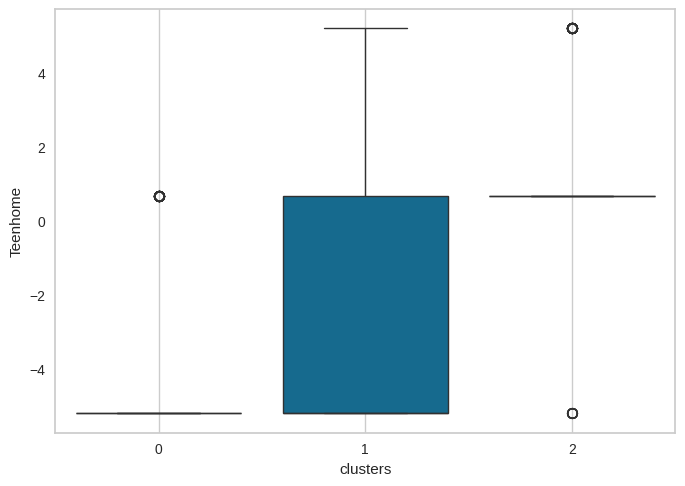

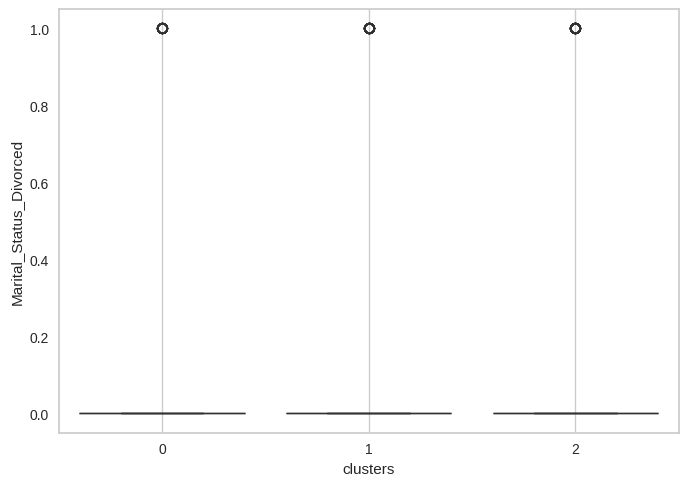

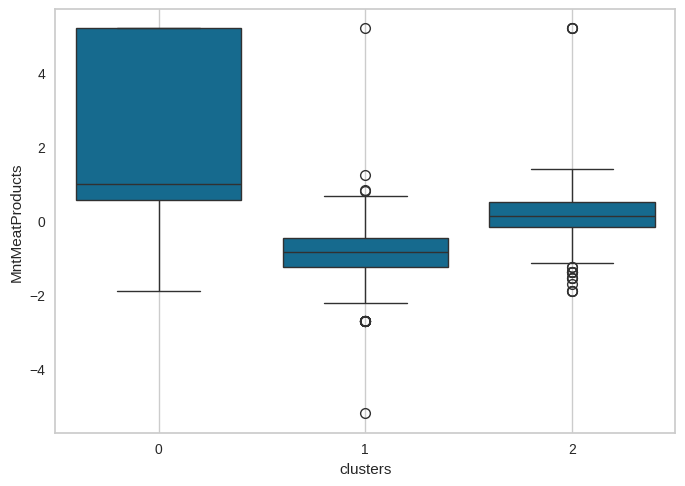

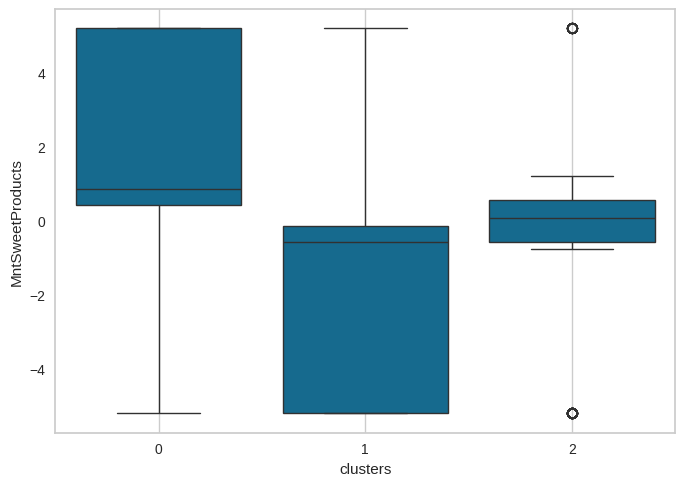

In [77]:
for col in features:
  sns.boxplot(data = transformed_data, x = 'clusters', y = col)
  plt.grid(None)
  plt.show()

##### **Observations:**
We already know that Cluster 1 contains high-income customers, who spend more on all five categories of products and purchase more items. Cluster 2 represents low-income earners who spend less money in our store and have children. Lastly, Cluster 3 represents mid-income earners.

However, the boxplot shows many outliers that suggest an overlap between clusters. Cluster 1 and cluster 3 for variables such as Total_purchase, income, NumCatalogPurchases, NumStorePurchases, NumWebPurchases, and MntWines—we notice patterns that make both box plots close to similar. Hence, we can infer that Cluster 1 and Cluster 3 are closer to each other in terms of their behavior for those variables than Cluster 3.
Cluster 2 and Cluster 3 show similar behavior in terms of the number of purchases made using a discount.

Even though previous analyses suggest that customers are clustered also based on their marital status, the box plot suggests that there are a few customers of different, if not all, marital statuses present in all three groups. This also explains the overlap observed in the PCA and TSNE graphs.

To make it short, here we notice that there are outliers in each cluster. Those outliers cause an overlap within clusters, and some customers’ behaviors look close to similar across all clusters.


#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

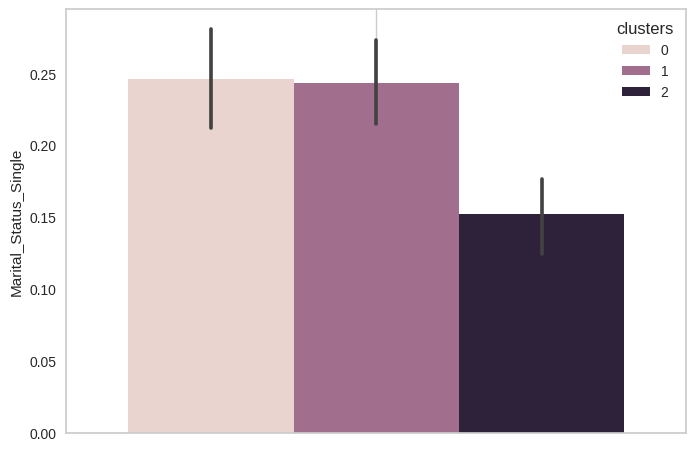

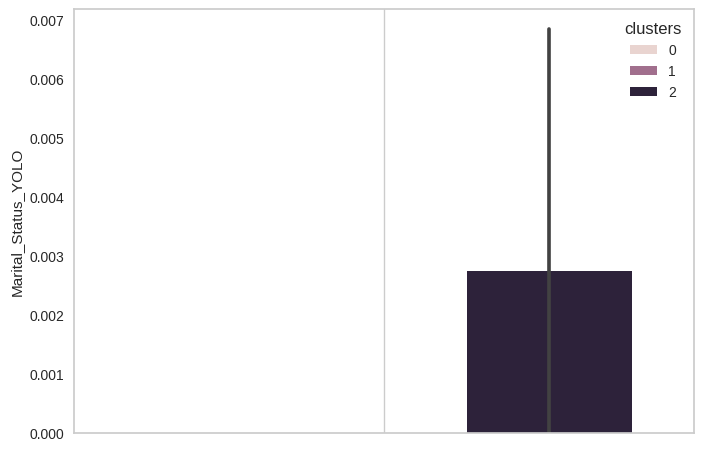

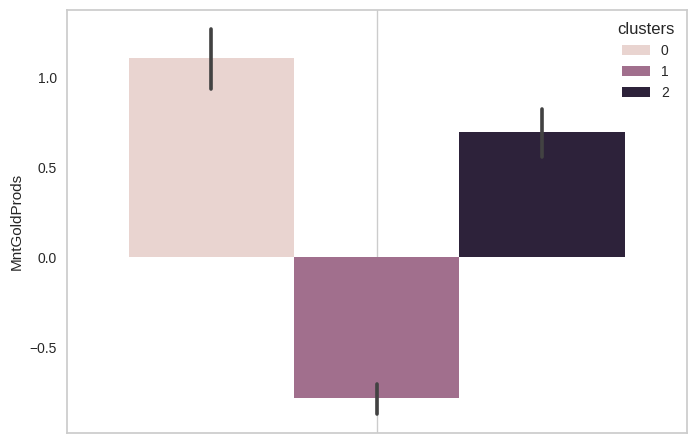

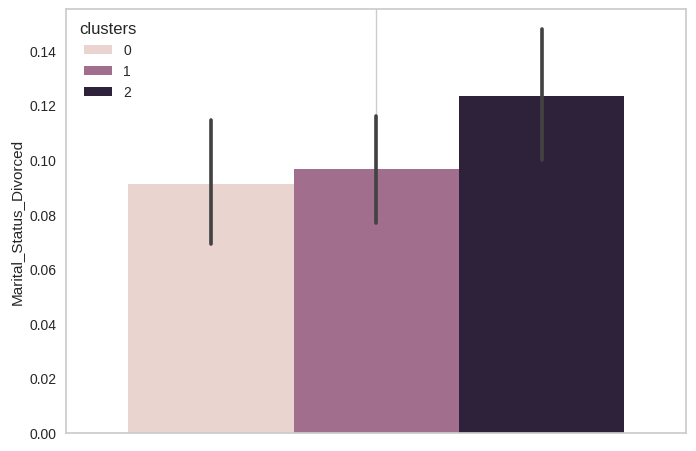

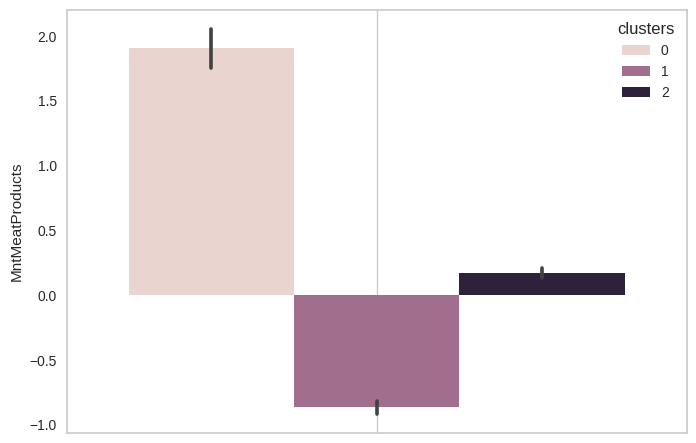

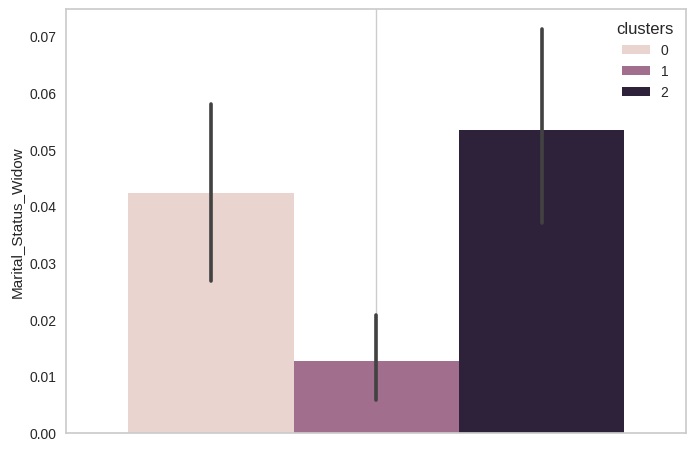

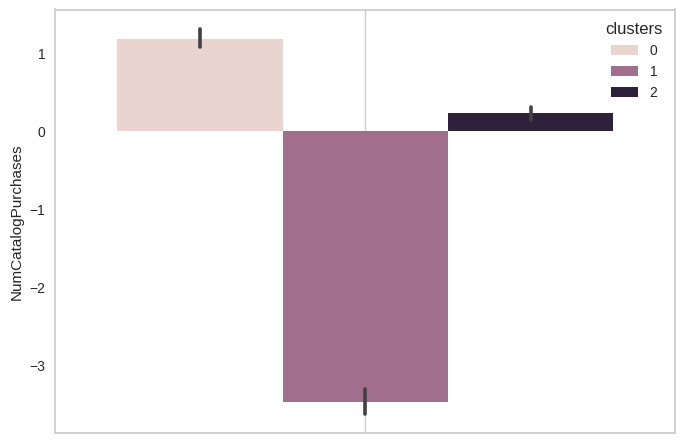

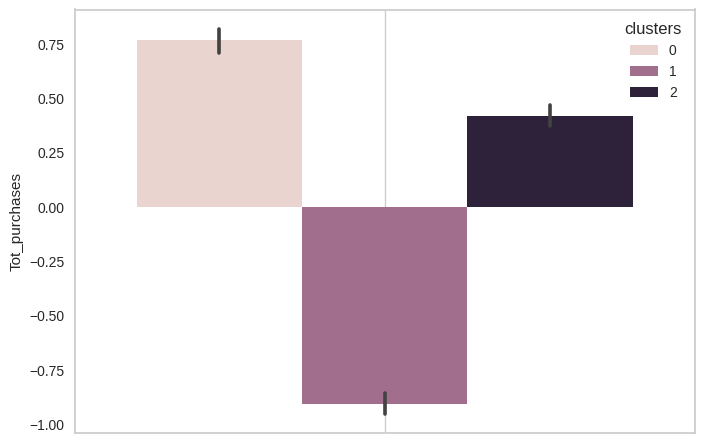

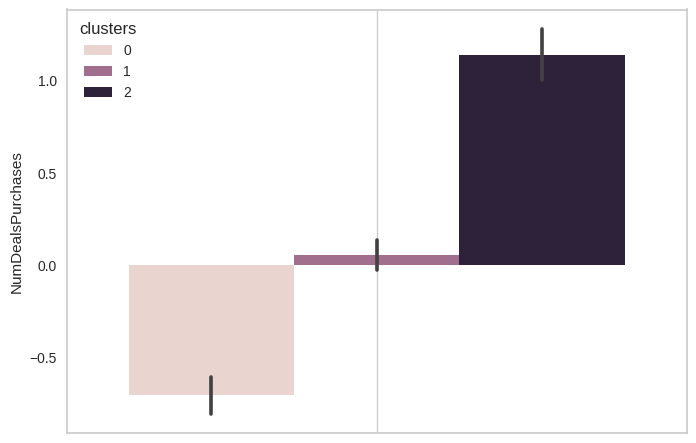

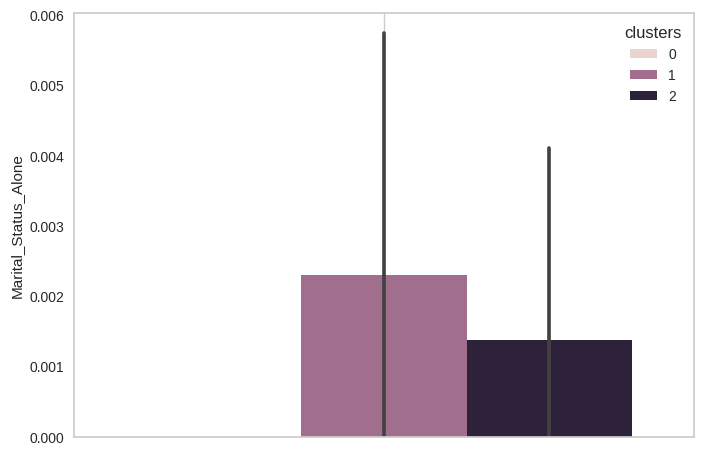

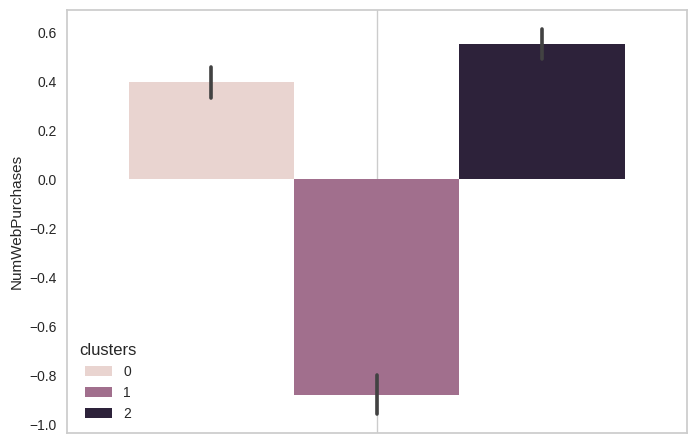

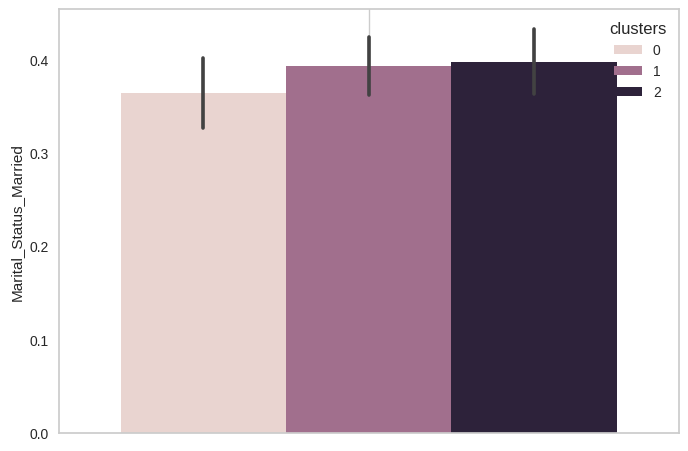

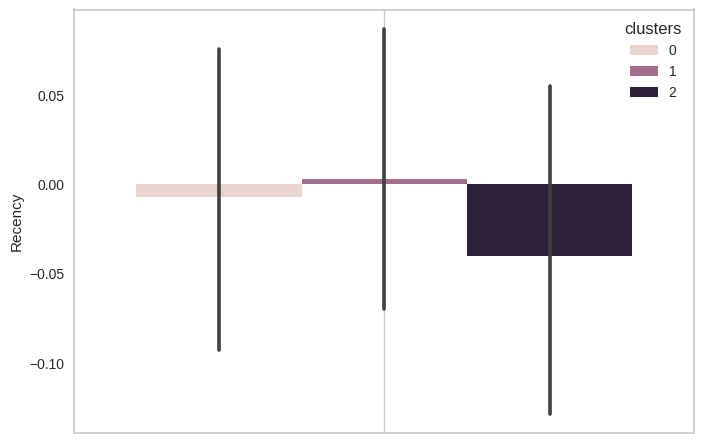

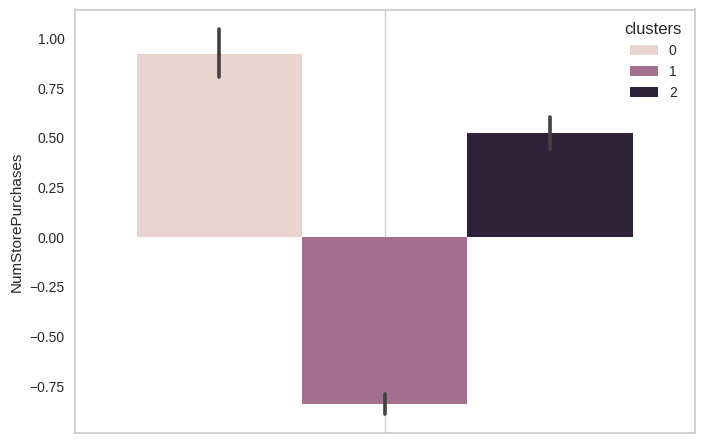

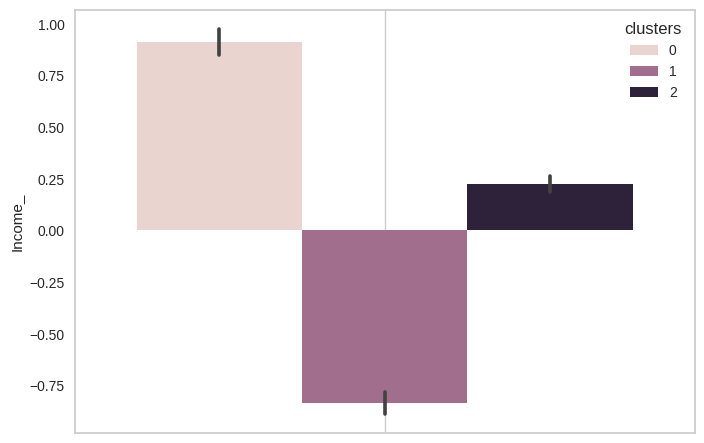

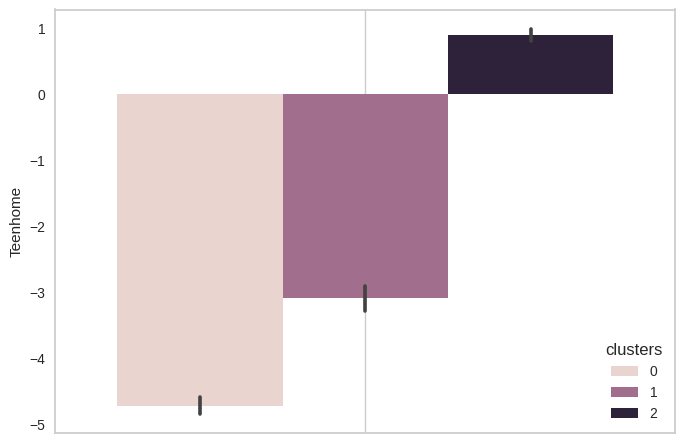

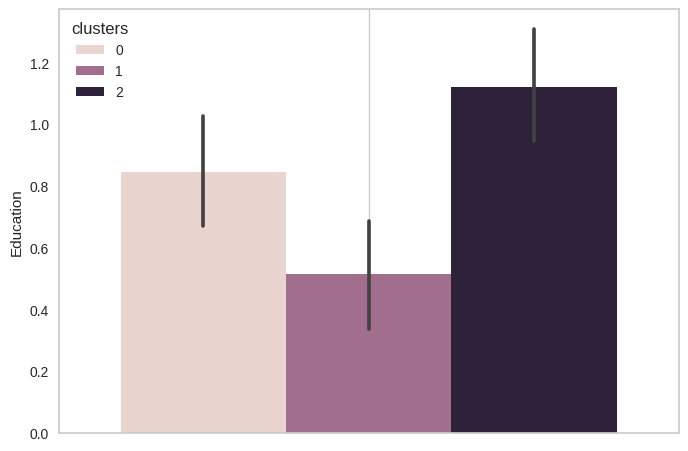

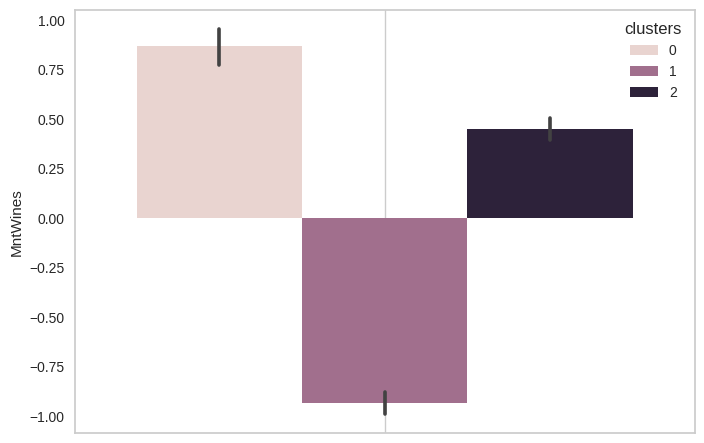

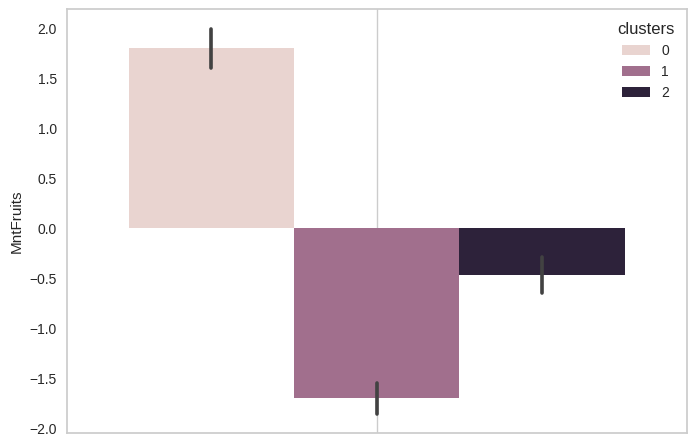

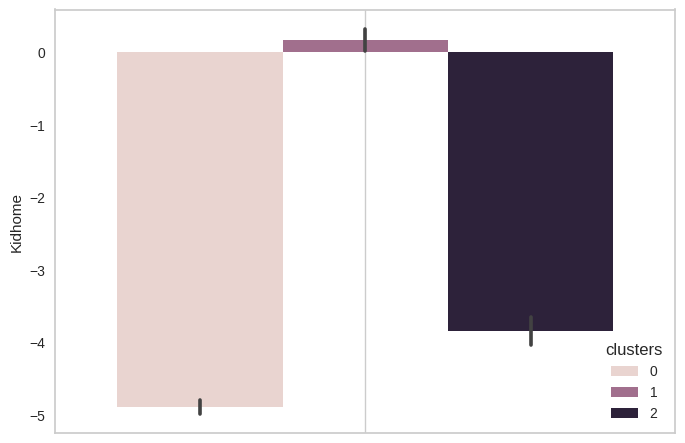

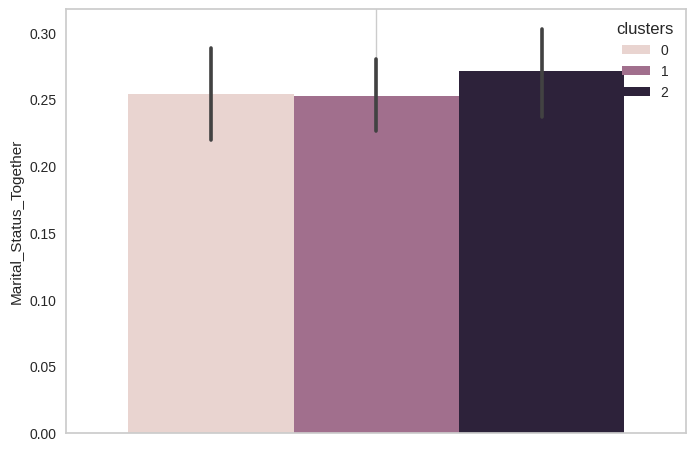

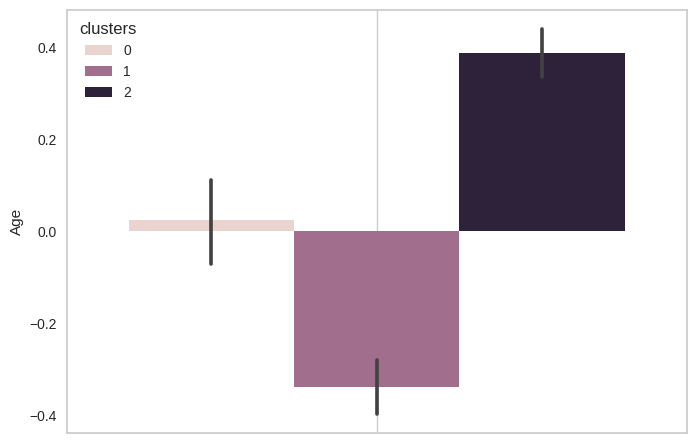

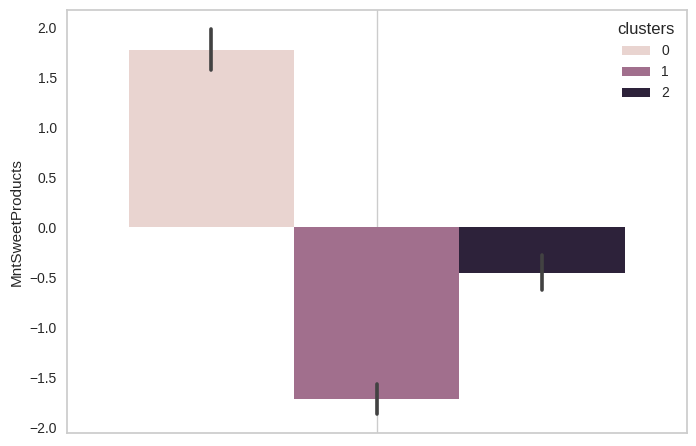

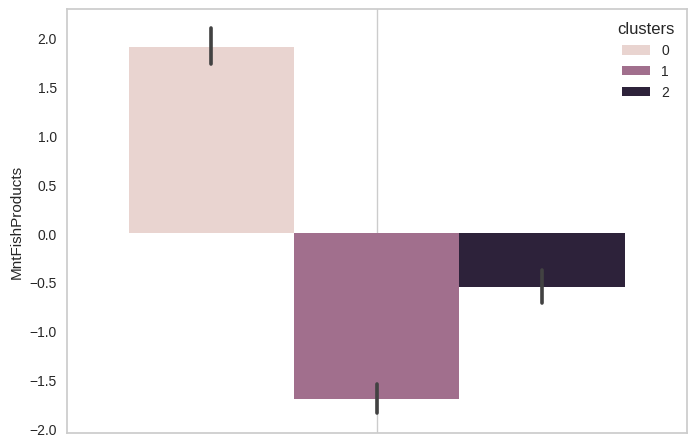

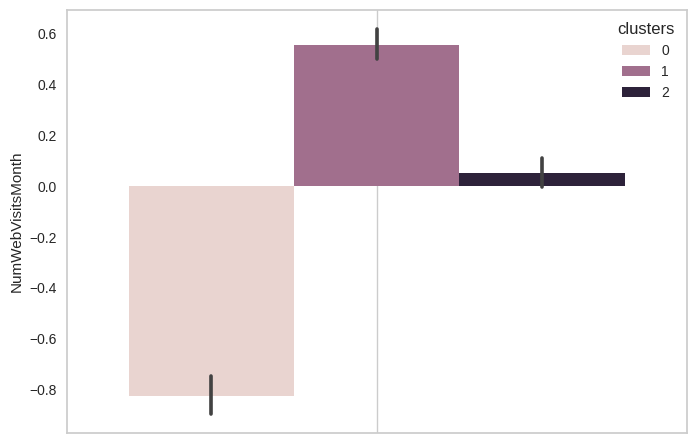

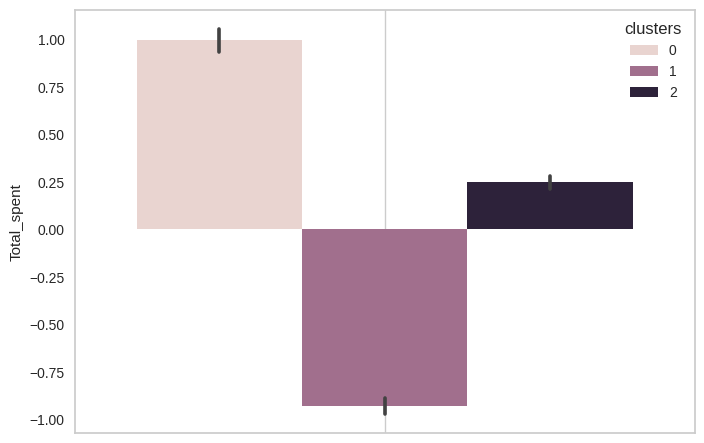

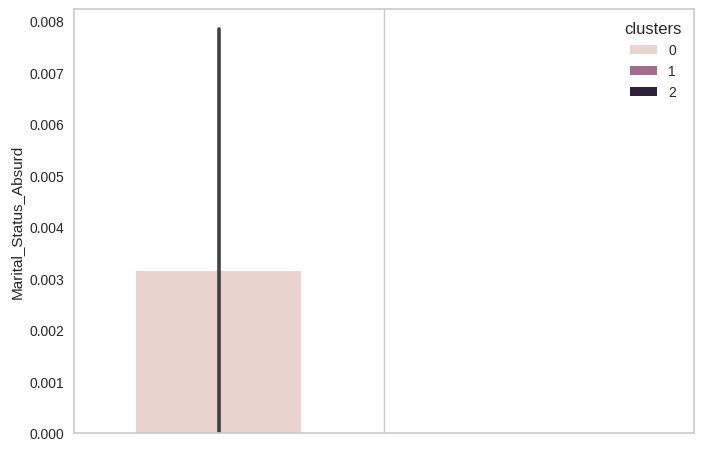

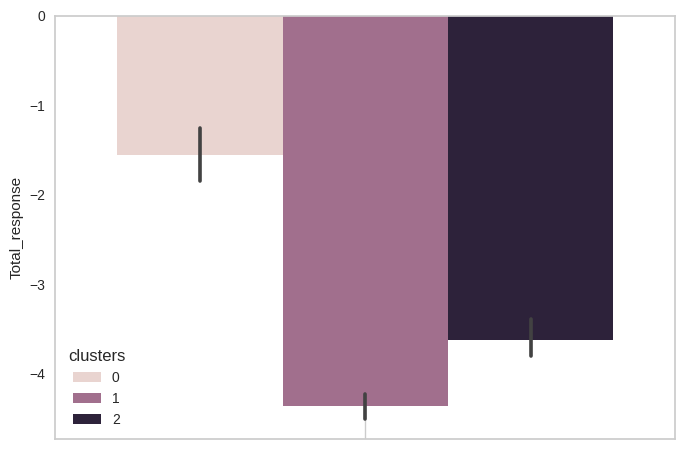

In [86]:
for col in features:
  sns.barplot(data = transformed_data, y = col, hue = 'clusters')
  plt.grid(None)
  plt.show()

##### **Observations:**

We can draw the same conclusion that we drew from previous graphs from the barplot. However, the  Barplot gives us some details that the previous graphs do not show. It gives us the frequency or counts of data points within each cluster. The taller the bar, the more data points are present in it.

Based on the barplot we observe the following:
Marital status: There are more single customers in cluster 1, followed by cluster 2. Marital status “Yolo” customers are only present in cluster 3. Also, in cluster 3 there are more divorced customers, followed by customer 2. Also cluster 3 has more windowed customer than all of them, followed by cluster 1. Marital status “Alone” customers are more present in cluster 2, followed by customer 3, but they are not present in cluster 1 at all. There are more married couples in cluster 3, followed by cluster 2, and cluster 1 has the least number of married customers. There are more customers with marital status “together in cluster 3 than in the other two clusters. All customers who reported their marital status as being “absurd” are in cluster 1.

Age: Older customers are more frequent in cluster 3 than in all other clusters. Customers in cluster 2 are much younger than all other clusters (there are probably teenagers in cluster 2)

Children in households: Customers with young children are more frequent in cluster 2, and customers in other clusters do not seem to have young children. However, customers with teenage children are more frequent in cluster 3, and the other clusters do not seem to report having teenaged children at home.

Income: Customers with high income are more frequent in cluster 1, and low income customers are more frequent in cluster 2. cluster 3 is more in the middle of the two

Purchasing frequency: Cluster 1 has more customers who purchase more frequently in our business, followed by cluster 2, and cluster 3 has more customers who are the least purchasers. There are more customers who purchase items through catalogs in cluster 1, followed by cluster 3.

Spending/purchase habits: Customers who spent more money in our store are more frequent in cluster 1, followed by cluster 2, and the least spenders are present in cluster 3, and that is true across all five product categories (gold products, meat, wine, fruits, and sweet products).  The frequency/count of customers who make purchases with a discount is more in cluster 3, followed by cluster 2; cluster 1 clusters seem to not take advantage of discounts.

Engagement: There are more customers in cluster 2 who visit the website more frequently per month, followed by cluster 2, and cluster 1 does not seem to visit the website. Also, customers in cluster 2 have engaged with our business more recently than other groups. Cluster 2 responds the least to our campaigns, followed by group 3 and group 1.



## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

After conducting the K-means clustering, grouping our customers into three groups, and collecting insights from our clusters. We can make the following recommendations:


Cluster or group 1 represents our most valuable customers, who make the most purchases, spend the most money in business, and have a high income. Hence, we recommend making every effort to increase customer retention for these customers by constantly monitoring their satisfaction with our services and products and checking their NPS to see if they are our top promoters (if they are likely to recommend our store to other customers). Develop market campaigns tailored for them that increase their engagement with our store, give them exclusive offers, loyalty products, personalized product recommendations, and perhaps offer them a subscription-based service similar to the one offered by Target.


Increase and optimize inventory for product lines that are frequently purchased by our high-value customers (e.g., meat, wine, etc.), and scale on these products. Offer more premium products to these customers with higher quality and profit margins.


Cluster 2 represents customers with the least purchasing power but with a huge online presence. We recommend targeting more discount offer campaigns and purchase incentives to increase their purchasing frequency. Since they visit our website more frequently, we can send them more surveys to rate the quality of our services more often. We can also offer them free material and try to increase our NPS through them. Run giveaway campaigns that require them to tag our store on social media or promote our products. (Word of mouth is a powerful marketing tool, and these customers can be a huge channel for that.). Offer cheaper products to these customers without compromising on quality.


Cluster 3 represents a group with a moderate income and a balanced purchasing frequency, and they are highly educated. We recommend conducting surveys to assess what can be done to increase their purchasing frequency and increase their engagement with the business. Explore opportunities for upselling, leveraging their response to discount offers. Focus on campaigns that offer discounts on products that attend to their needs, since they are more prone to purchasing with a discount.
